### Discription of the data attribute 
1. **age:** age in years
2. **sex:** sex (1 = male; 0 = female)
3. **cp**: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4:    asymptomatic
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital) trestbps
5. **chol**: serum cholestoral in mg/dl
6. **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value   showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: maximum heart rate achieved
9. **exang**: exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** = ST depression induced by exercise relative to rest 
11. **slope**: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopyca
13. **thal**: 3 = normal; 6 = fixed defect 
14. **target** - diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing (in any major vessel: attributes 


## Insert Require library

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency, f_oneway,pearsonr,spearmanr,kendalltau
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import norm, chi2
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import multipletests
from lifelines import CoxPHFitter



In [3]:
data=pd.read_csv('./heart.csv')

In [4]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isnull().values.any()

False

In [7]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

## Visualization and Summarization of Dataset Variables

### Categorical - Bar plot

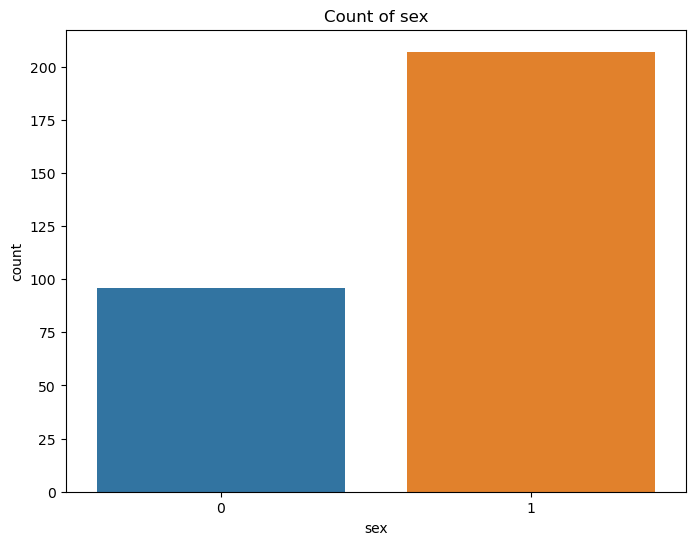

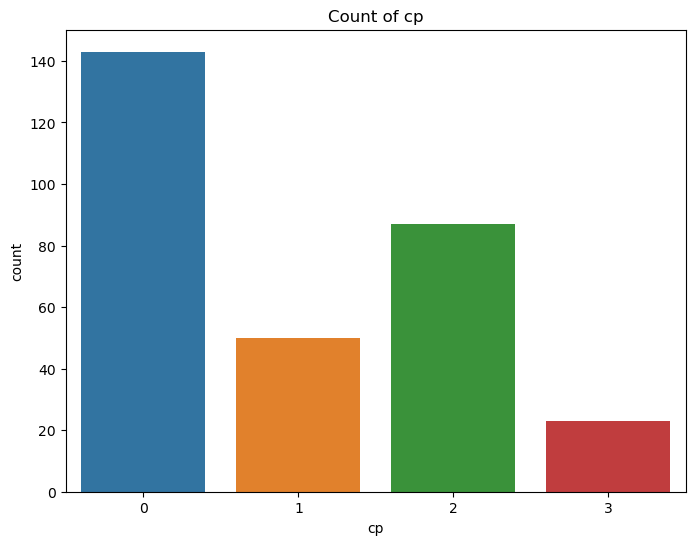

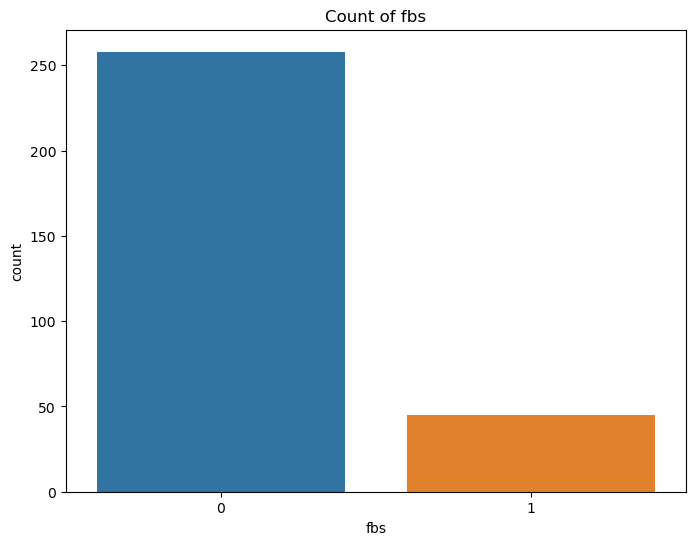

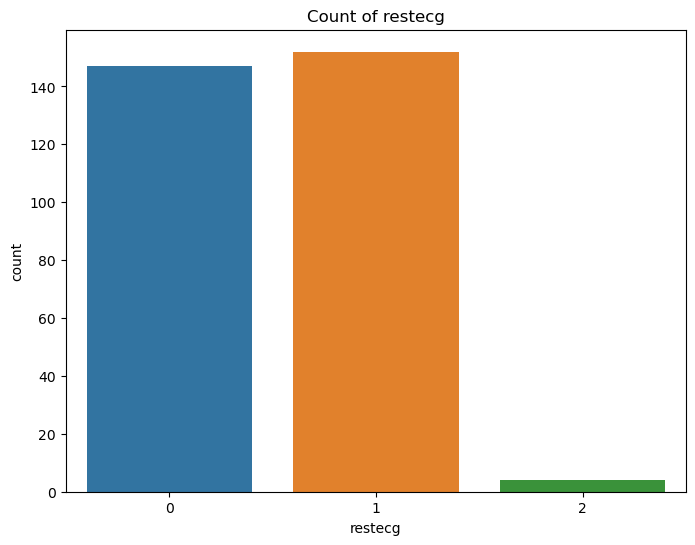

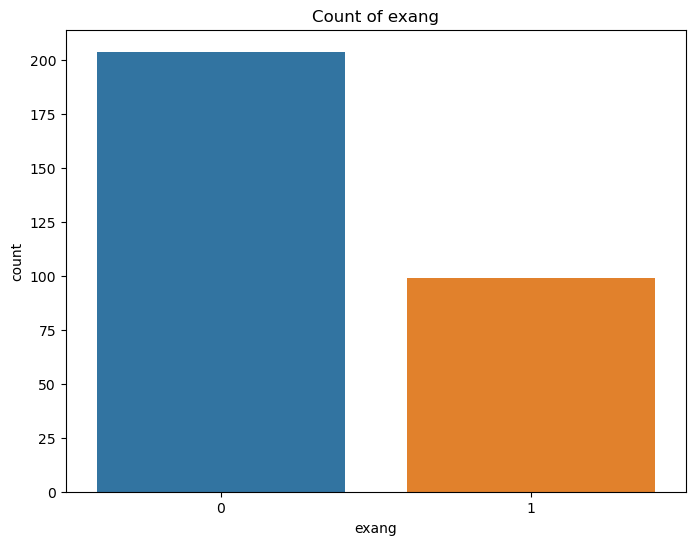

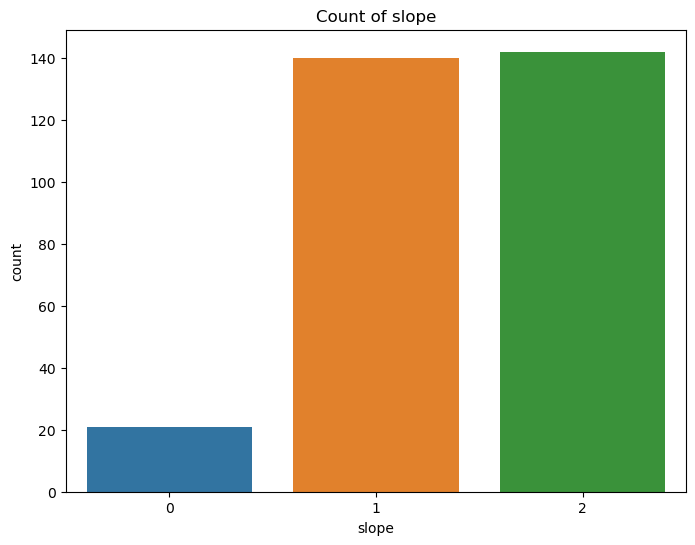

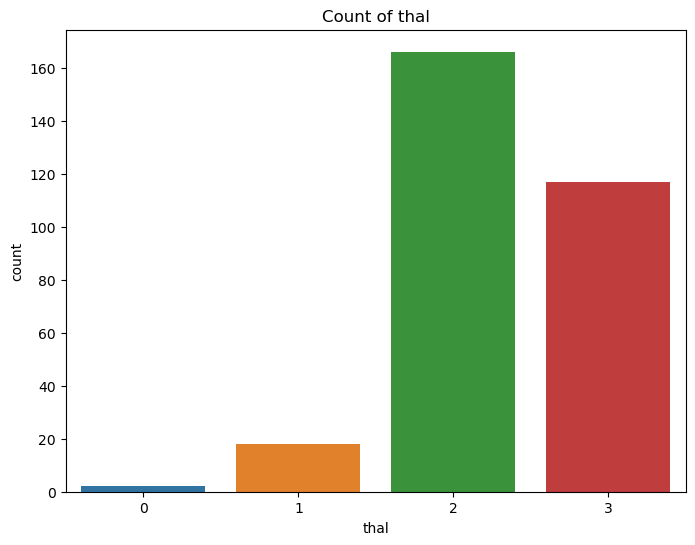

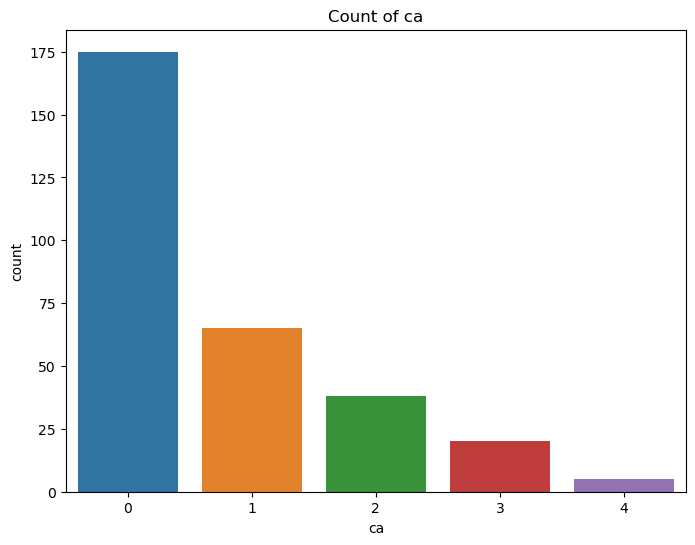

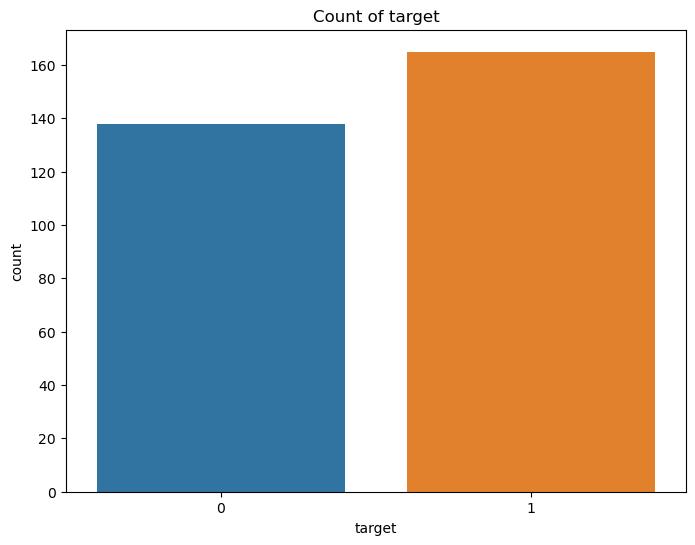

In [9]:
# Categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal','ca', 'target']

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=var)
    plt.title(f'Count of {var}')
    plt.show()


### Numerical variables


d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


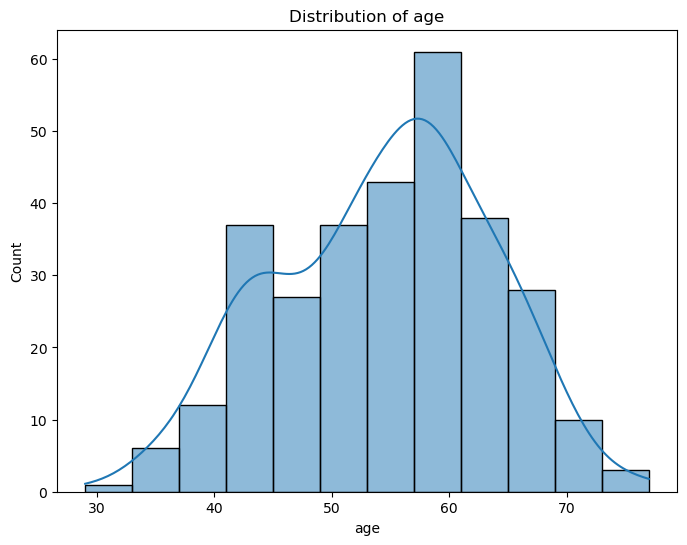

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


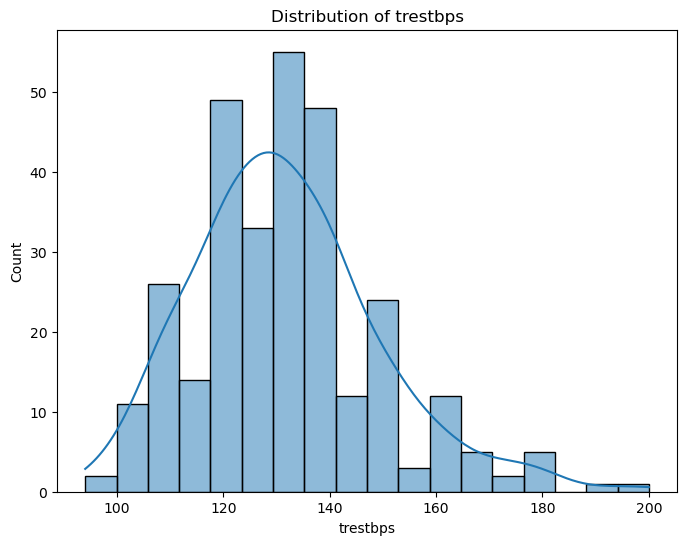

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


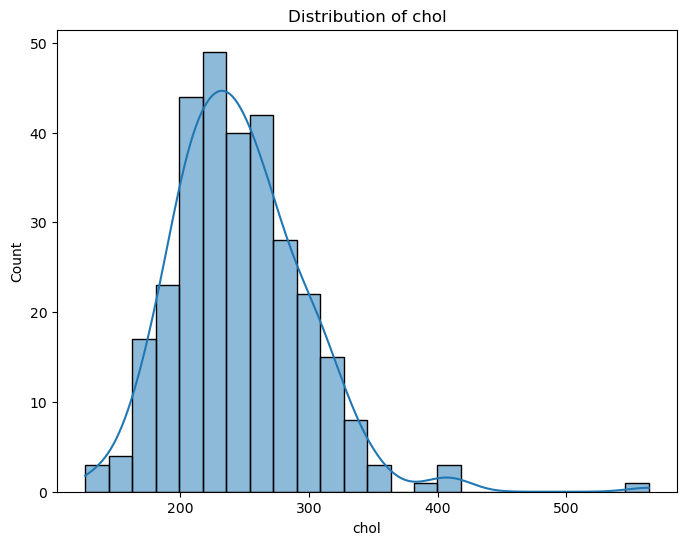

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


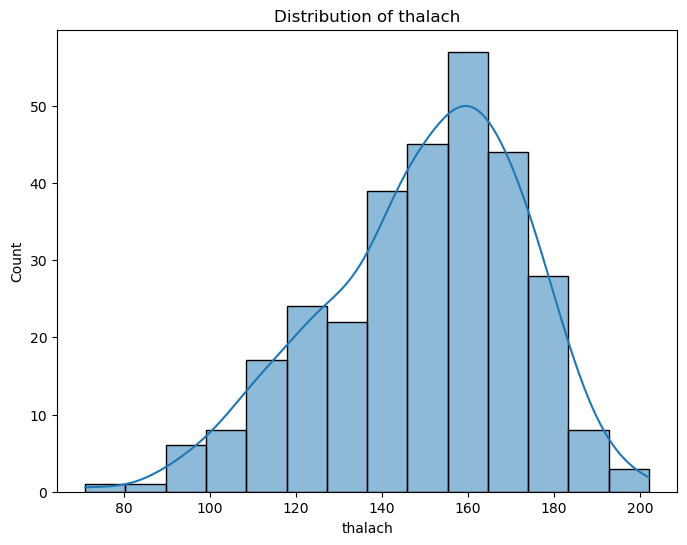

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


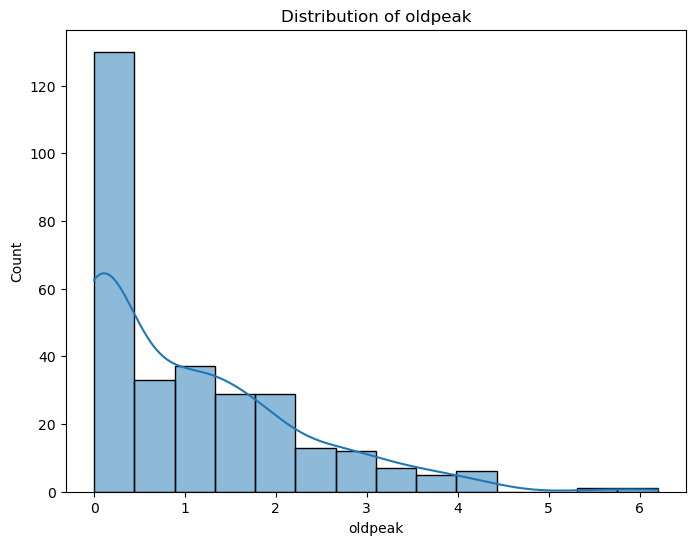

In [10]:
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.show()

### Mixed data - Bar plot


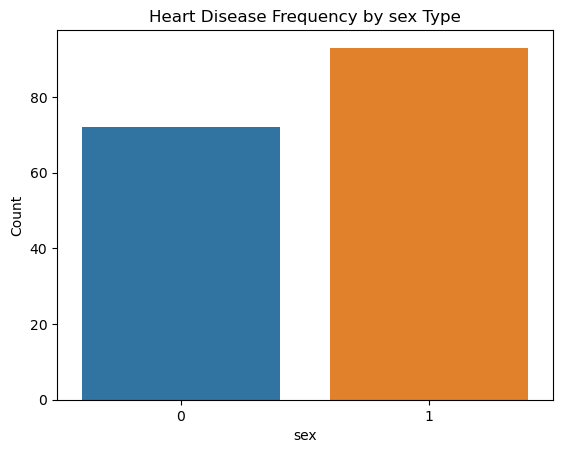

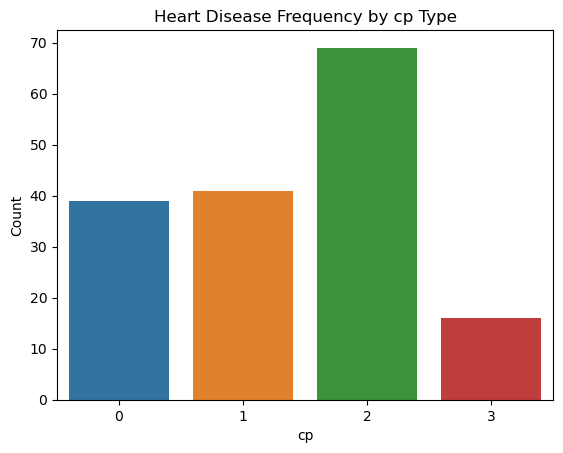

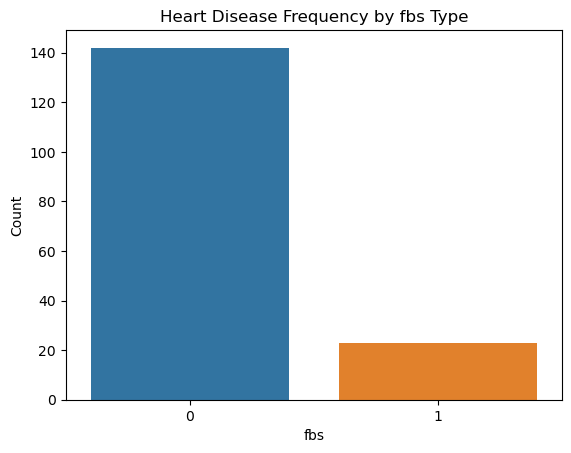

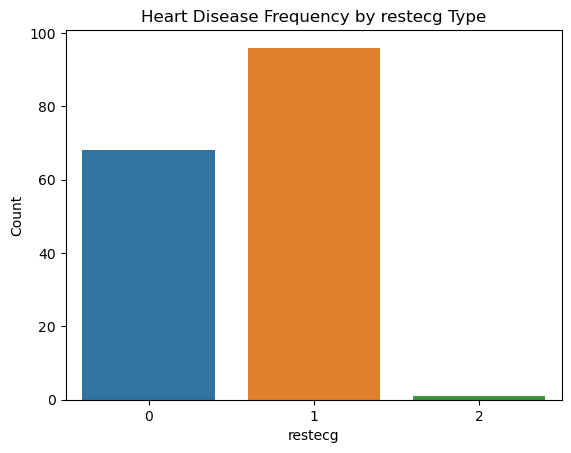

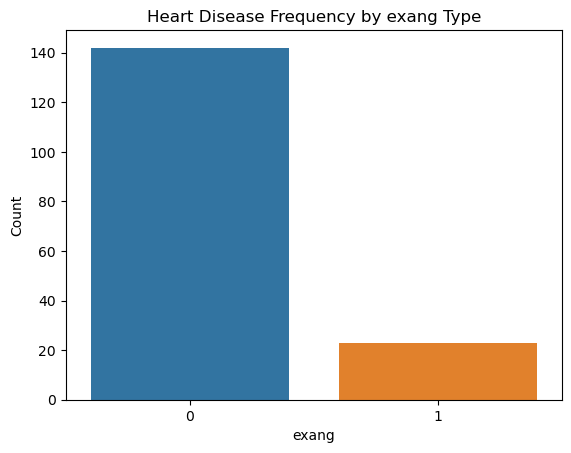

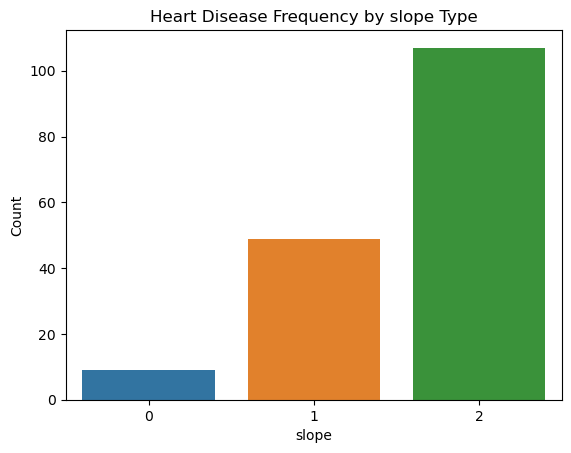

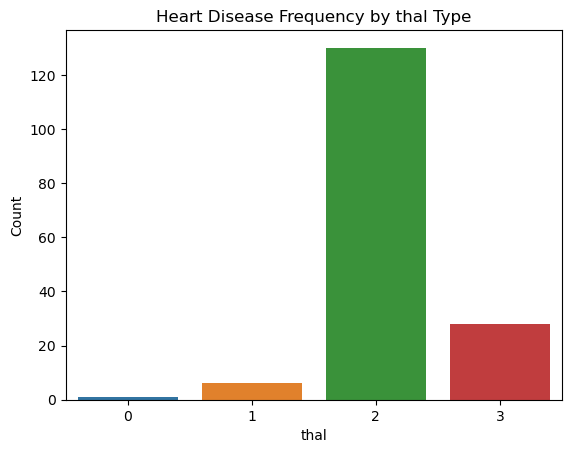

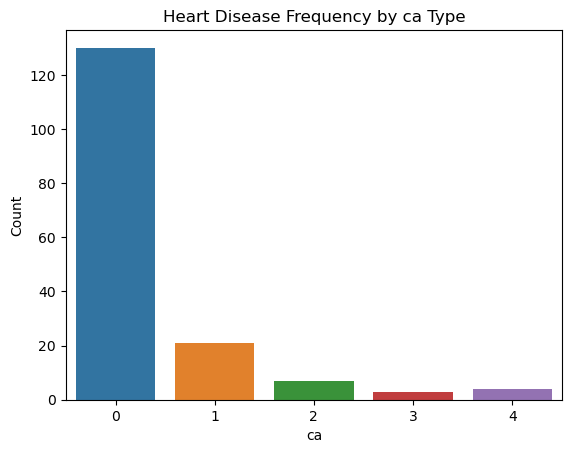

In [11]:
mixed_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal','ca', 'target']
for var in mixed_vars:
    if var!='target':
        chest_pain_counts = data.groupby(var)['target'].sum()
        sns.barplot(x=chest_pain_counts.index,y=chest_pain_counts.values)
        # chest_pain_counts.plot(kind='bar')
        plt.title(f"Heart Disease Frequency by {var} Type")  
        plt.ylabel("Count")
        plt.show()
        # sns.countplot(x=var, data=data, hue='target') 
        # plt.show()



### This does the following:

*   Counts target values (bar plot categorical)
    
*   Plots a histogram of age (numerical)
    
*   Sums heart disease counts grouped by chest pain type (mixed cp and target)izing the dataset.

### Analyze the distribution and relationship of variables. Create scatter plots, box plots,and QQ-plots to understand variable dependencies.

## Scatter Plot

### All Columns Pair show

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

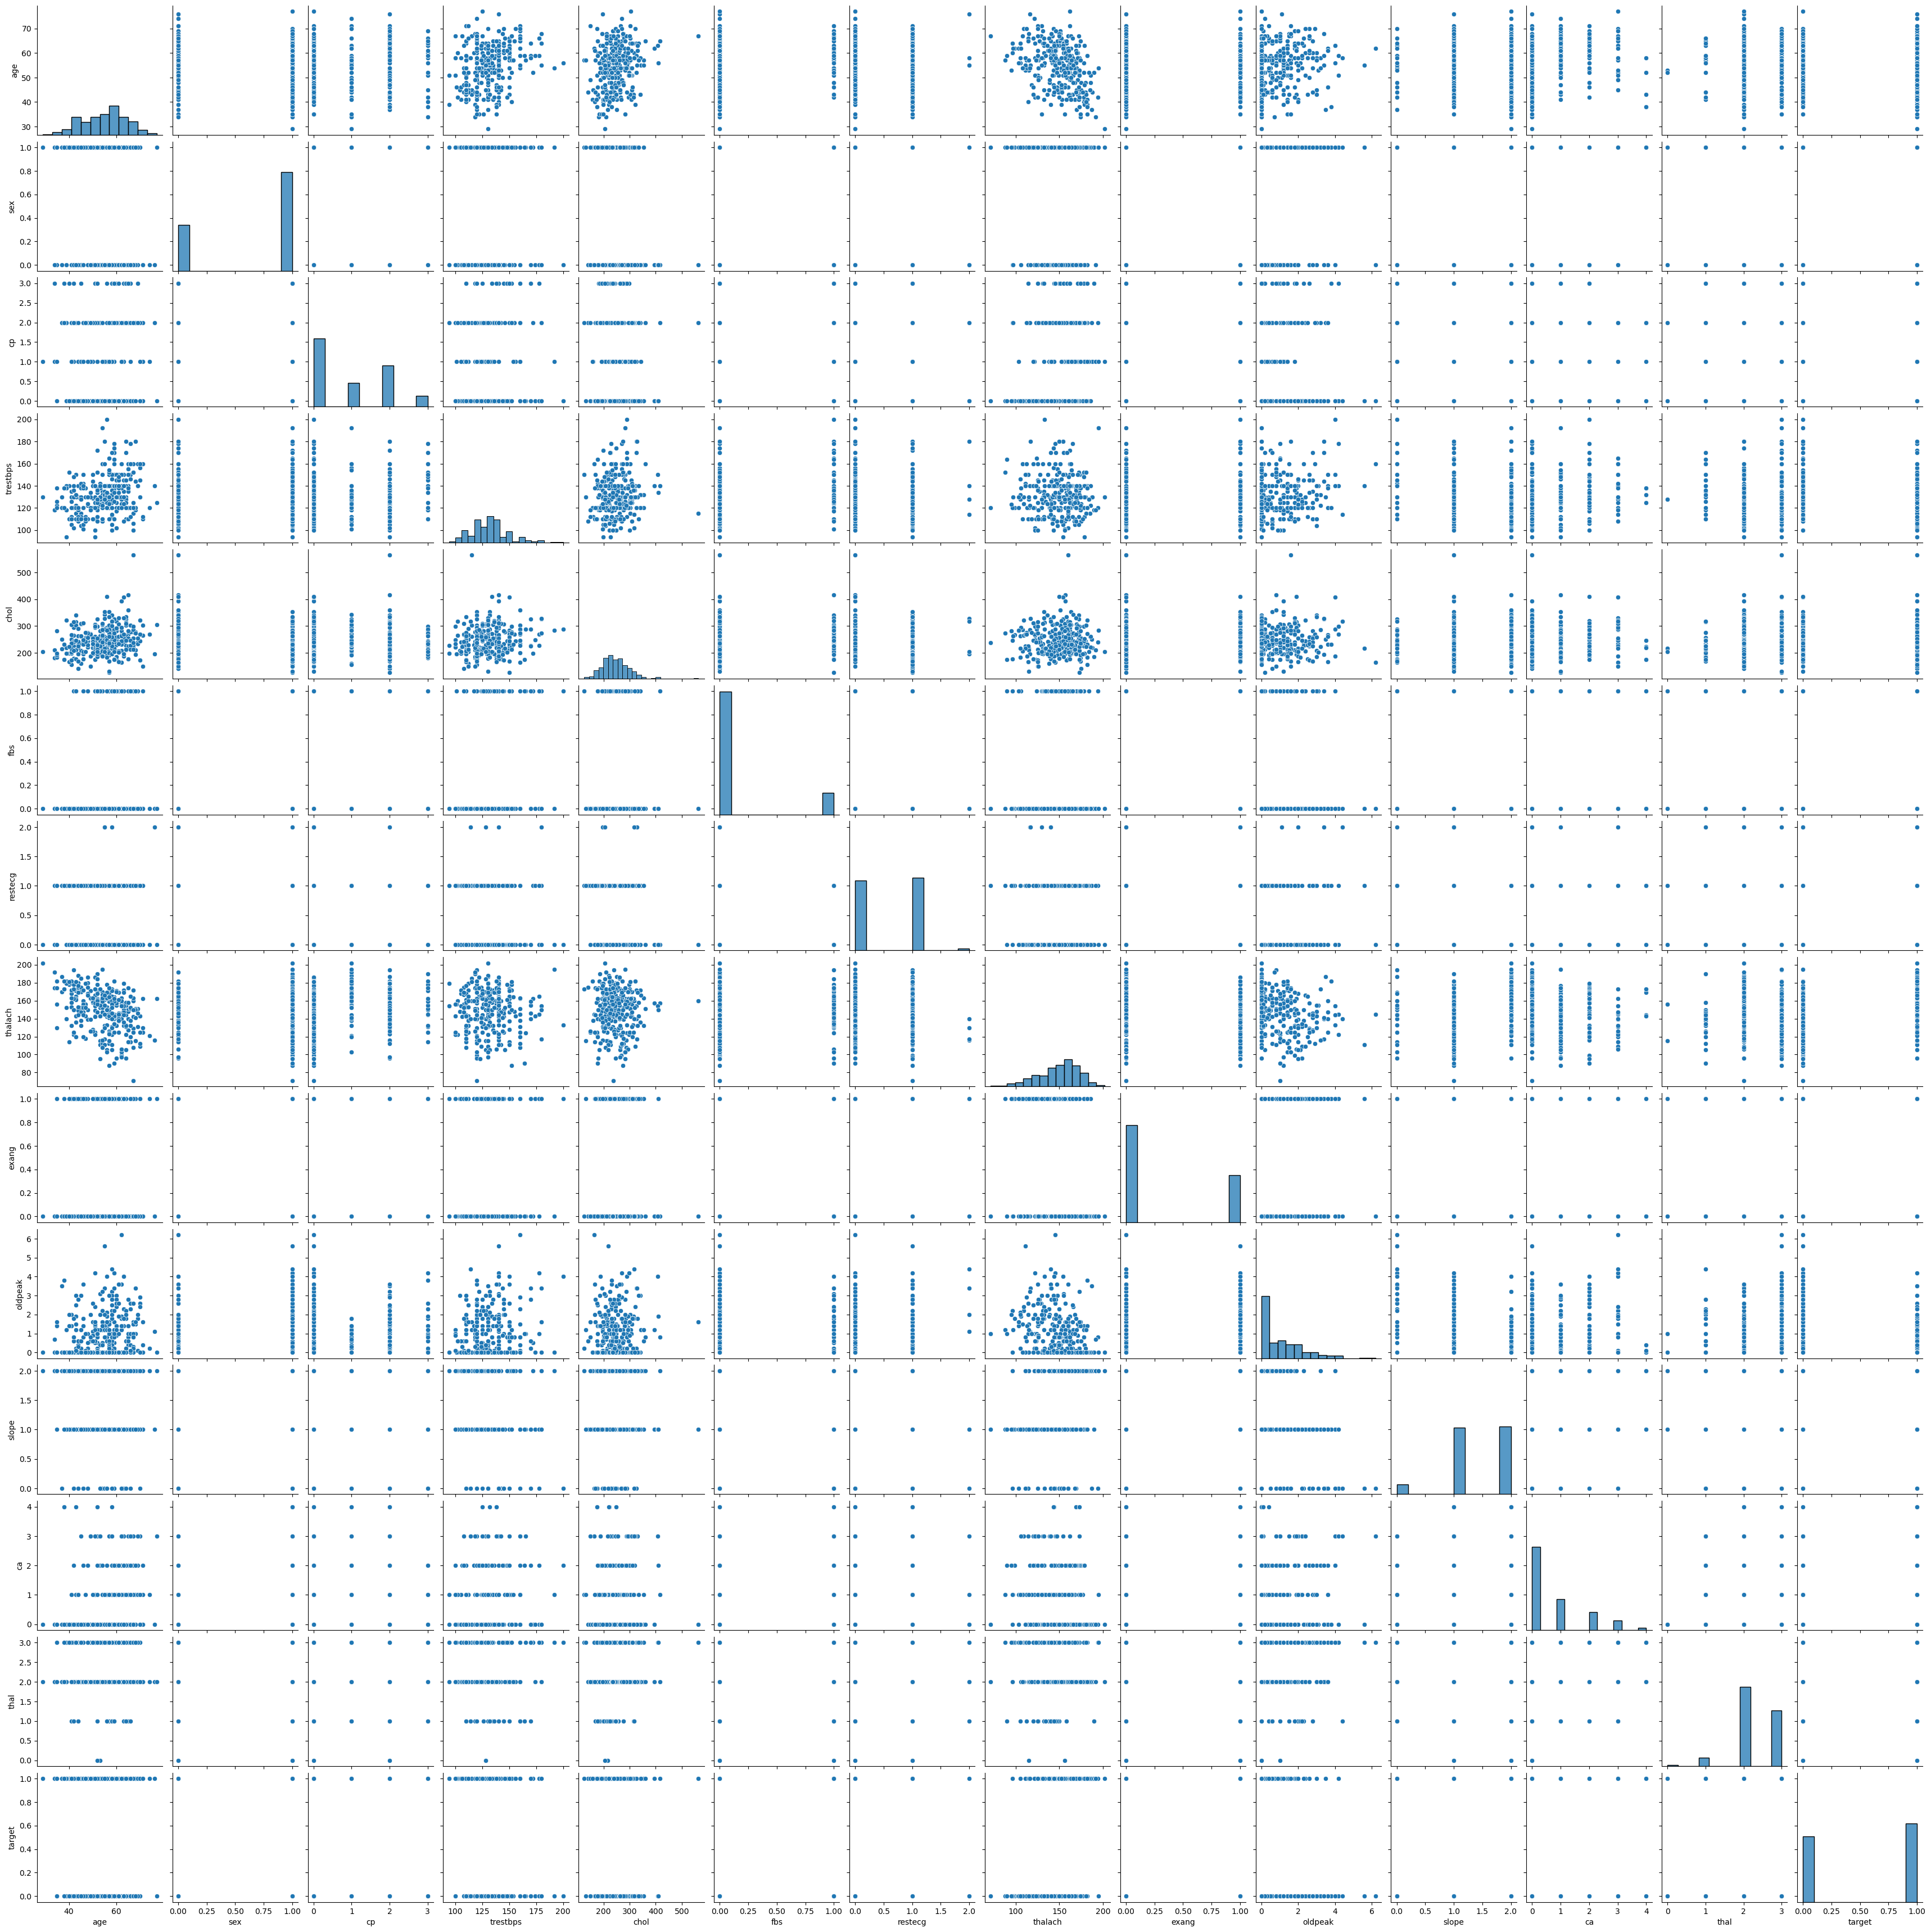

In [12]:
# Scatter plots
sns.pairplot(data)
plt.show()

### only show numerical Columns

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

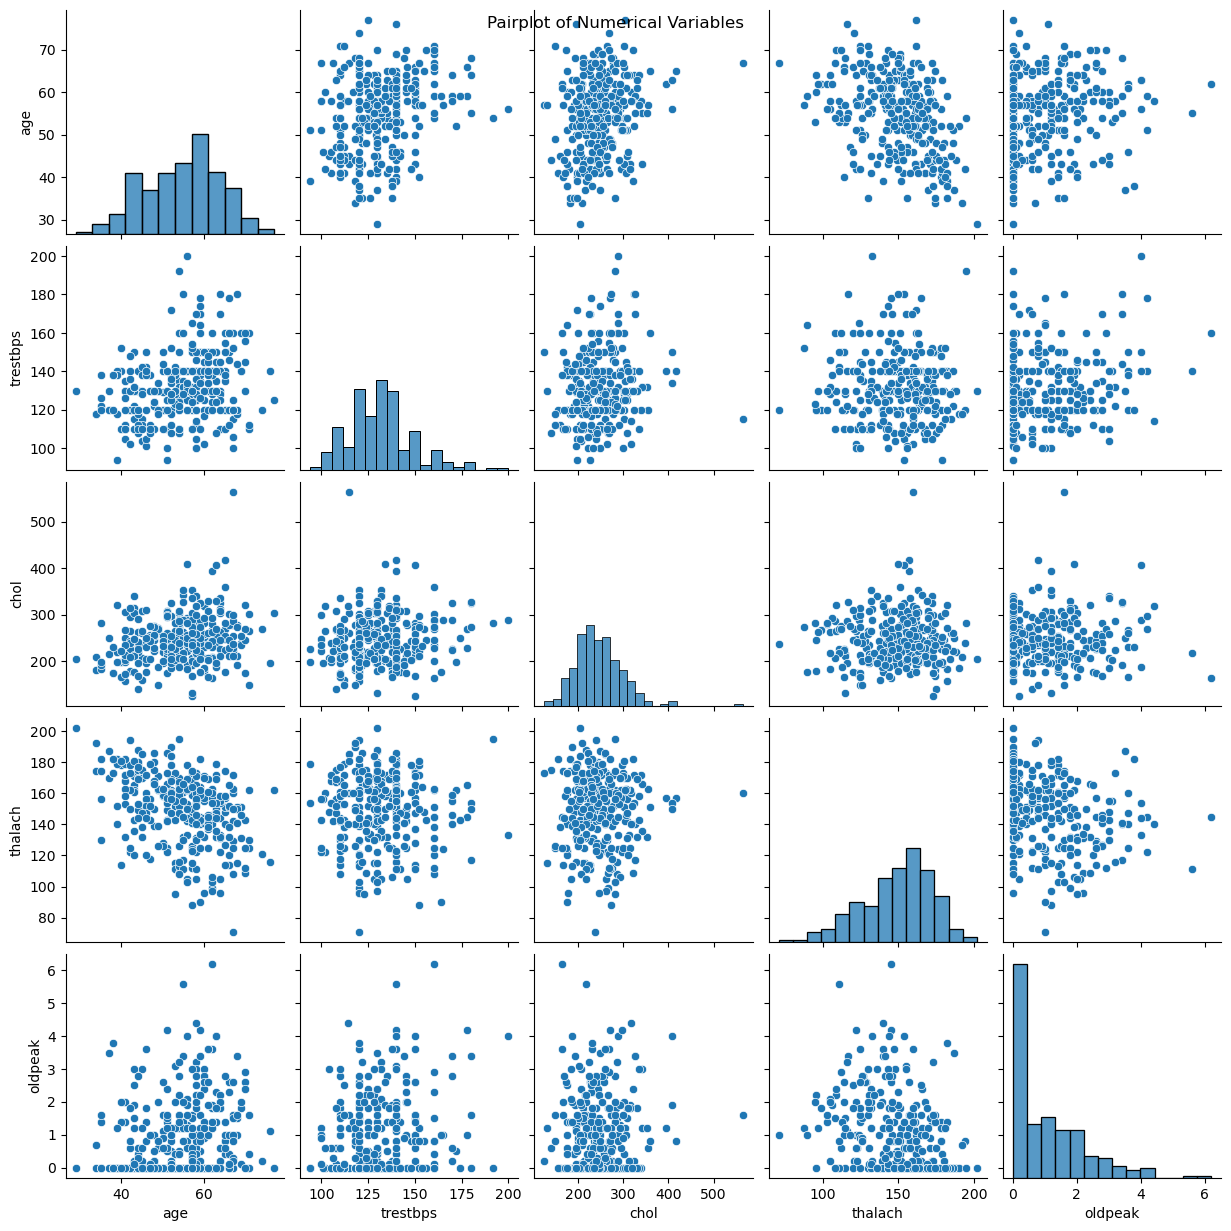

In [13]:
sns.pairplot(data=data, vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], kind='scatter')
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

## Box plots

### All columns Data

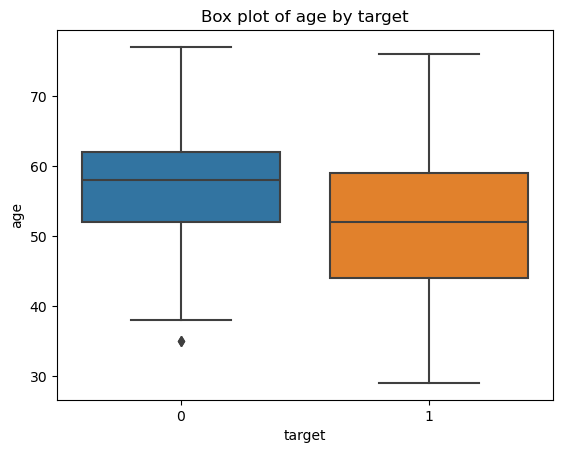

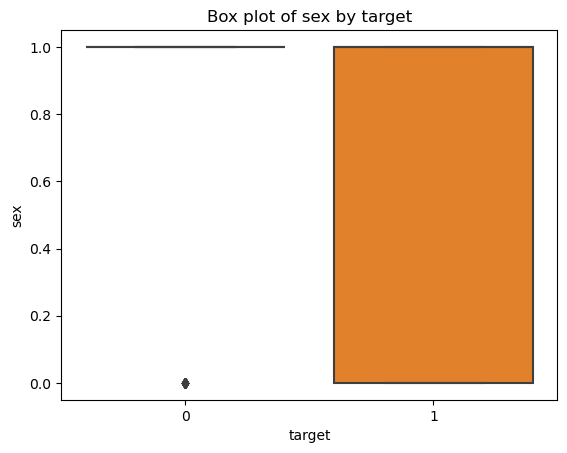

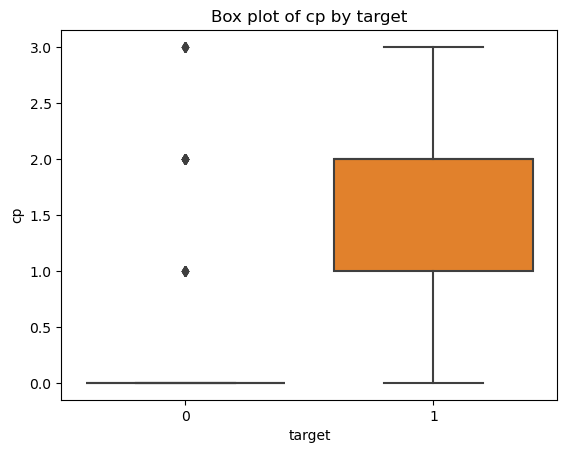

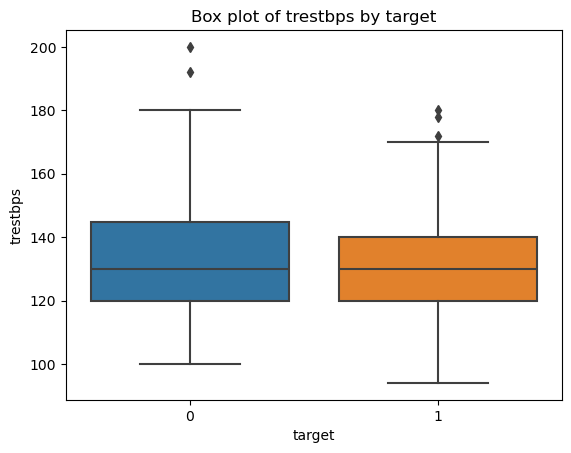

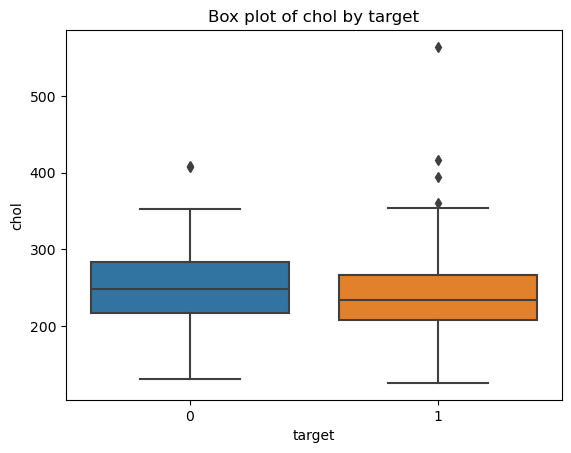

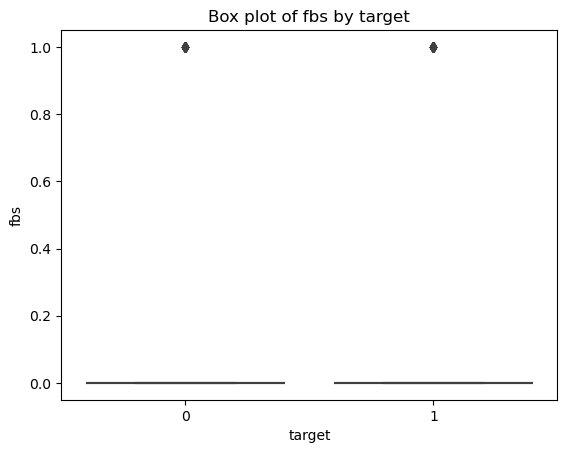

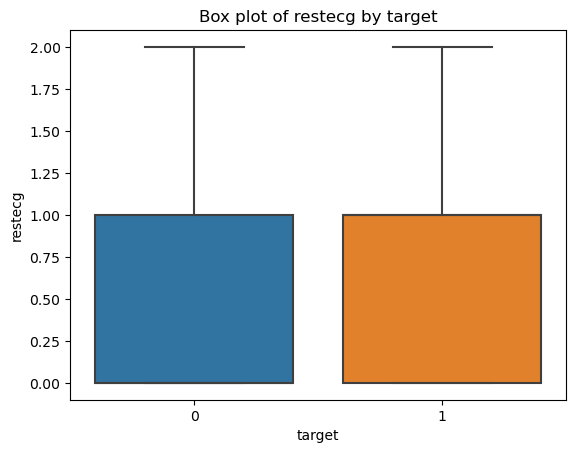

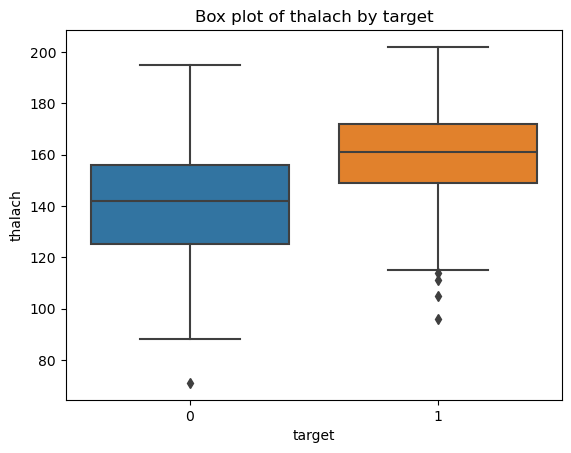

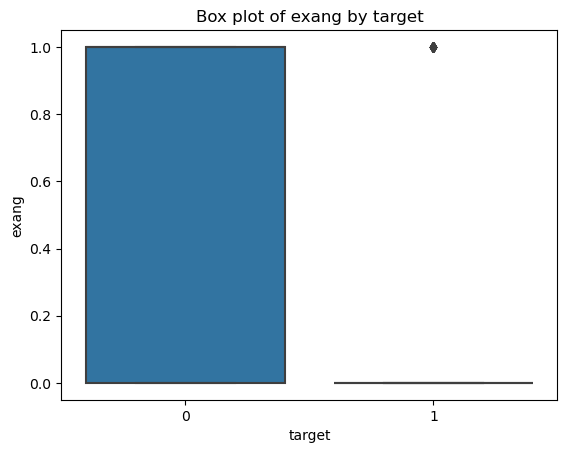

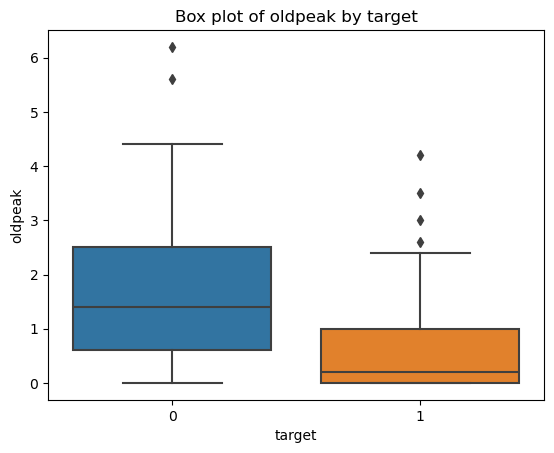

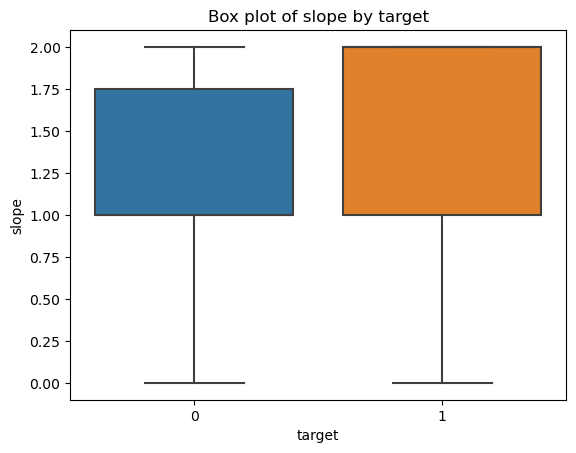

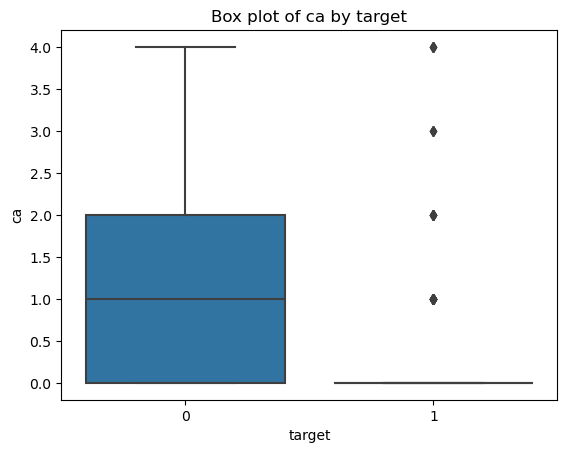

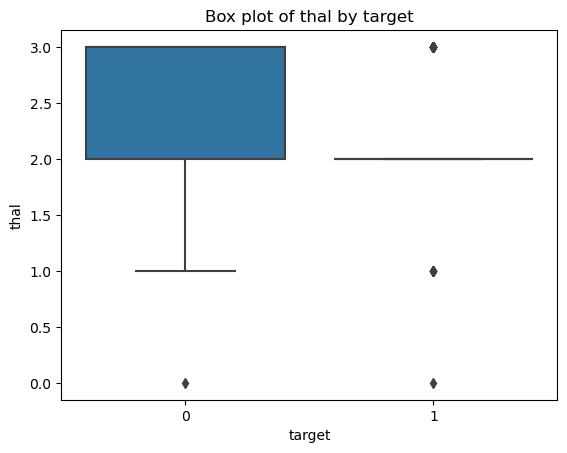

In [14]:
for column in data.columns:
    if column != 'target':
        sns.boxplot(x='target', y=column, data=data)
        plt.title(f'Box plot of {column} by target')
        plt.show()

### Only show Numerical Columns

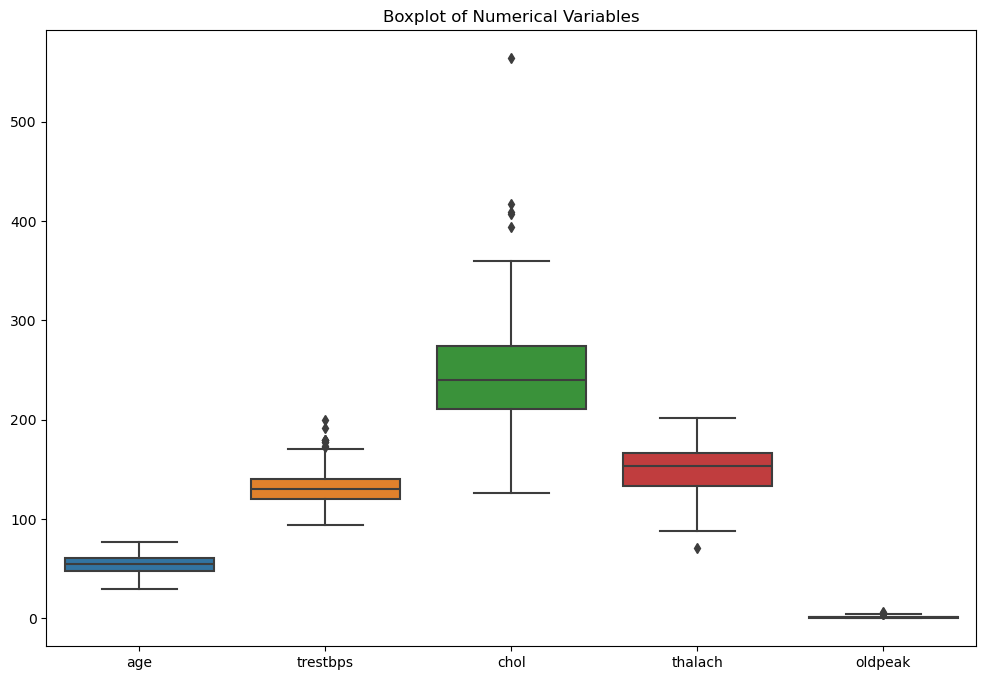

In [15]:
# Box plots for numerical variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title('Boxplot of Numerical Variables')
plt.show()

## QQ-plots


### Show All Columns

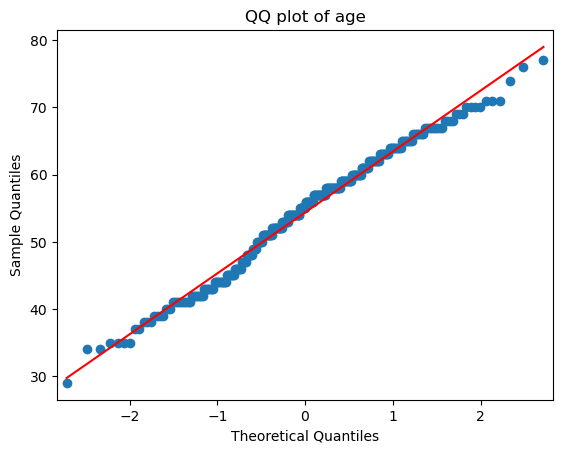

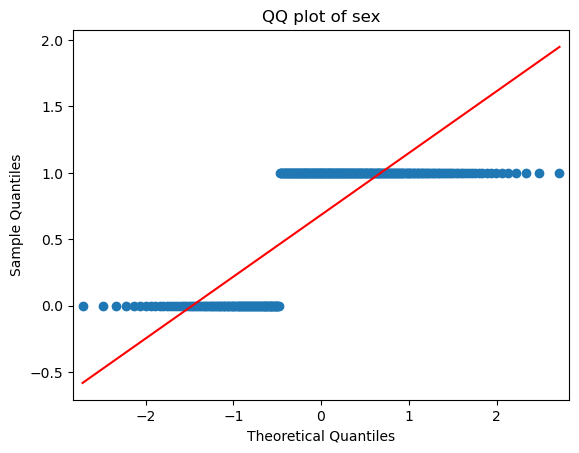

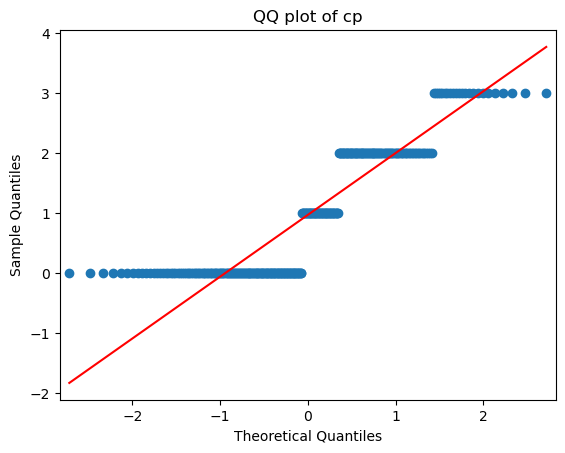

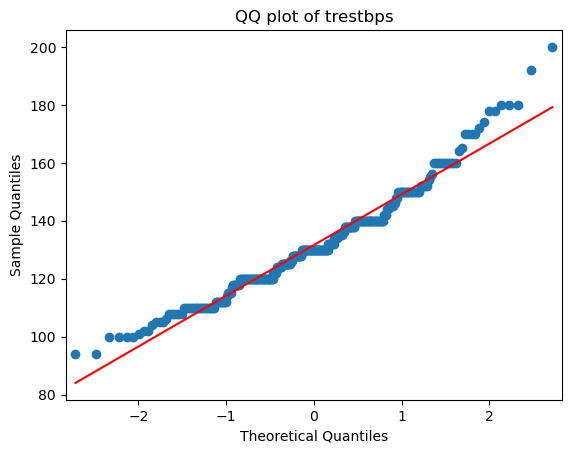

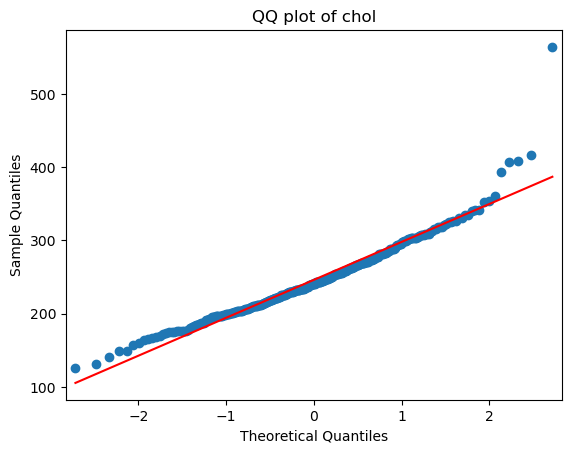

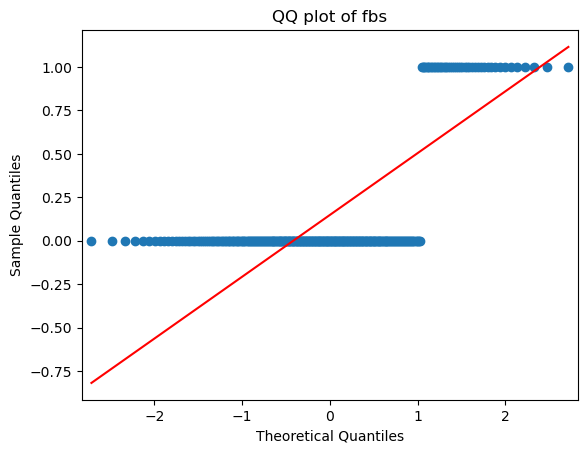

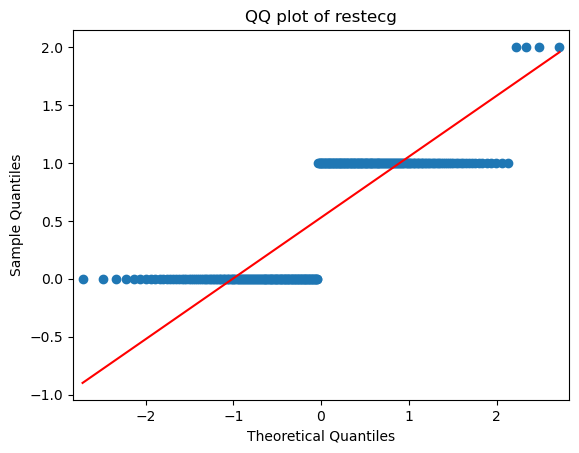

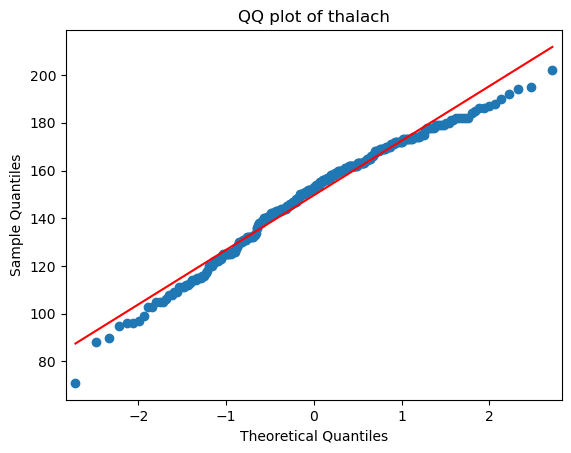

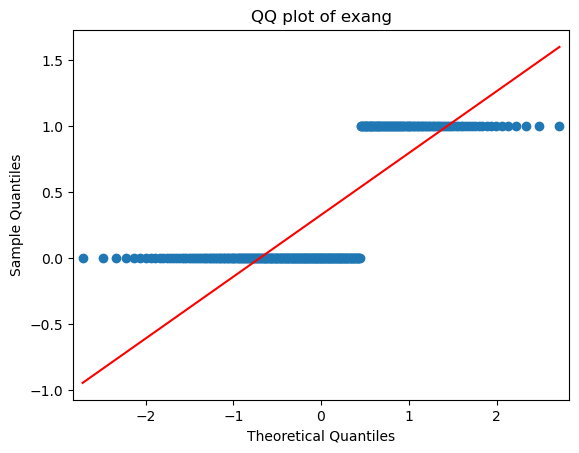

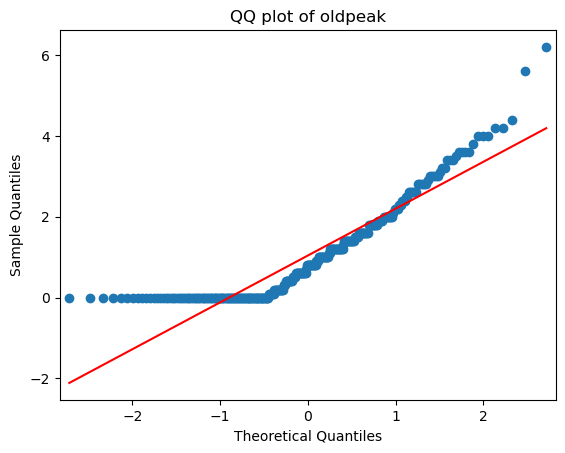

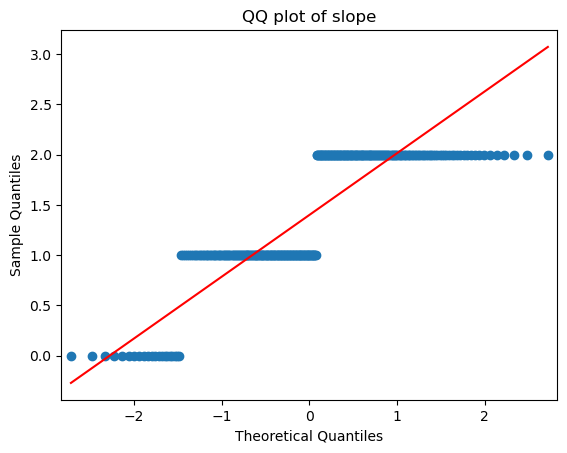

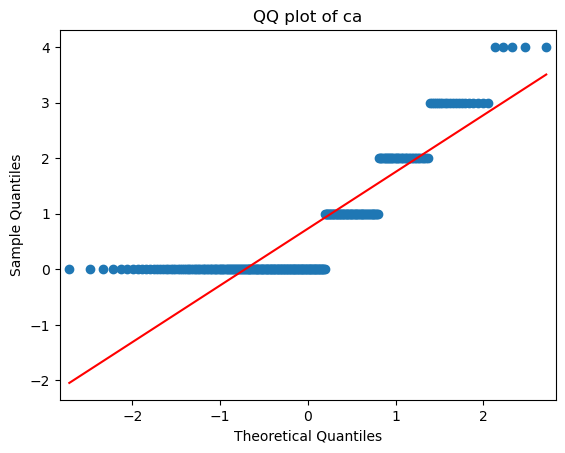

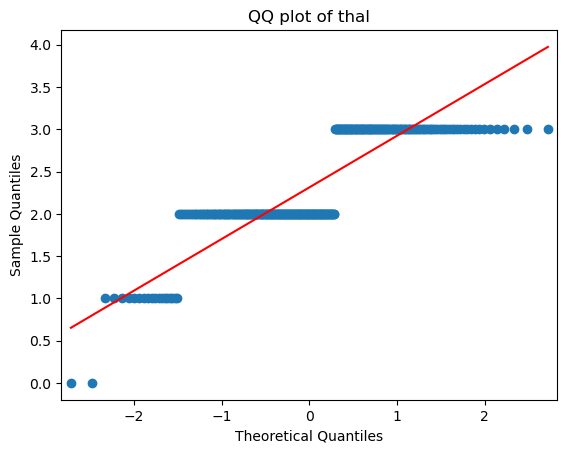

In [16]:
# QQ-plots
for column in data.columns:
    if column != 'target':
        qqplot(data[column], line='s')
        plt.title(f'QQ plot of {column}')
        plt.show()

### Show only Numerical Colummns

<Figure size 800x600 with 0 Axes>

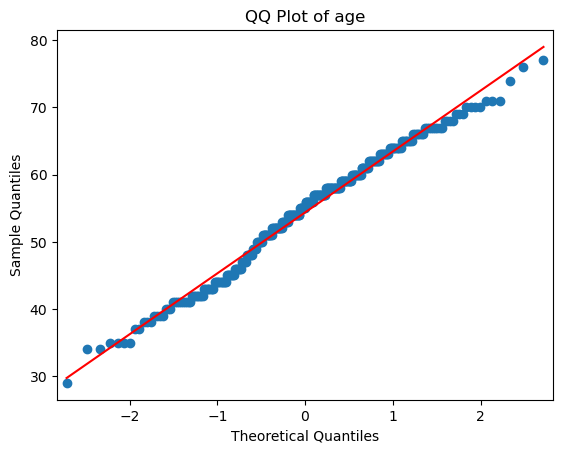

<Figure size 800x600 with 0 Axes>

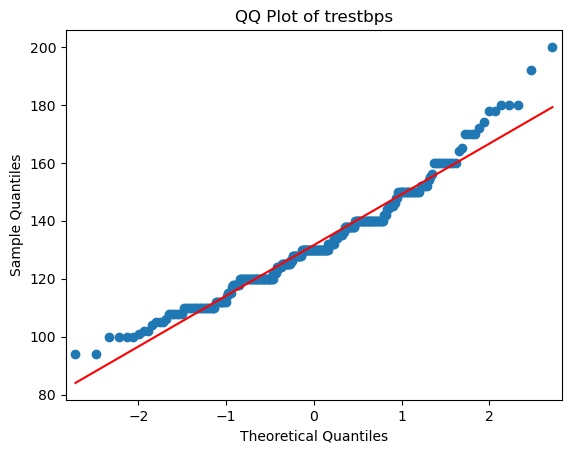

<Figure size 800x600 with 0 Axes>

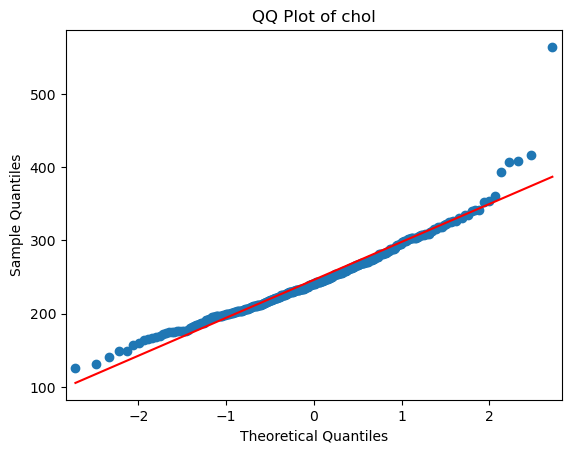

<Figure size 800x600 with 0 Axes>

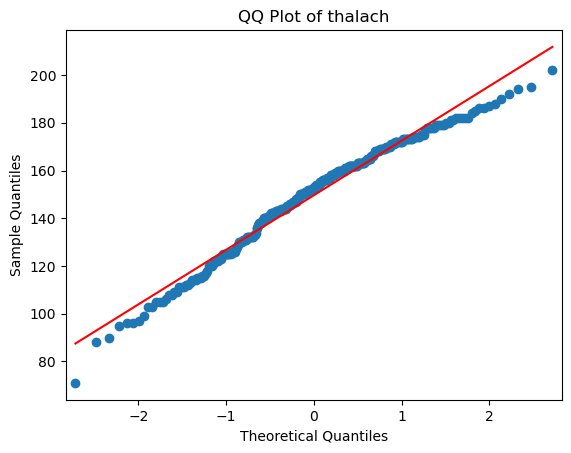

<Figure size 800x600 with 0 Axes>

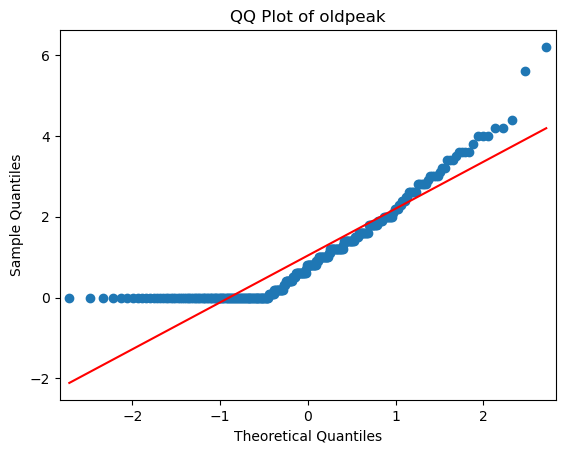

In [17]:
for var in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    plt.figure(figsize=(8, 6))
    qqplot(data[var], line='s')
    plt.title(f'QQ Plot of {var}')
    plt.show()



## Relationship between numerical and categorical variables using box plots

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


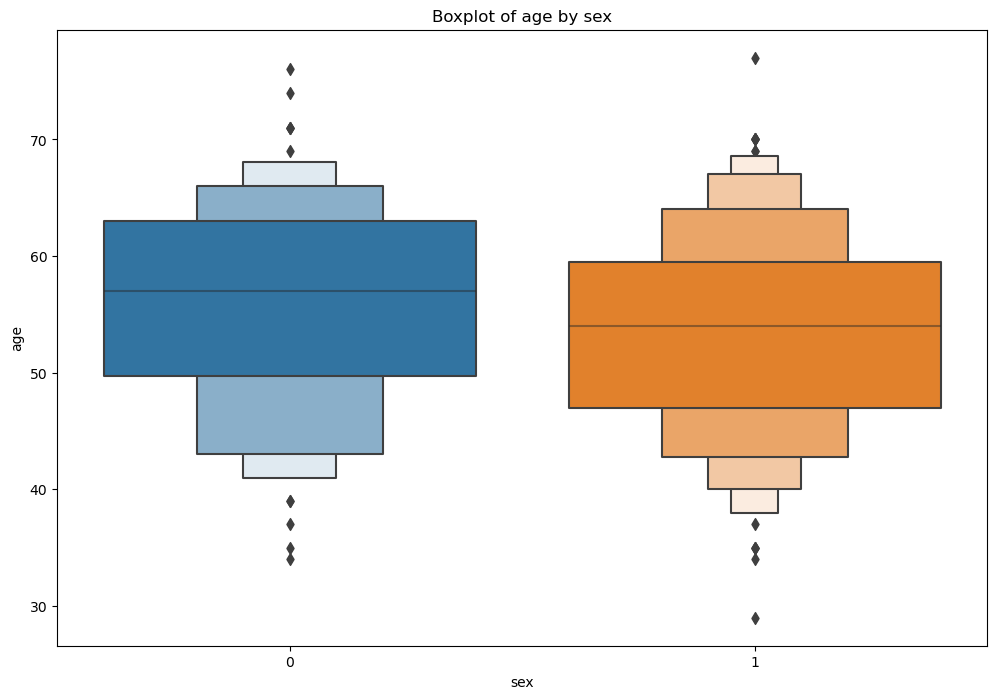

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


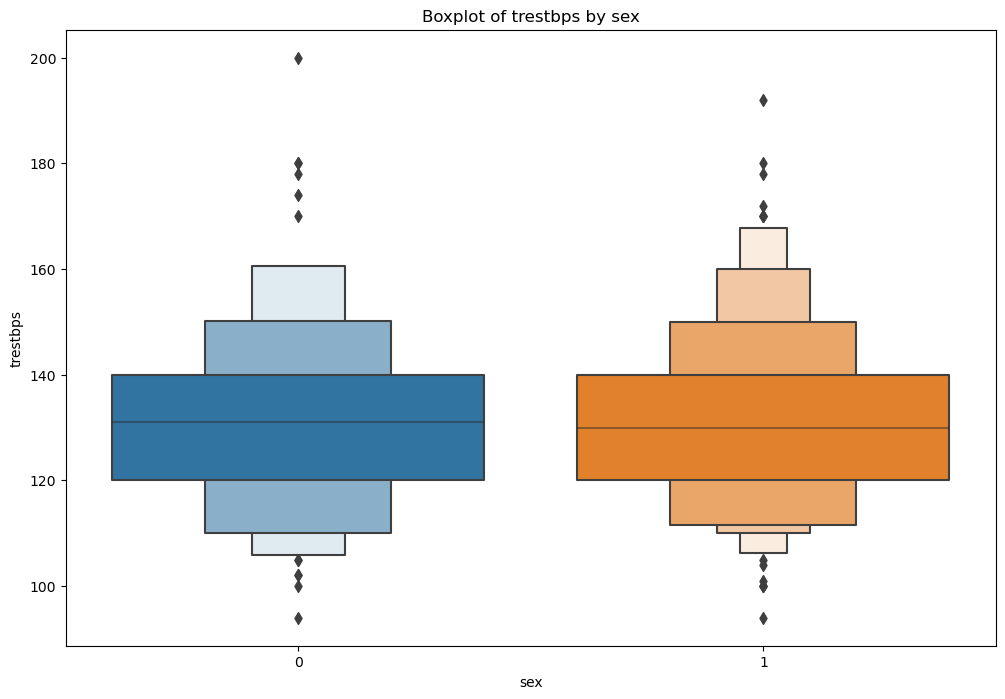

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


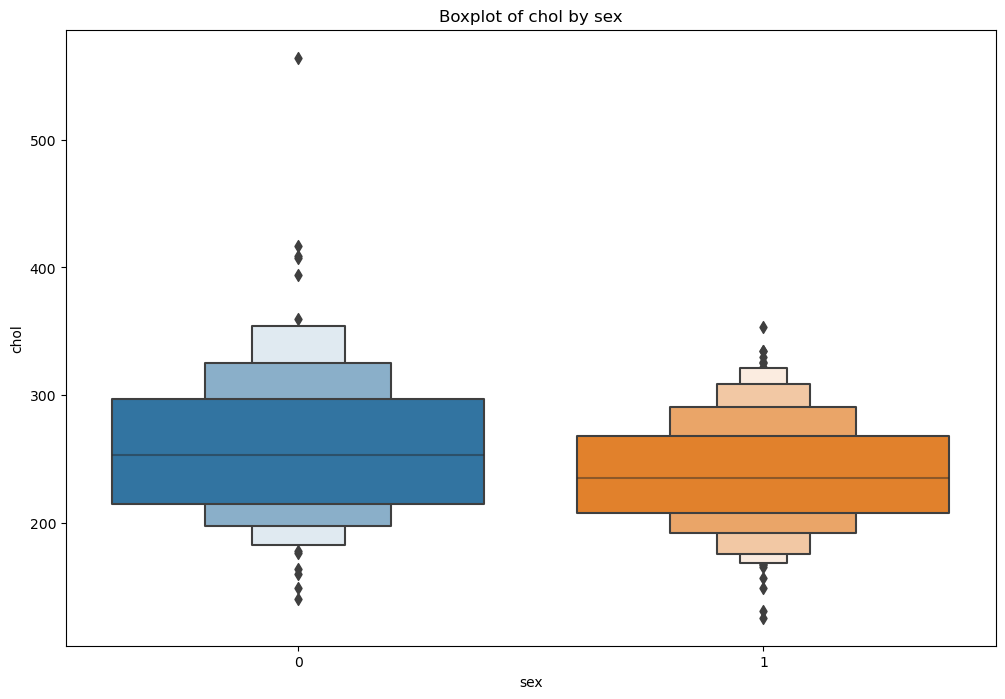

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


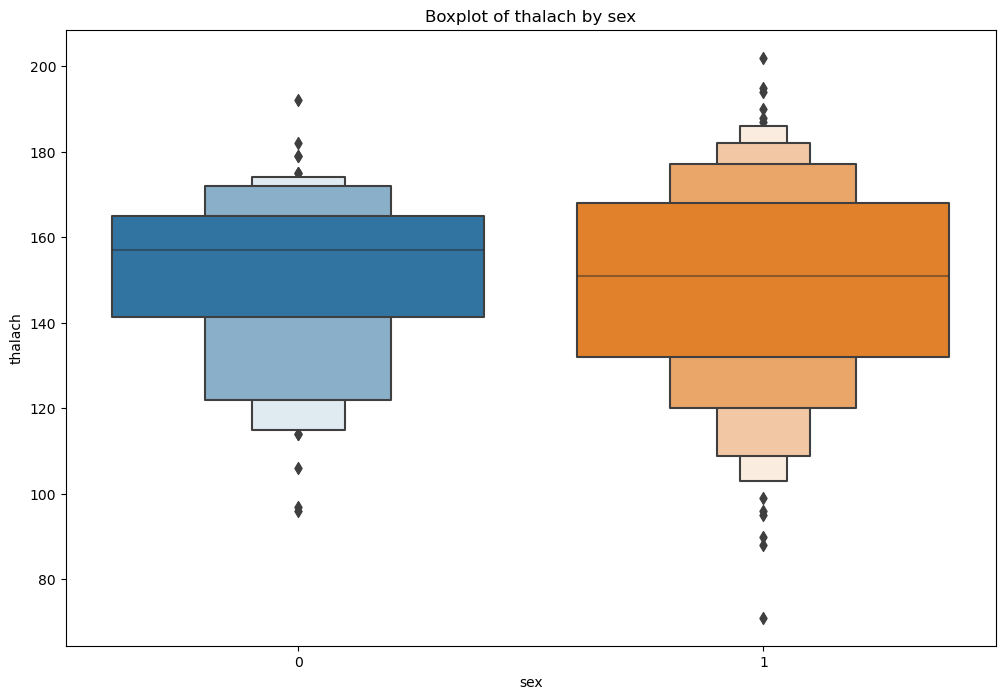

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


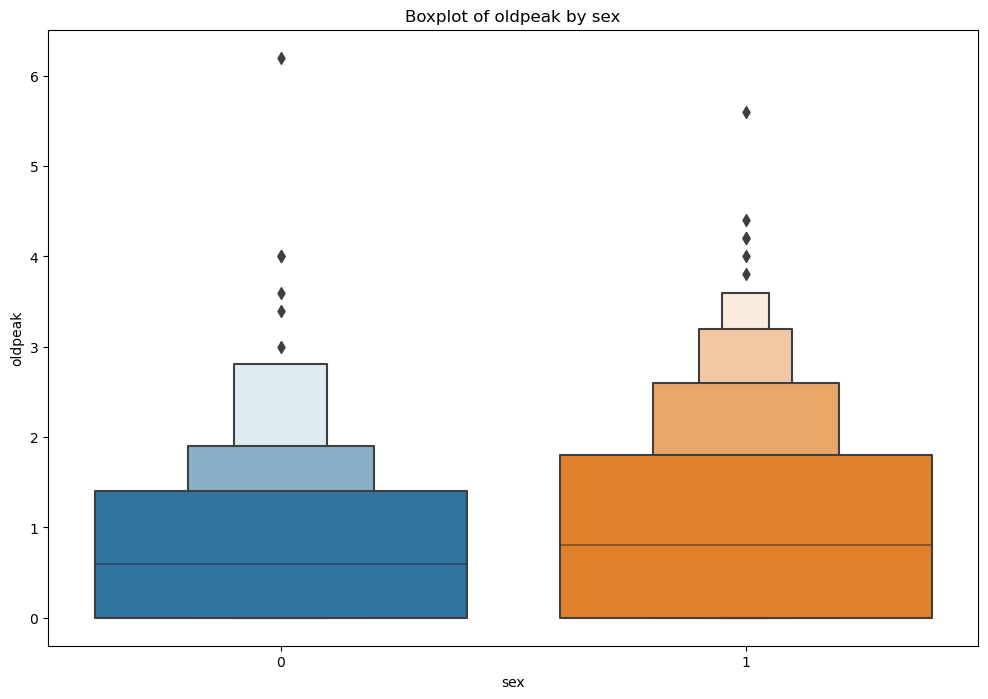

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

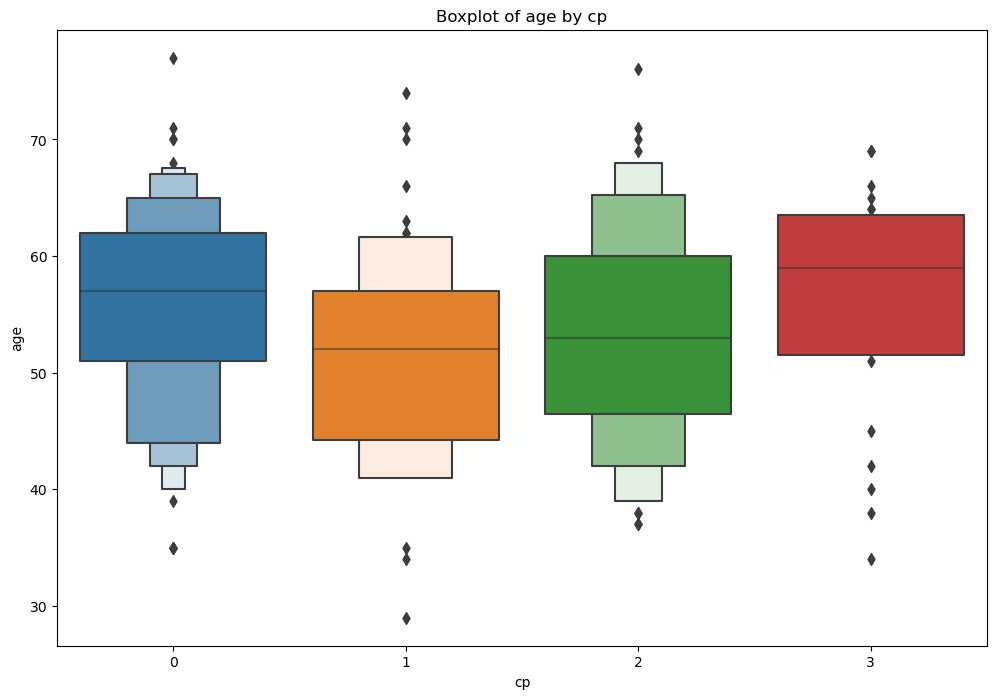

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

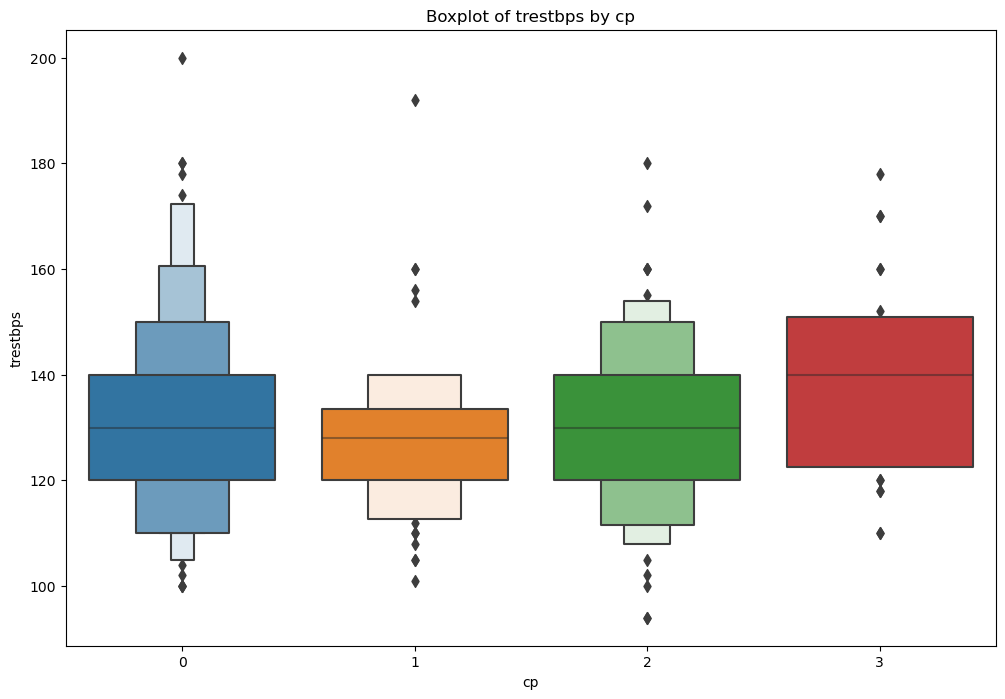

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

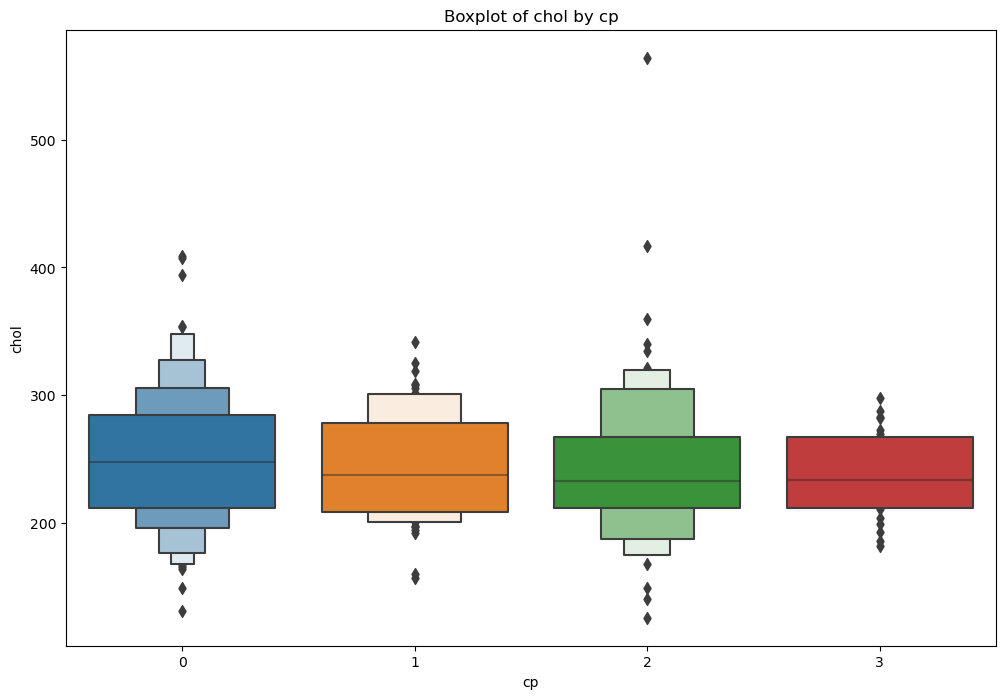

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

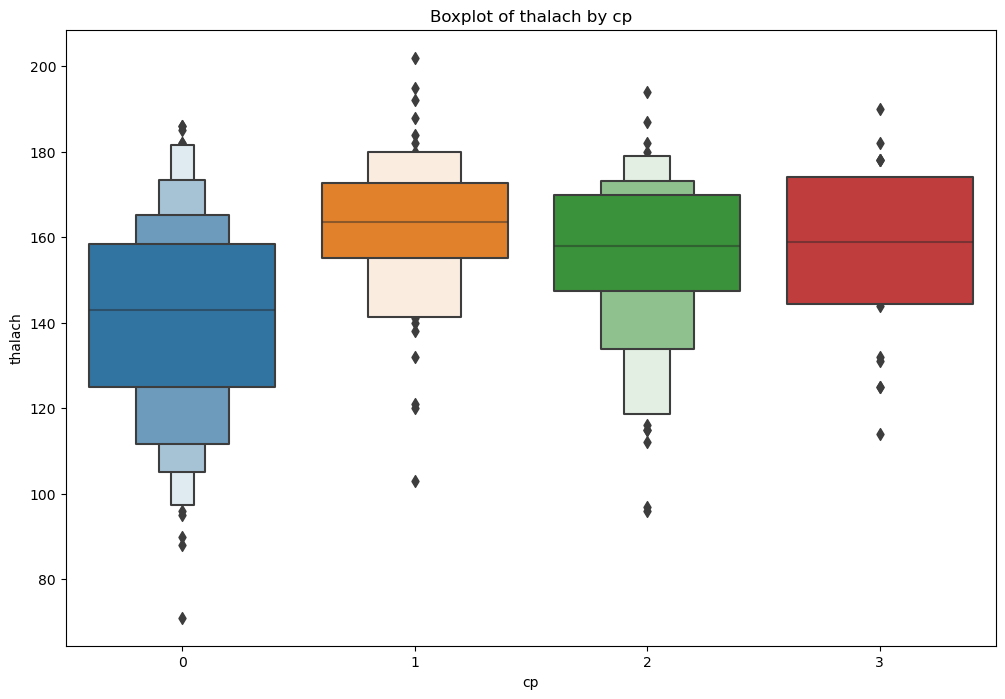

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

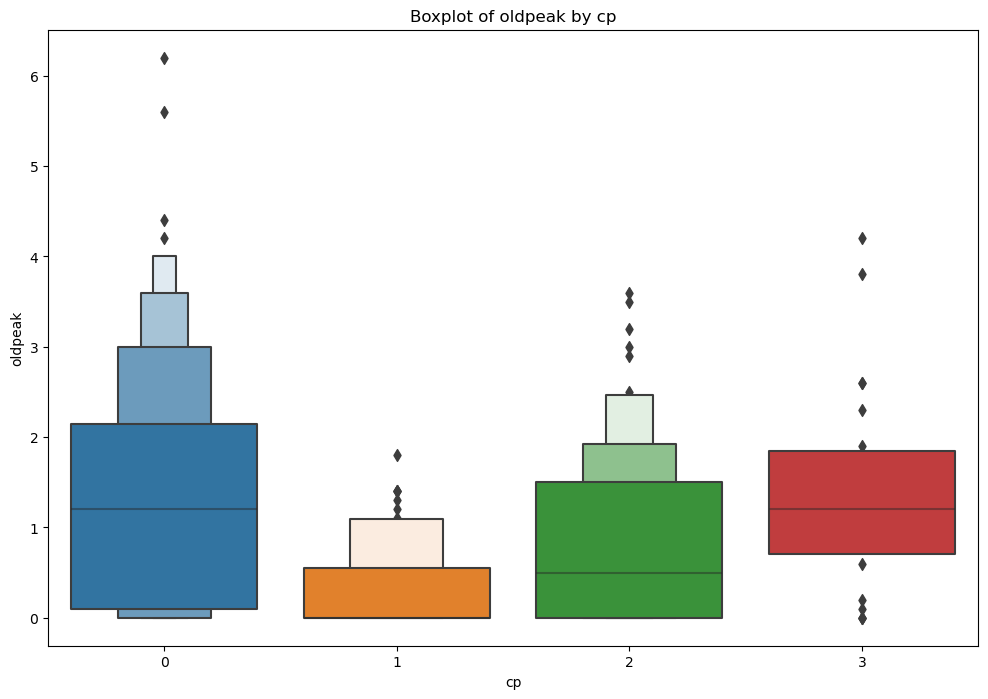

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


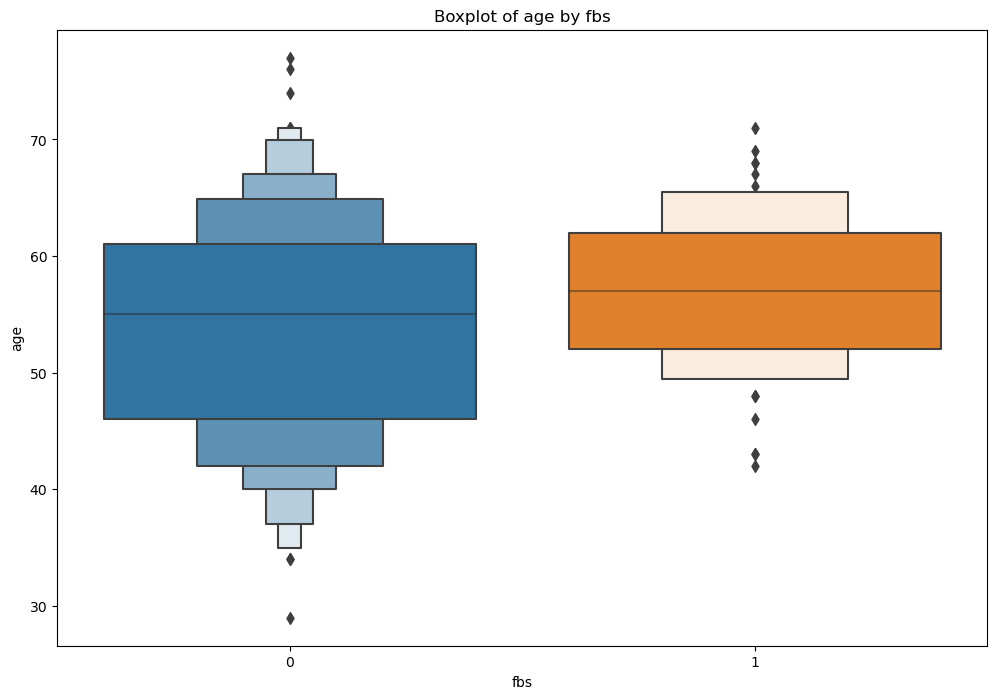

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


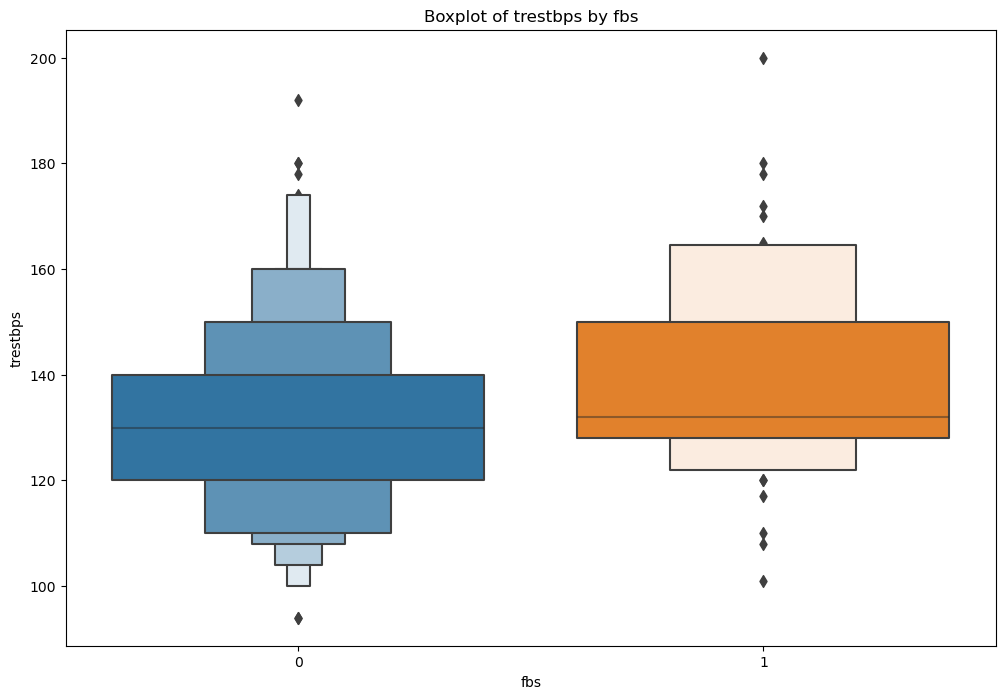

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


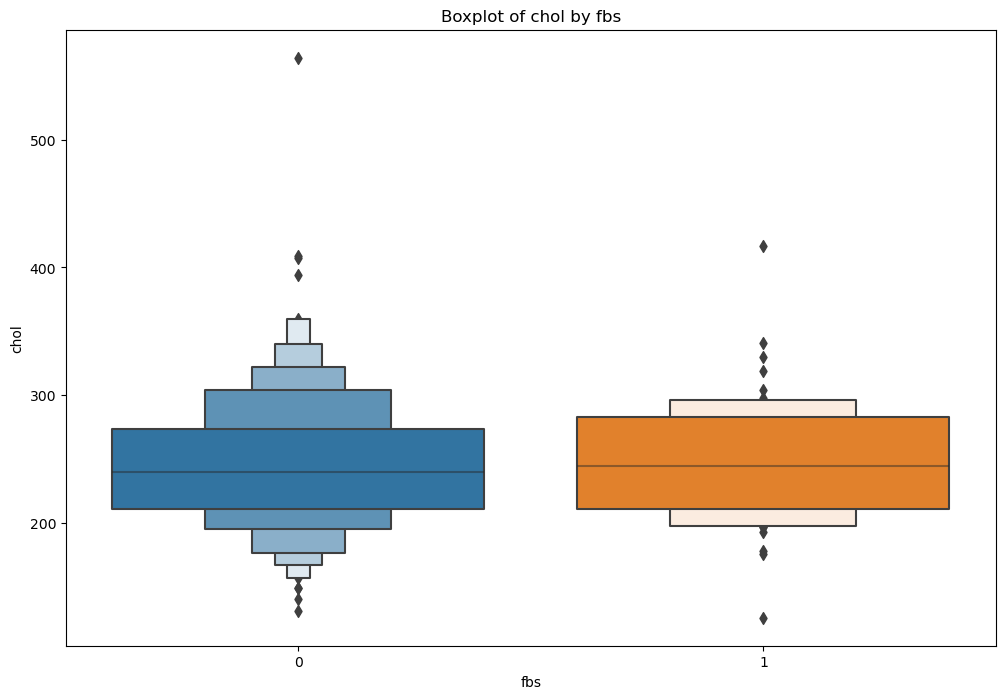

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


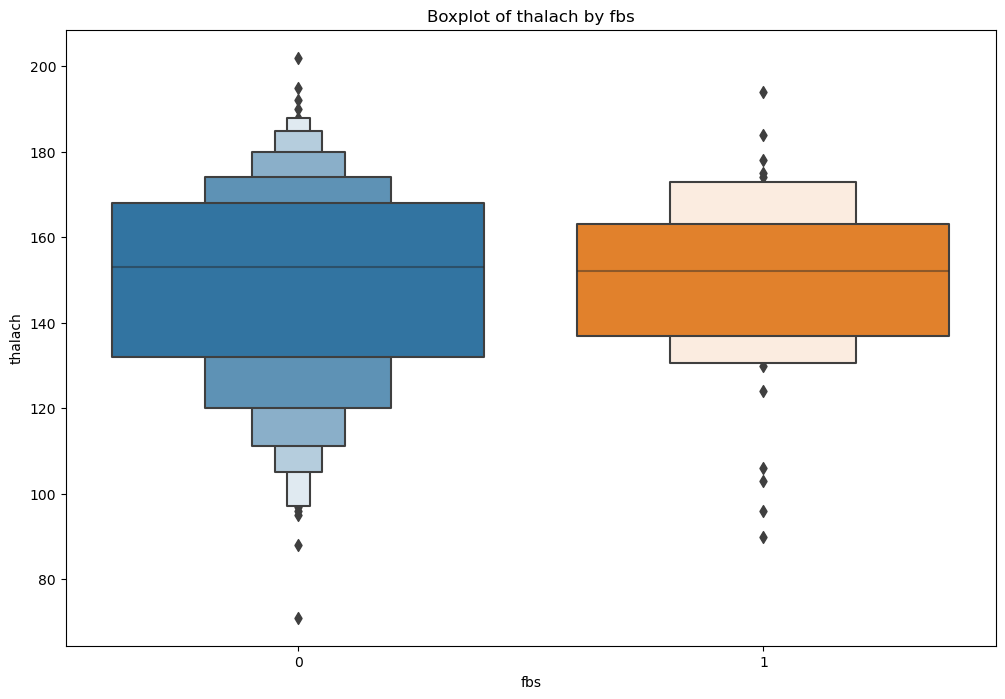

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


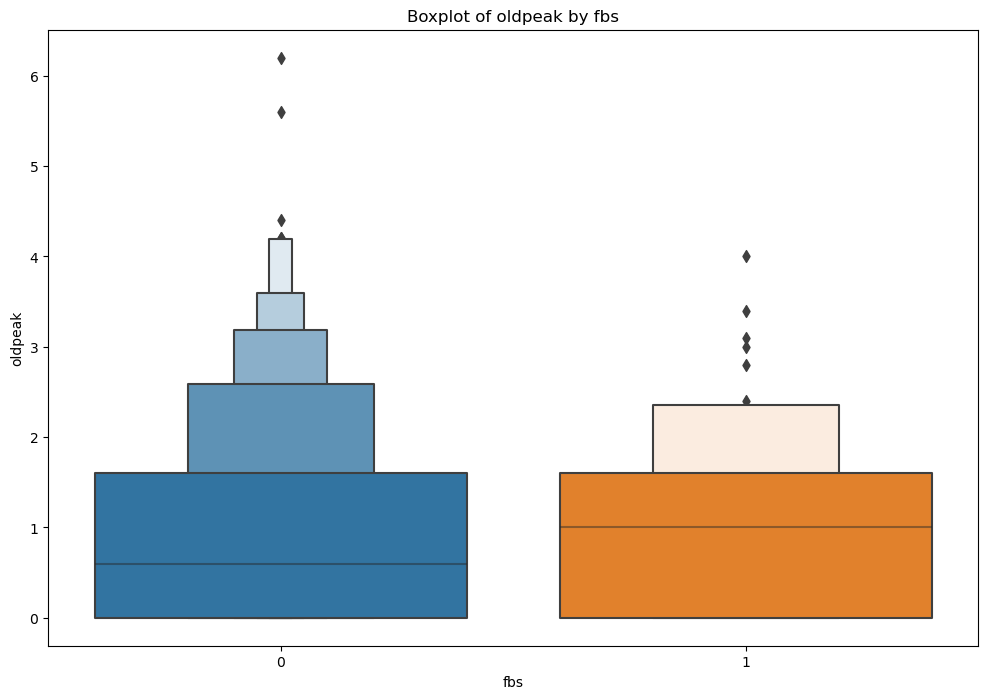

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


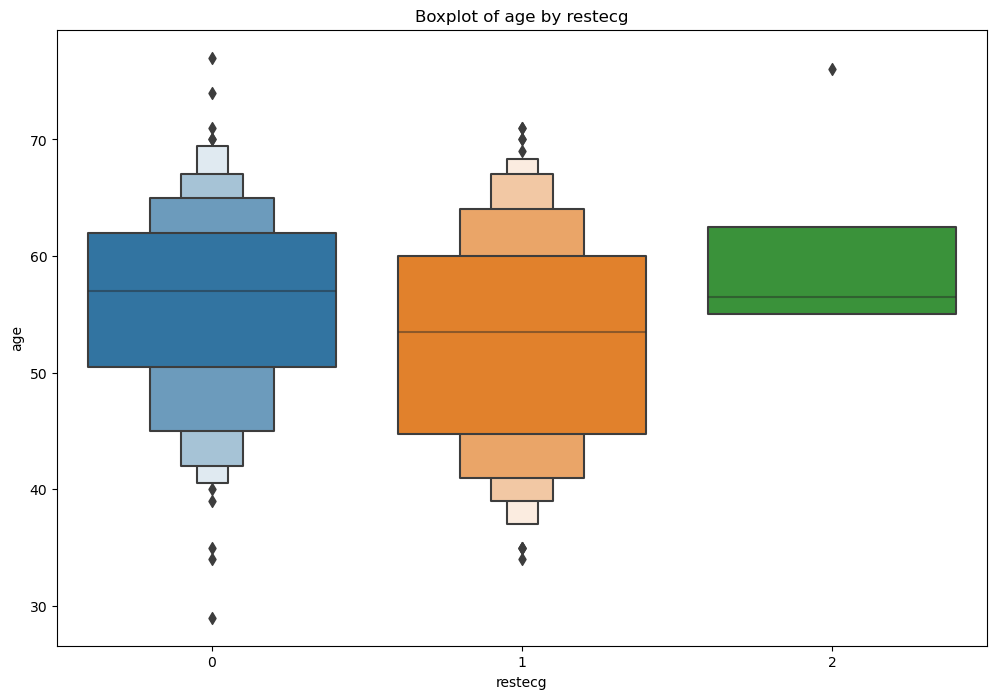

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


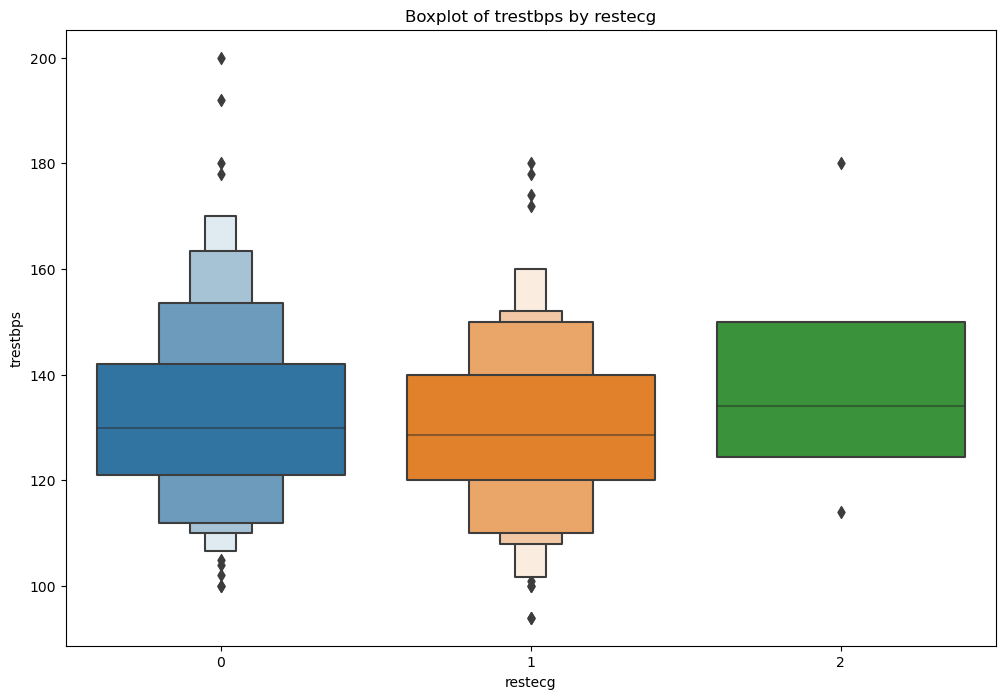

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


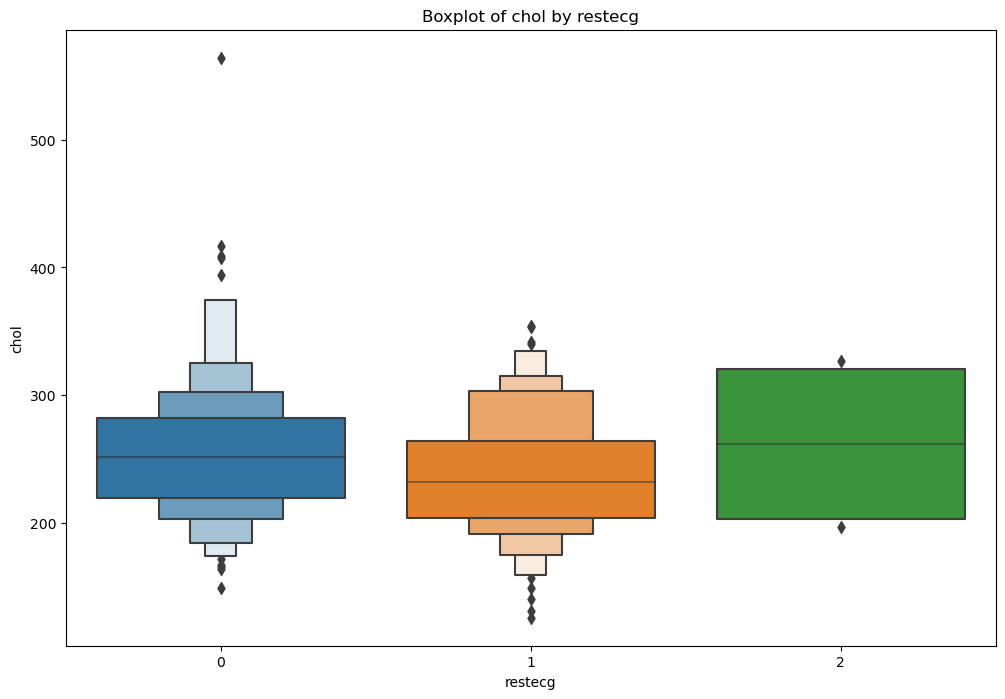

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


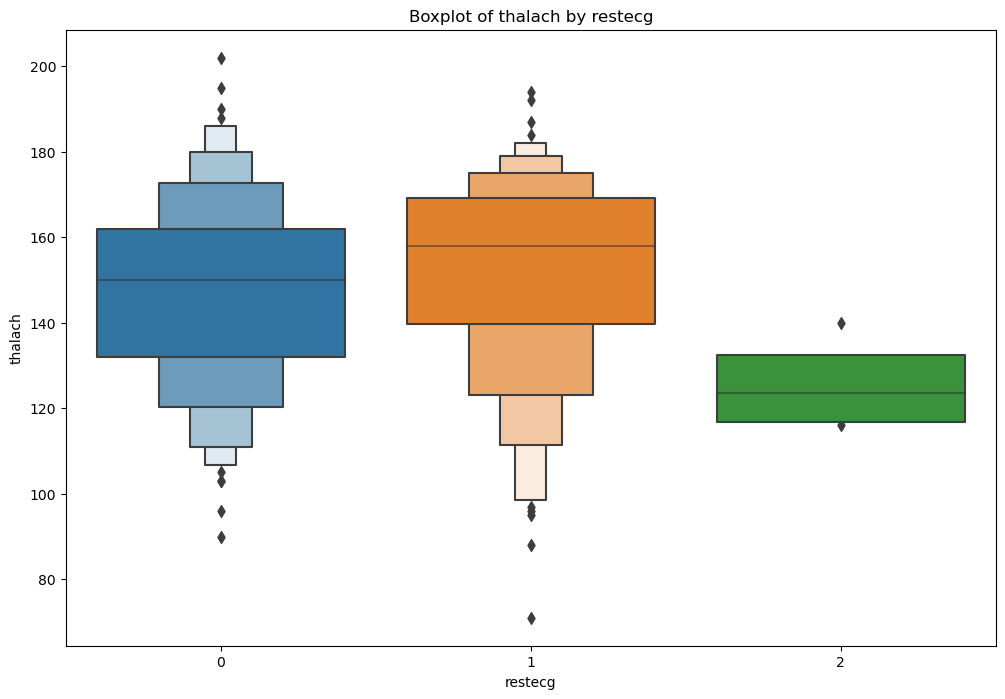

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


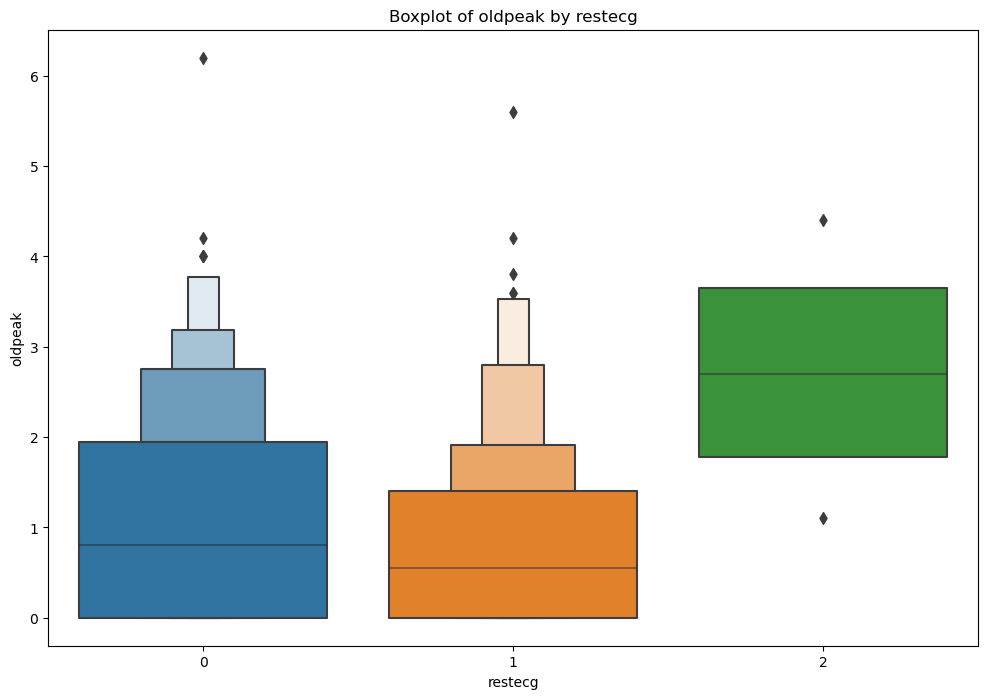

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


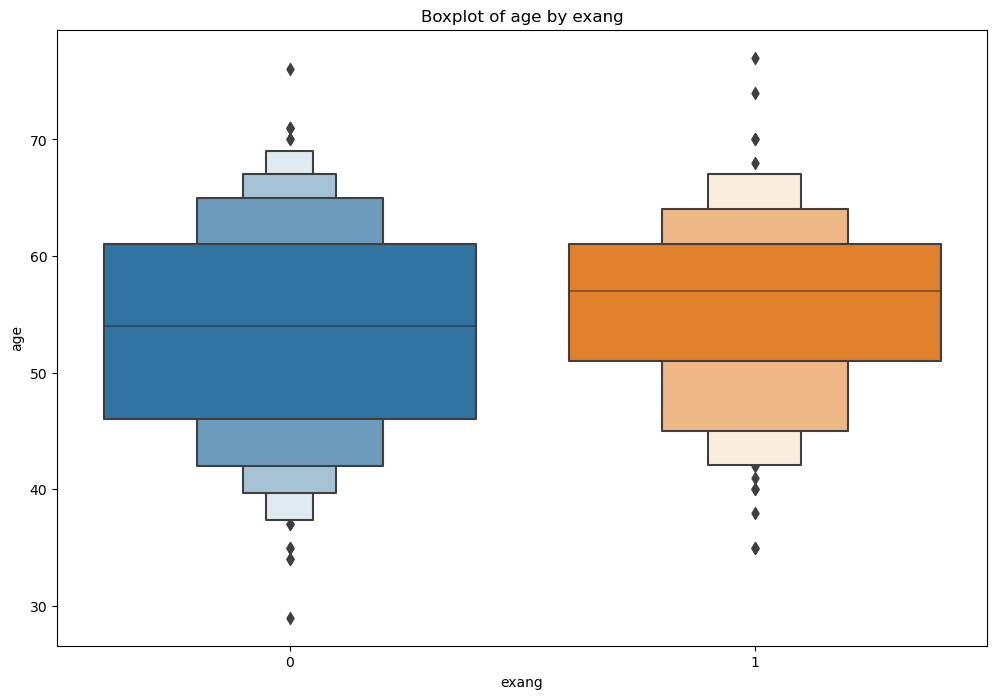

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


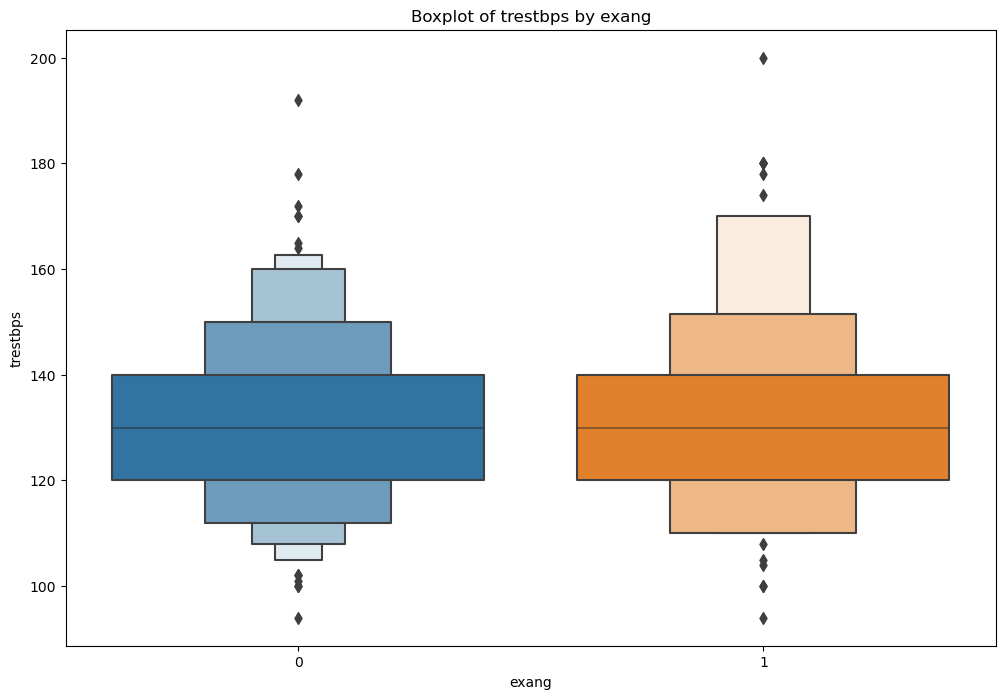

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


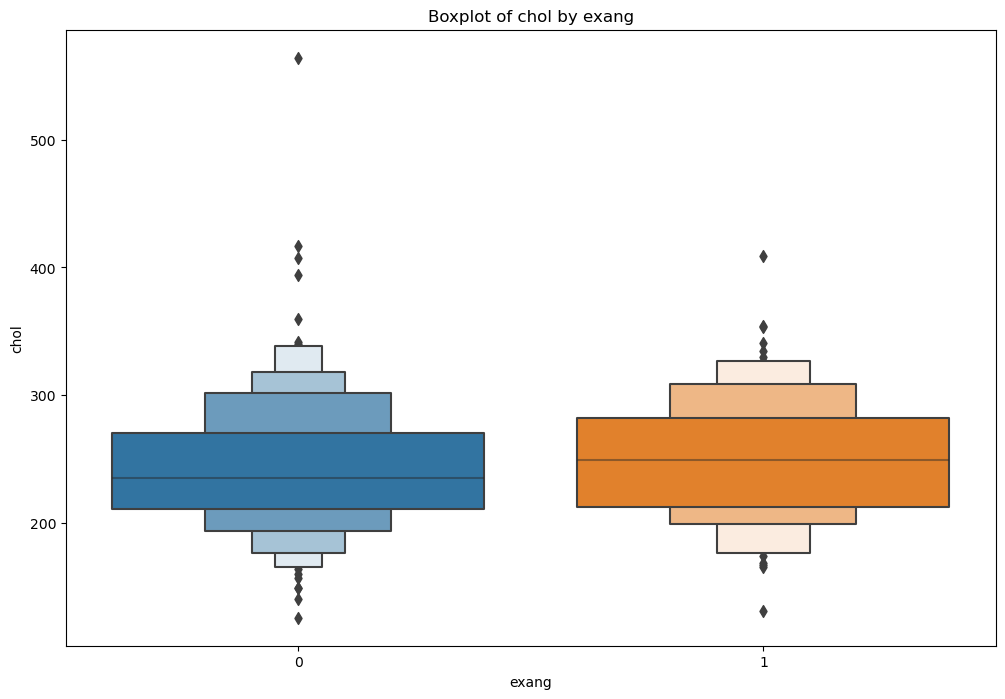

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


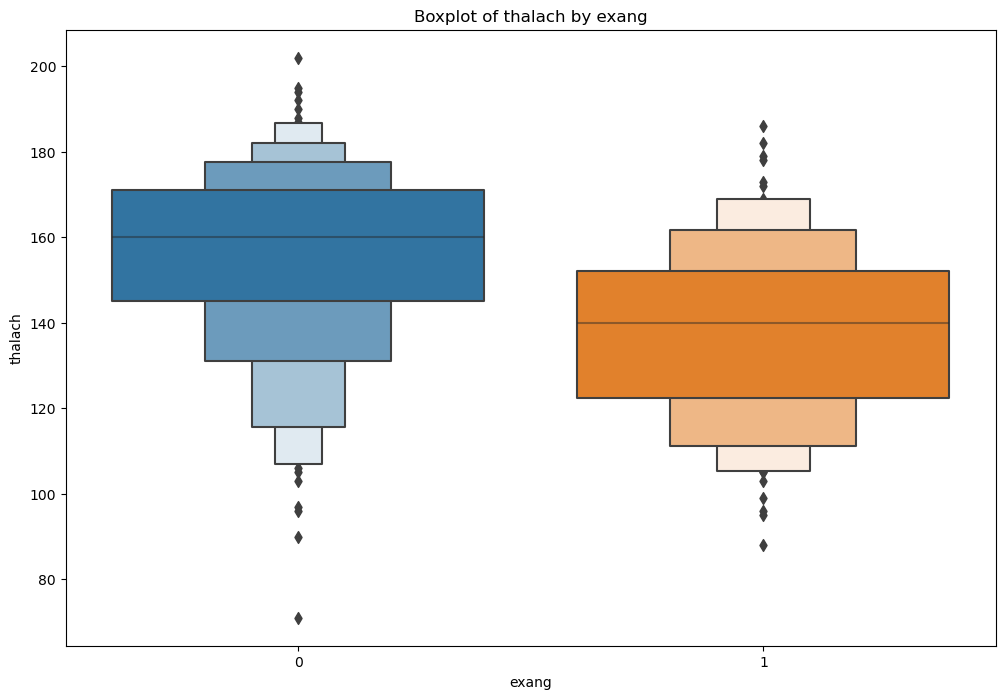

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


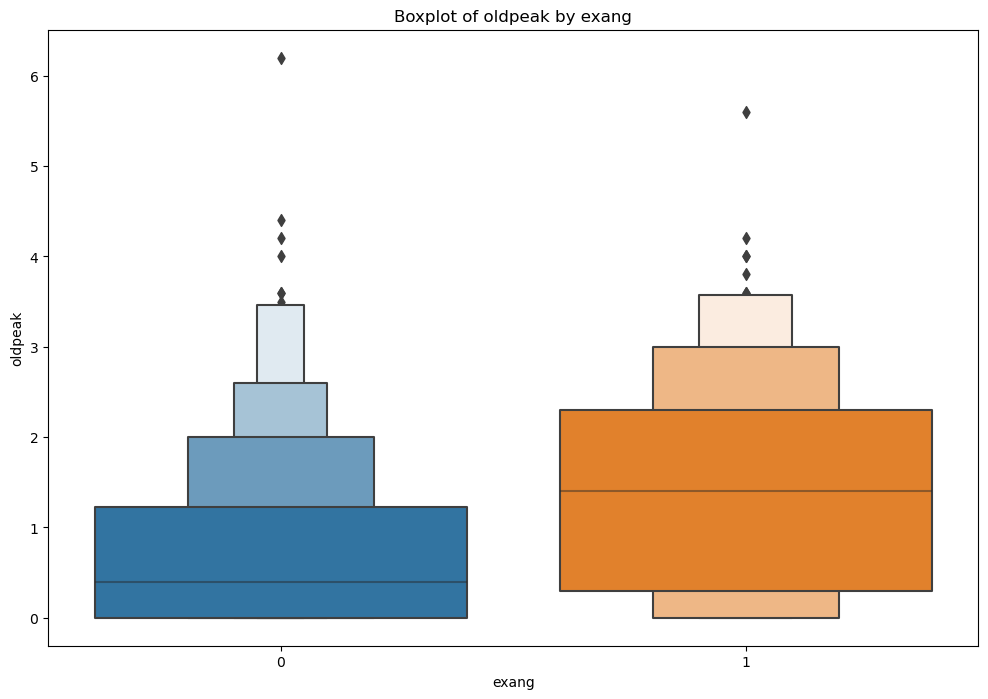

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


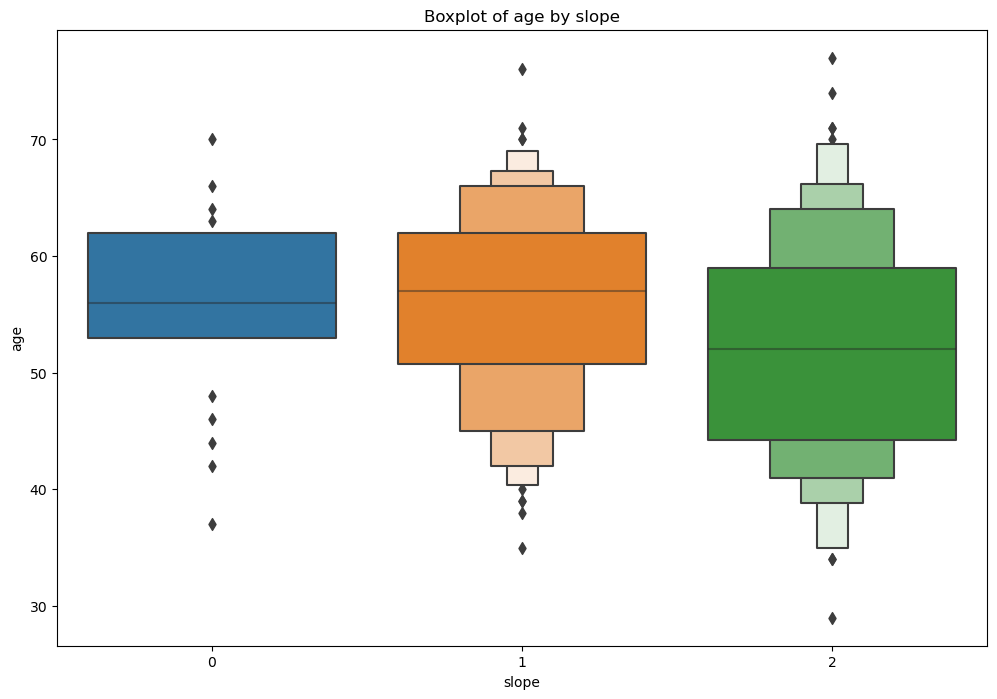

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


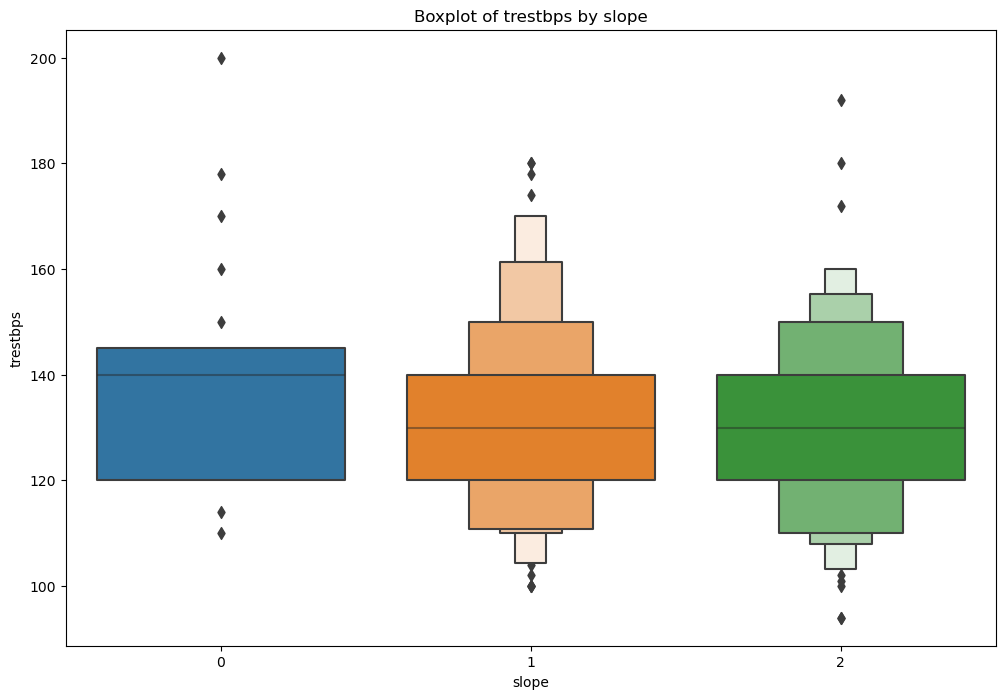

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


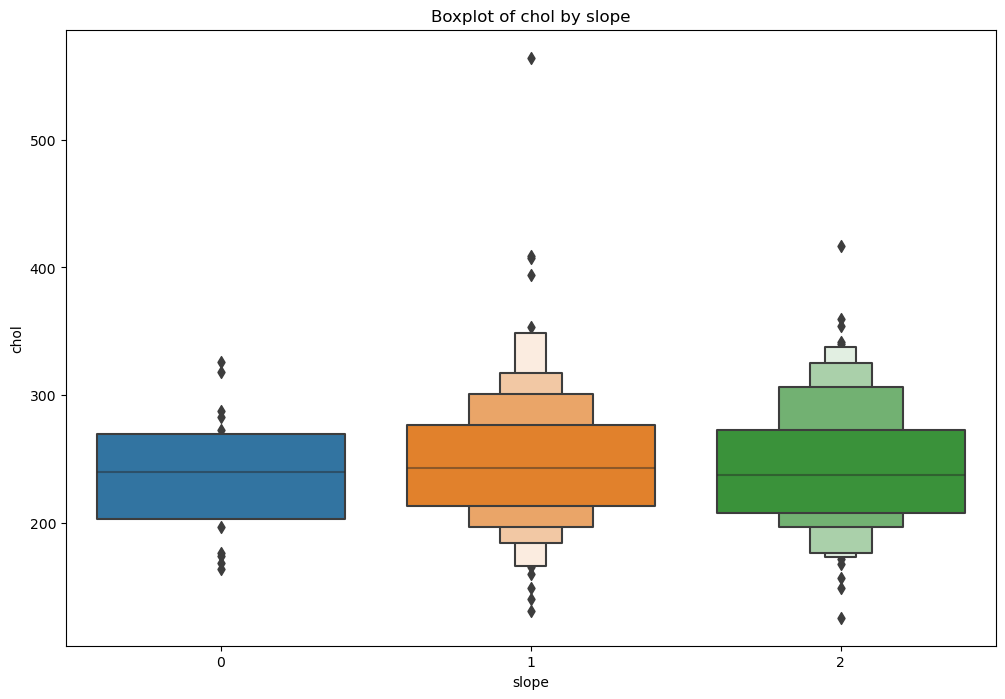

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


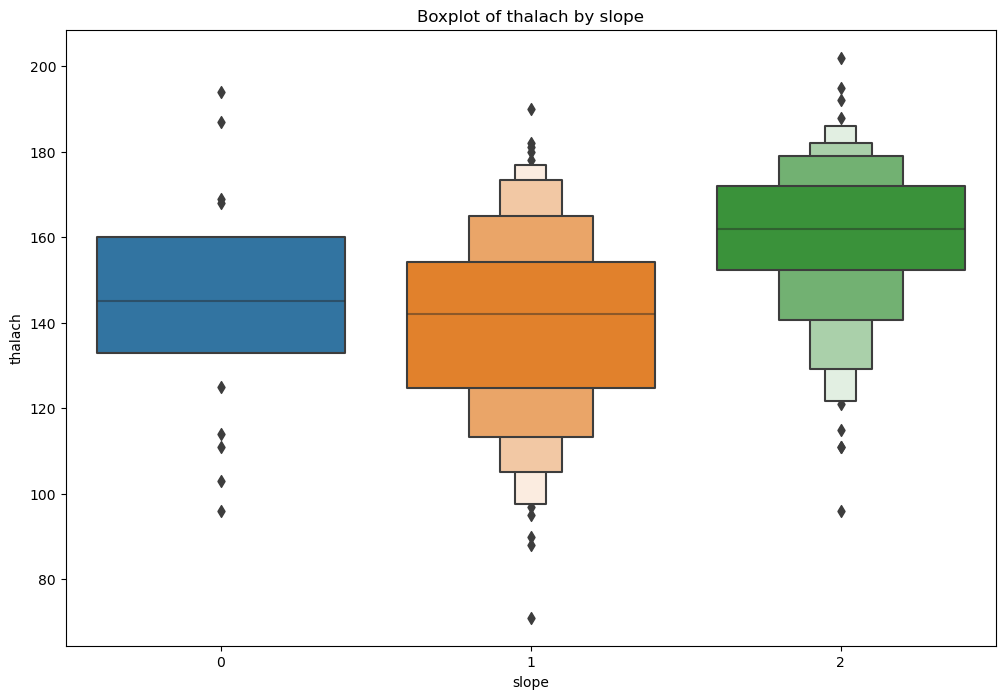

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


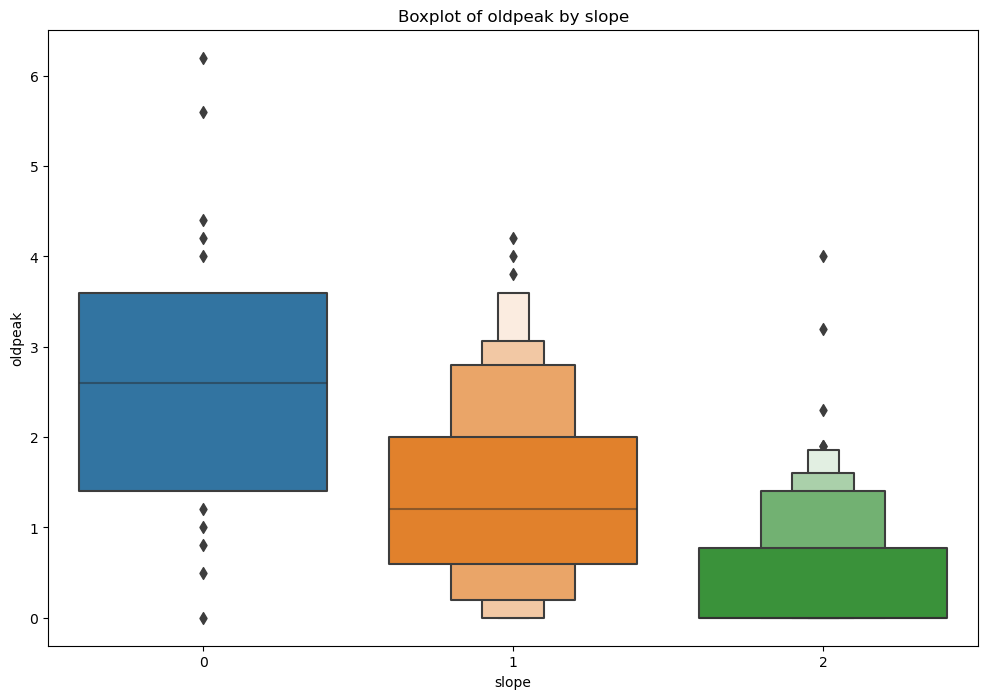

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

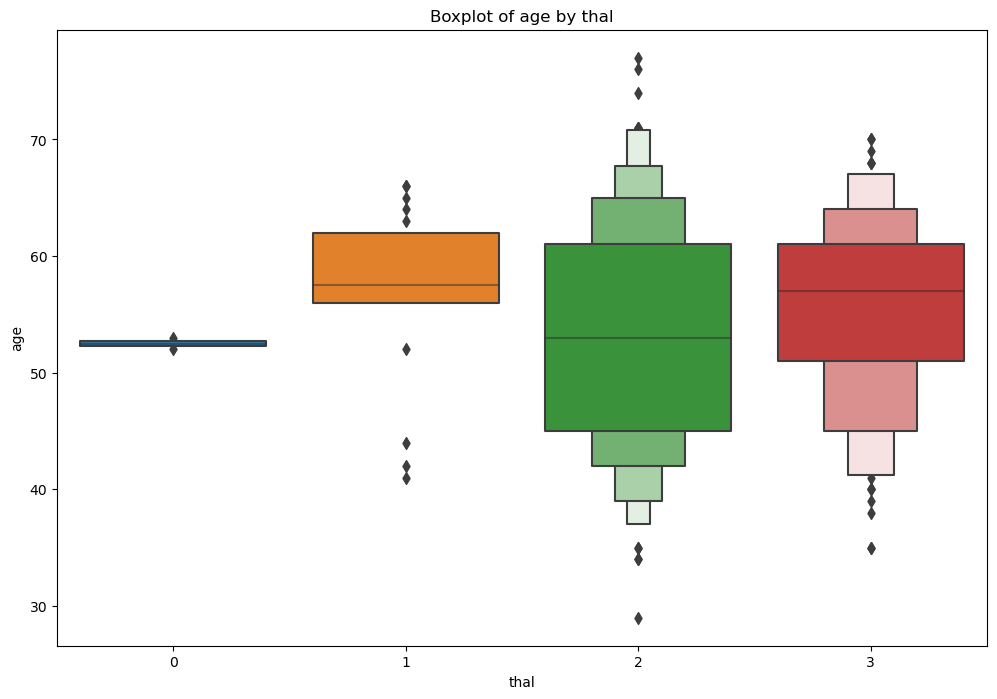

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

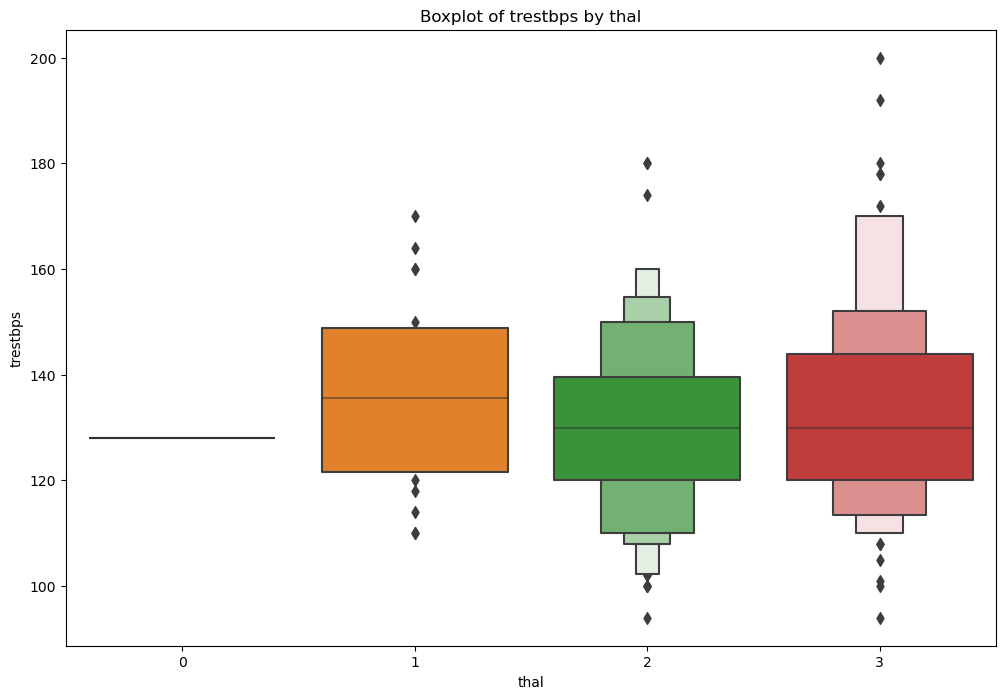

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

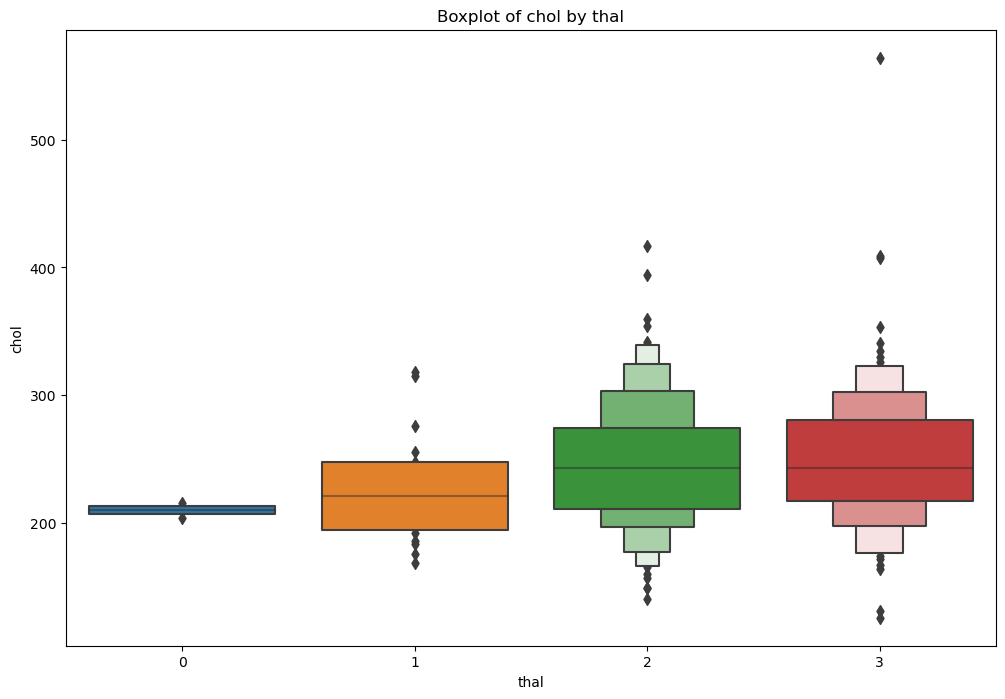

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

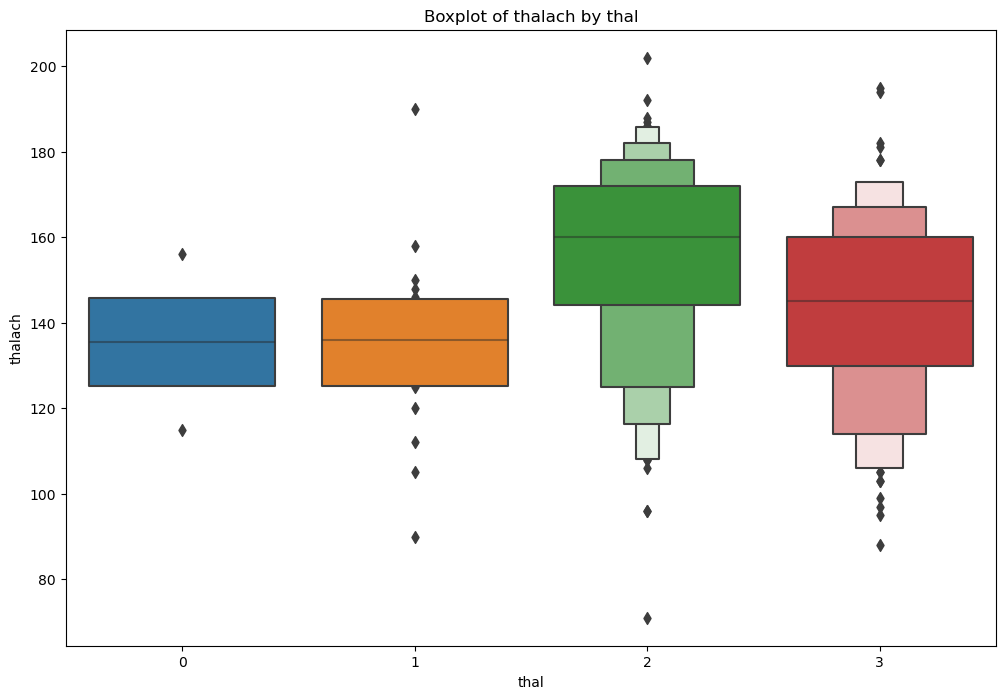

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

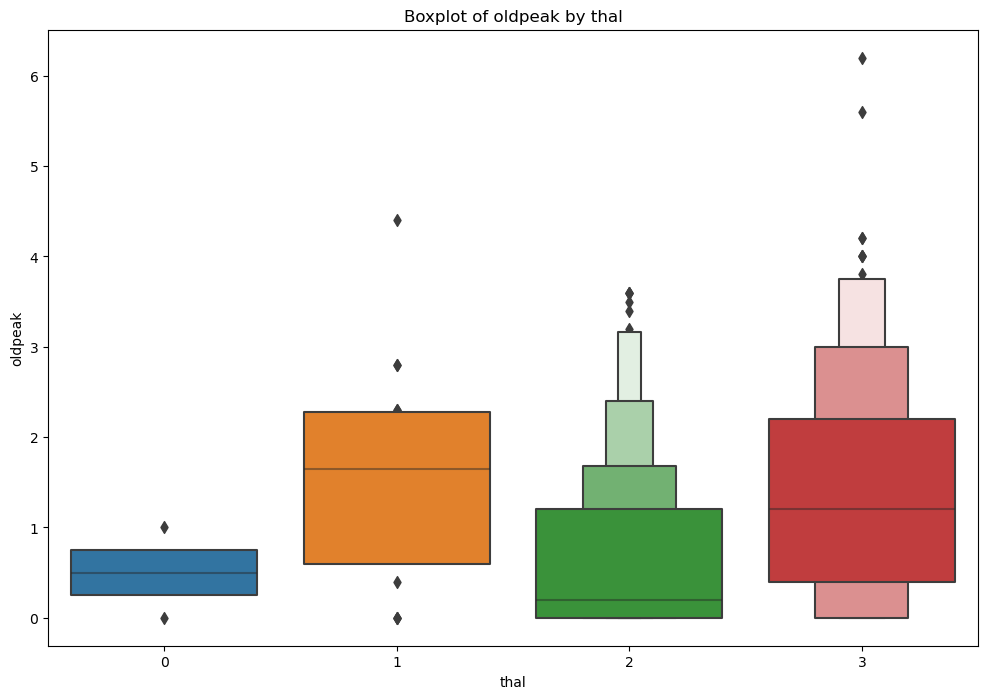

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

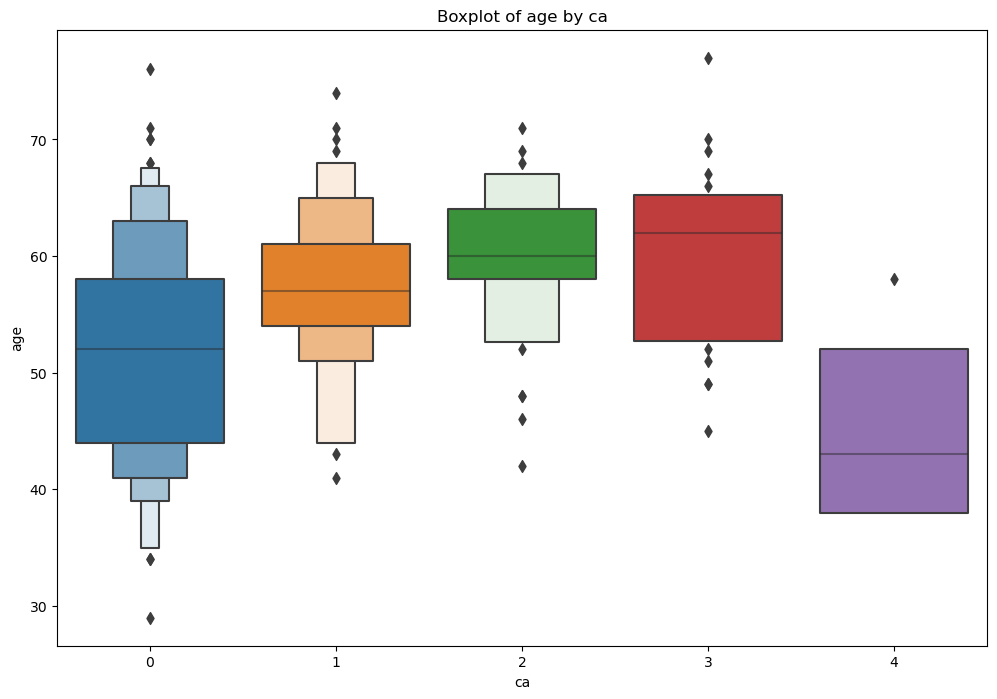

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

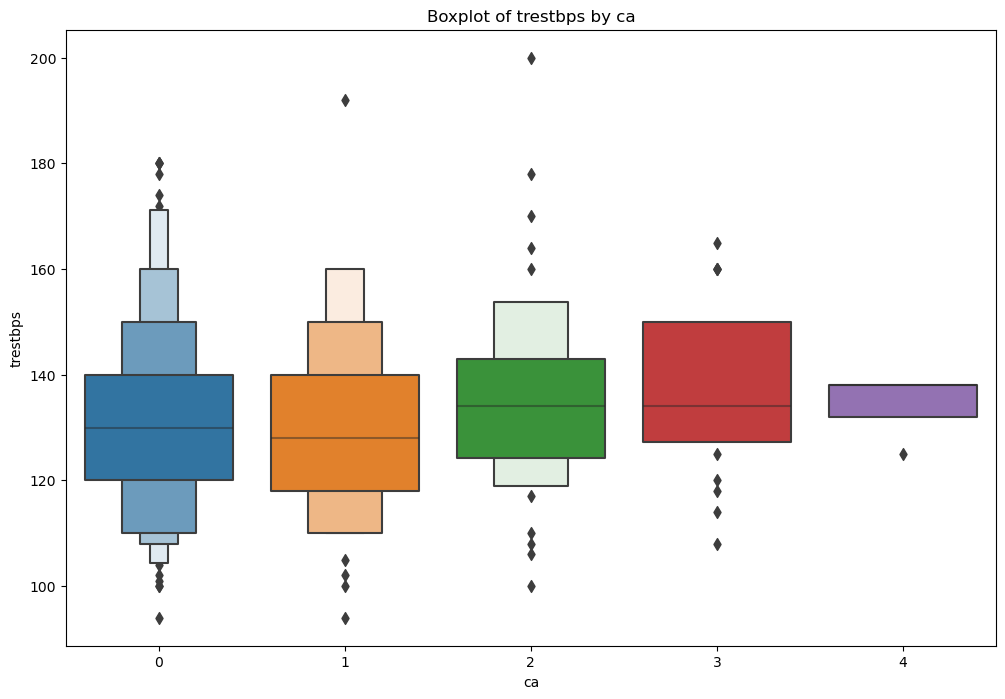

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

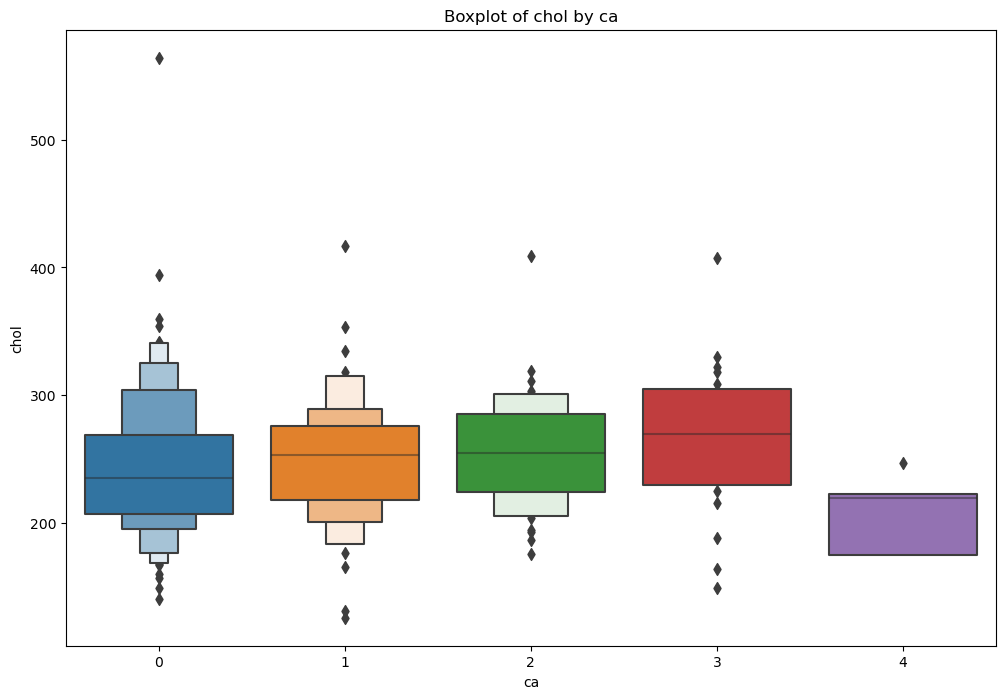

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

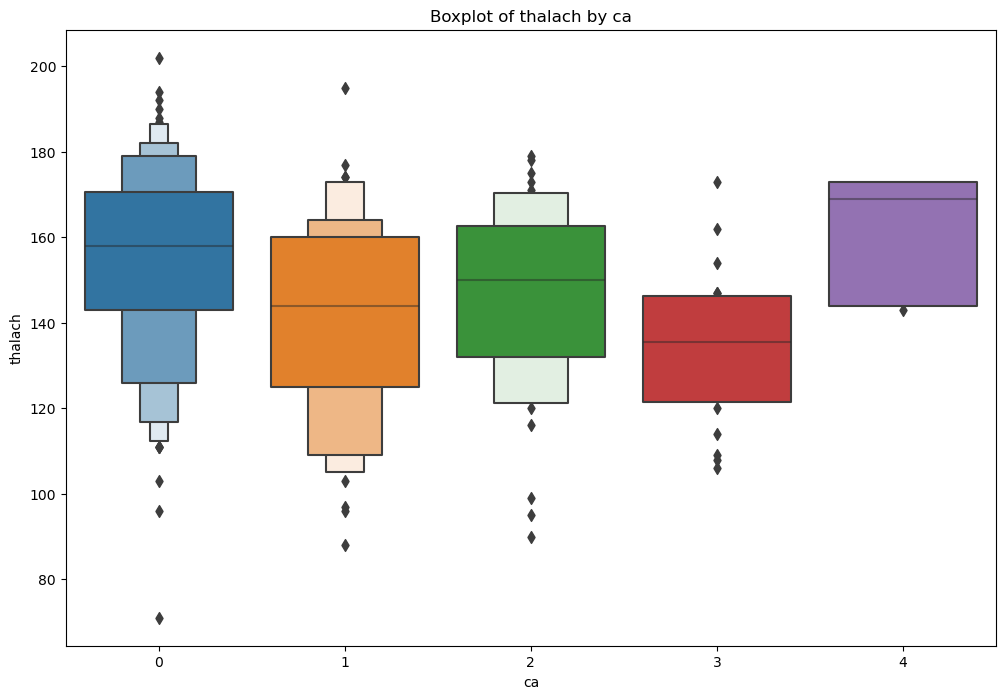

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

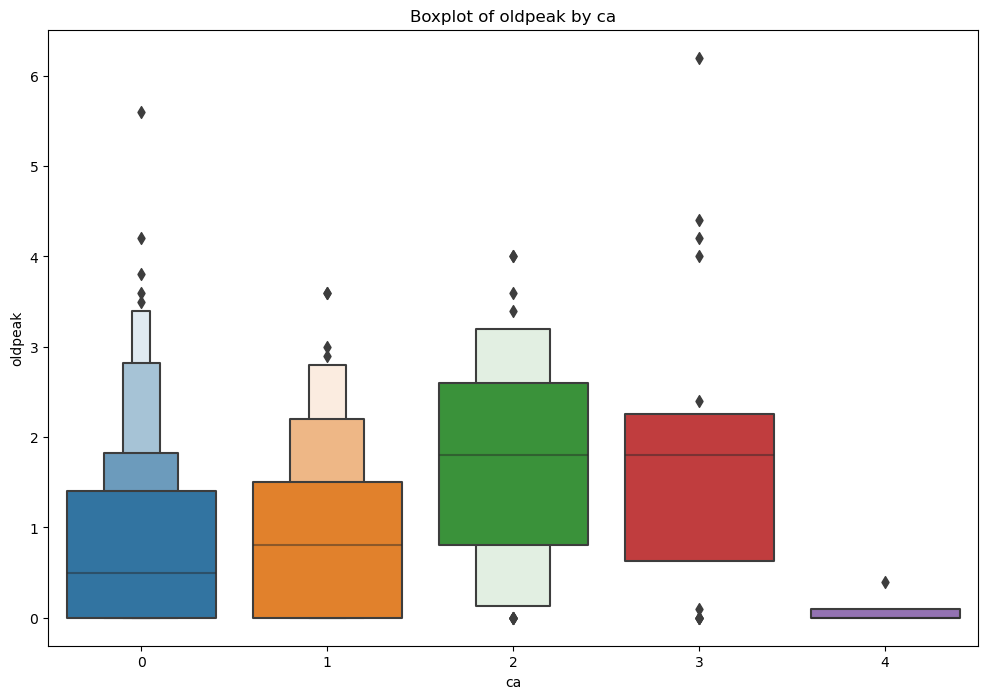

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


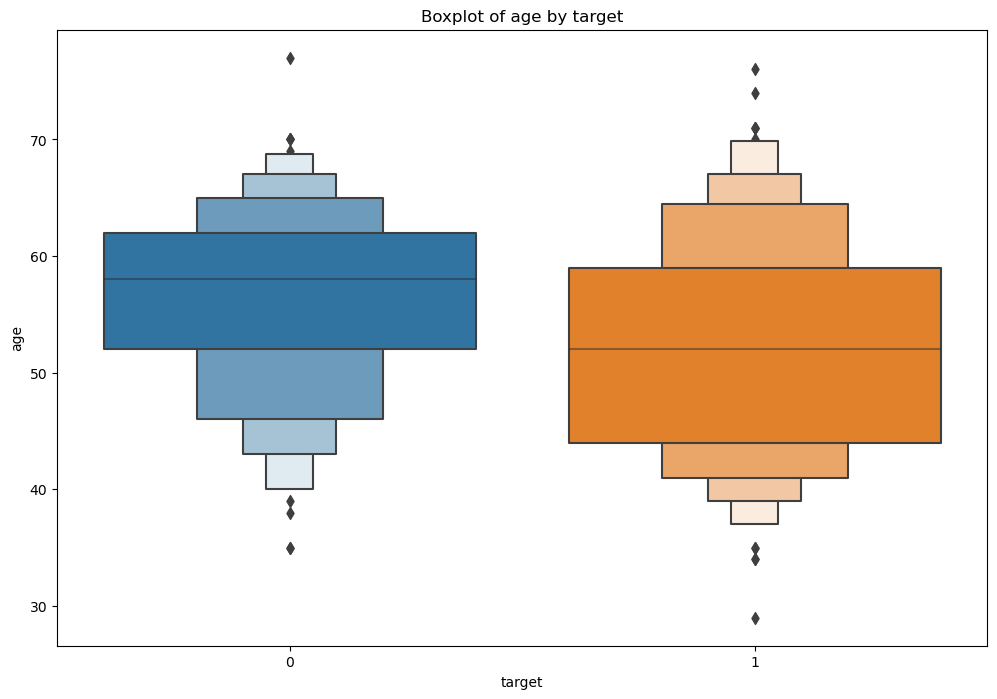

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


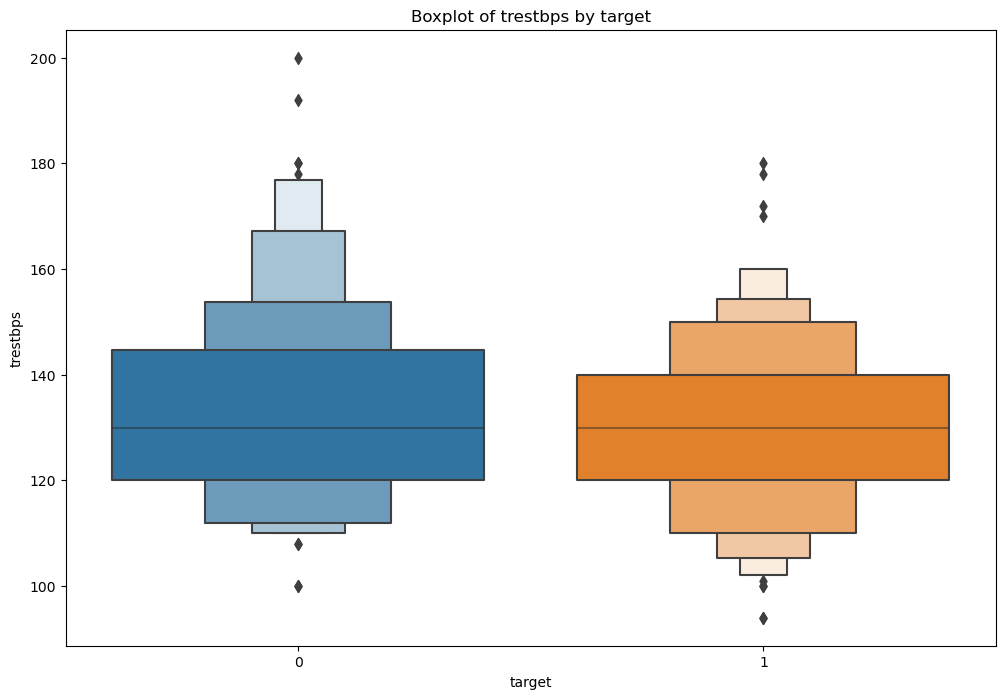

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


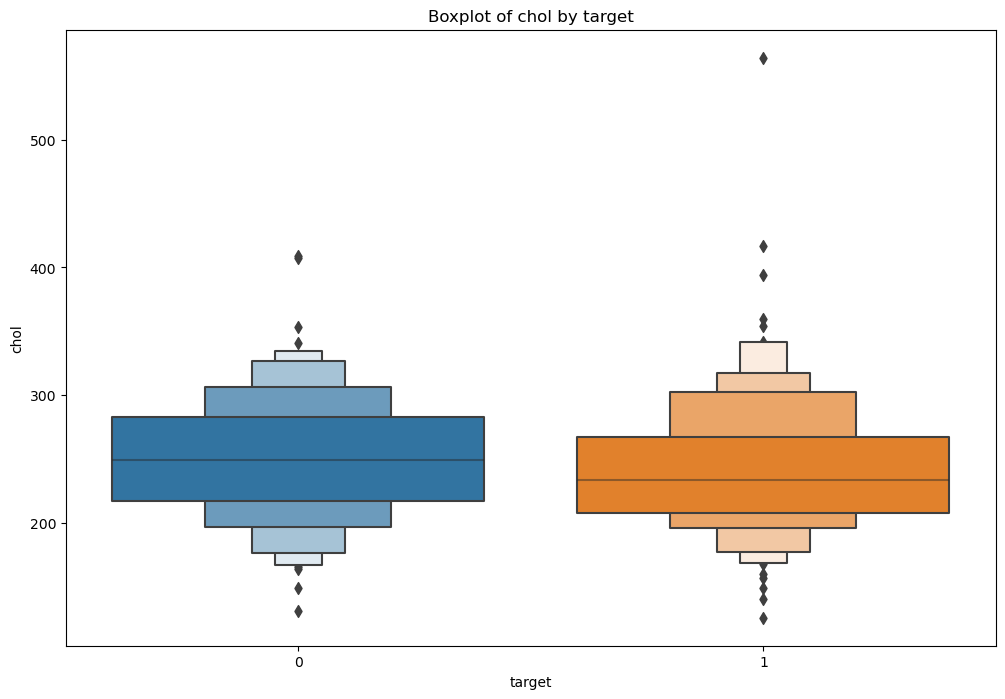

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


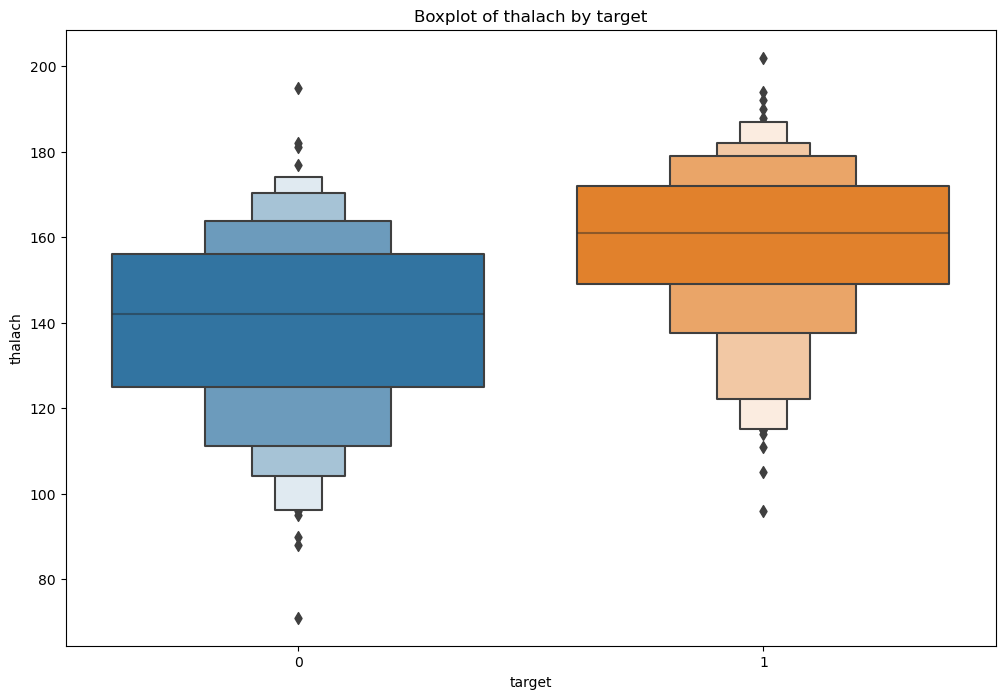

d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


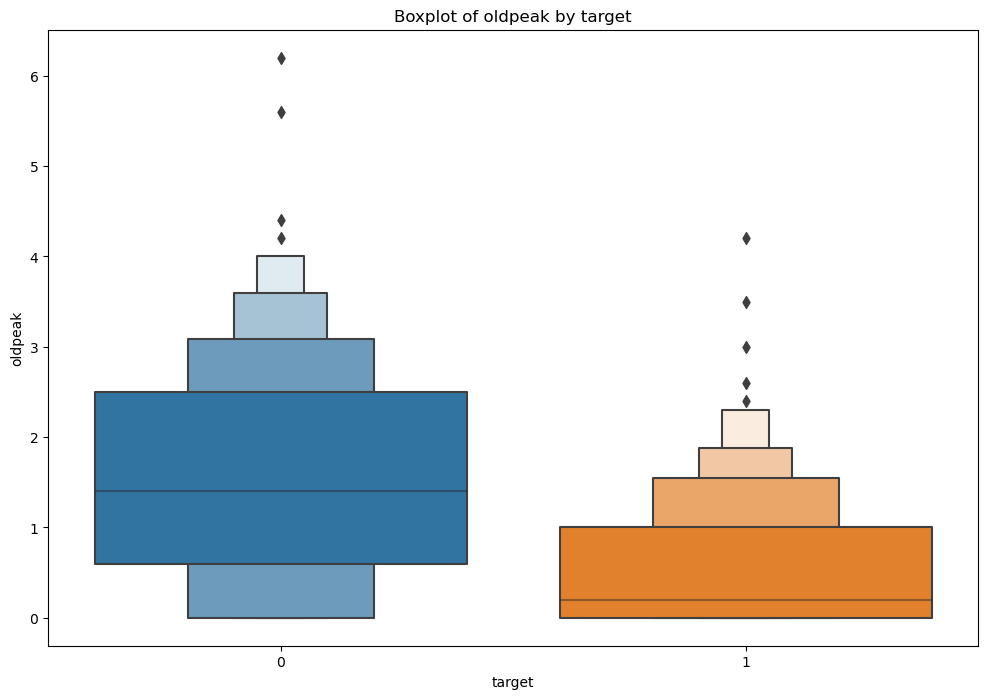

In [18]:
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal','ca', 'target']
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for cate_var in categorical_vars:
    for num_var in numerical_vars:
        plt.figure(figsize=(12, 8))
        sns.boxenplot(data=data, x=cate_var, y=num_var)
        plt.title(f'Boxplot of {num_var} by {cate_var}')
        plt.show()


## show correlation variable

### calculate Correlation

In [19]:
correlations = {}
correlations_all_variable = {}
numerical_vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for var1, values1 in data.items():
    for var2, values2 in data.items():
        if var1 != var2:
            correlations_all_variable[(var1, var2)] = np.corrcoef(values1, values2)[0, 1]
        if var1 != var2 and var1 in numerical_vars and var2 in numerical_vars:
            correlations[(var1, var2)] = np.corrcoef(values1, values2)[0, 1]
# Print the correlation coefficients
print("Correlation coefficients:")
for (var1, var2), correlation in correlations.items():
    print(f"{var1} vs. {var2}: {correlation:.2f}")

Correlation coefficients:
age vs. trestbps: 0.28
age vs. chol: 0.21
age vs. thalach: -0.40
age vs. oldpeak: 0.21
trestbps vs. age: 0.28
trestbps vs. chol: 0.12
trestbps vs. thalach: -0.05
trestbps vs. oldpeak: 0.19
chol vs. age: 0.21
chol vs. trestbps: 0.12
chol vs. thalach: -0.01
chol vs. oldpeak: 0.05
thalach vs. age: -0.40
thalach vs. trestbps: -0.05
thalach vs. chol: -0.01
thalach vs. oldpeak: -0.34
oldpeak vs. age: 0.21
oldpeak vs. trestbps: 0.19
oldpeak vs. chol: 0.05
oldpeak vs. thalach: -0.34


### show Correlation in Plot

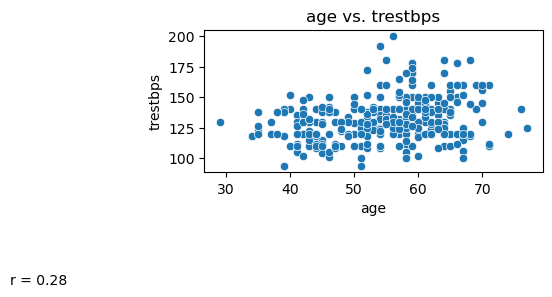

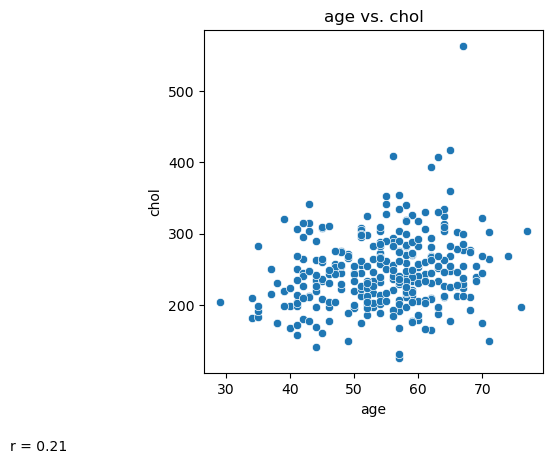

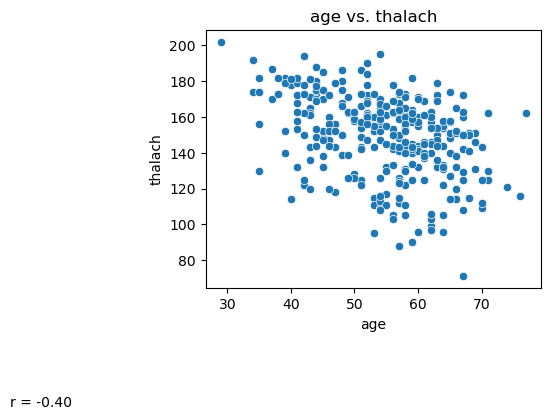

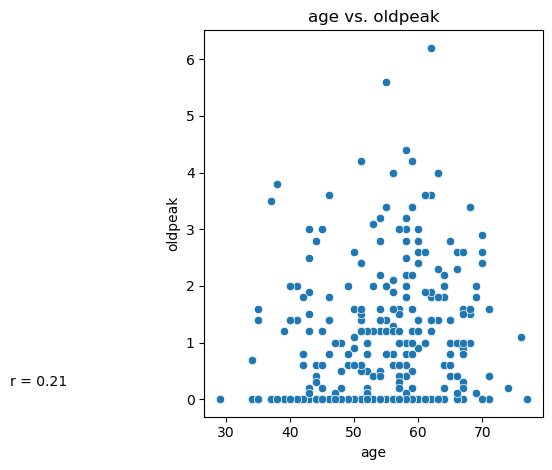

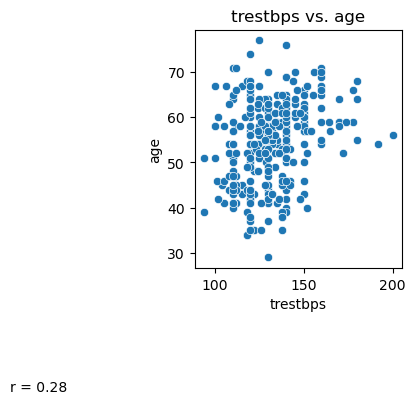

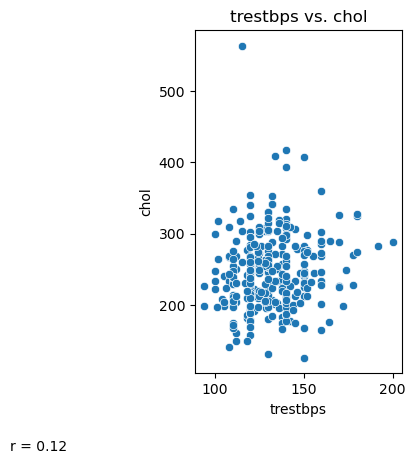

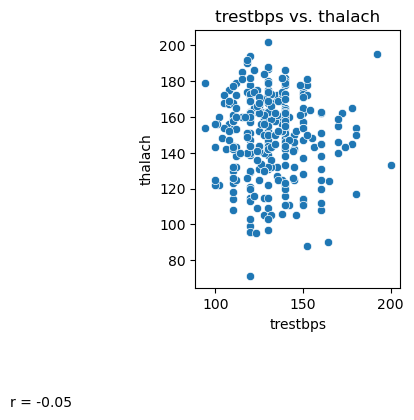

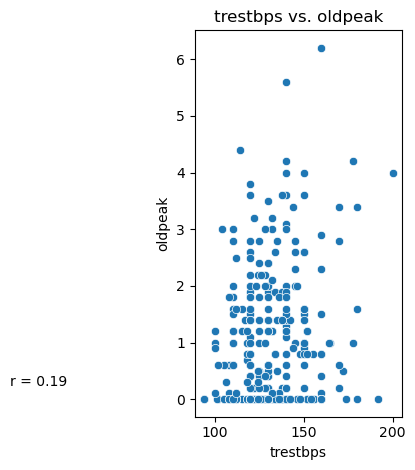

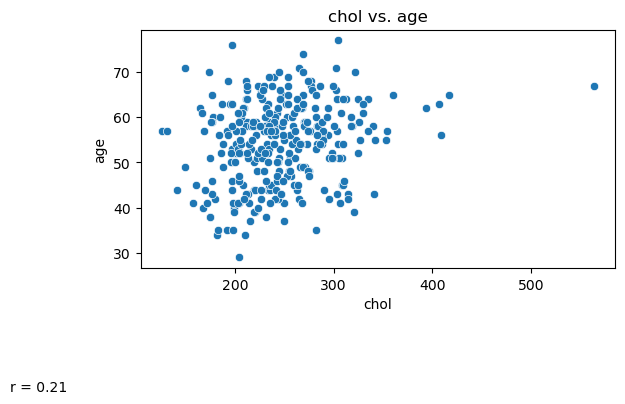

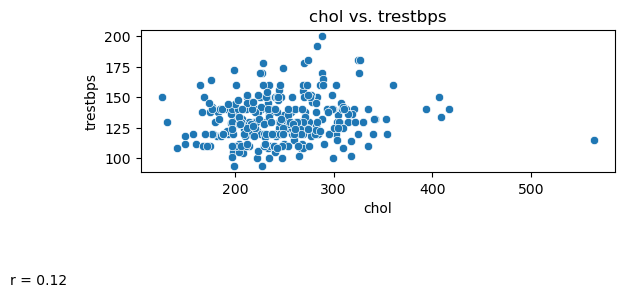

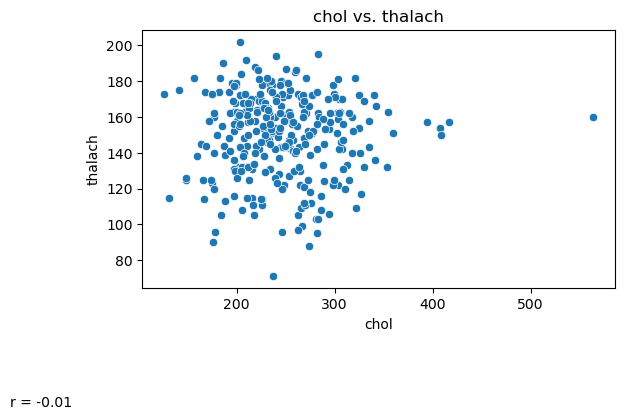

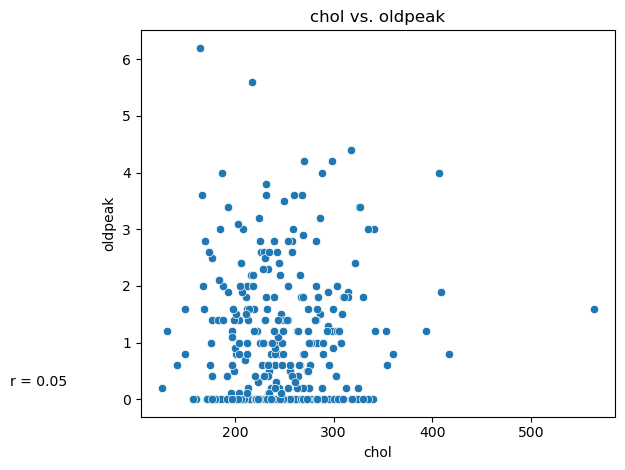

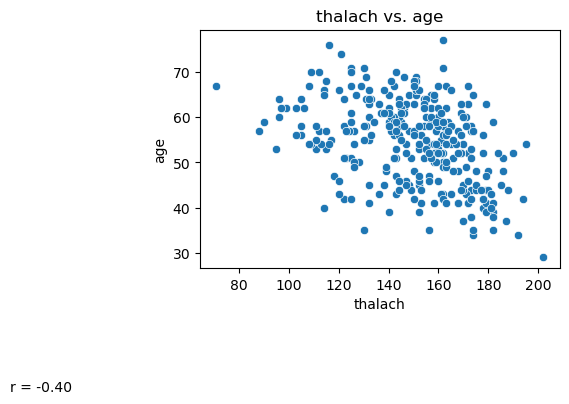

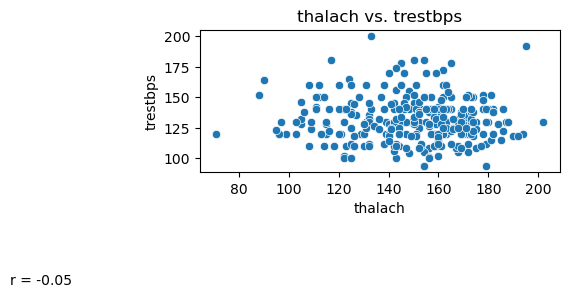

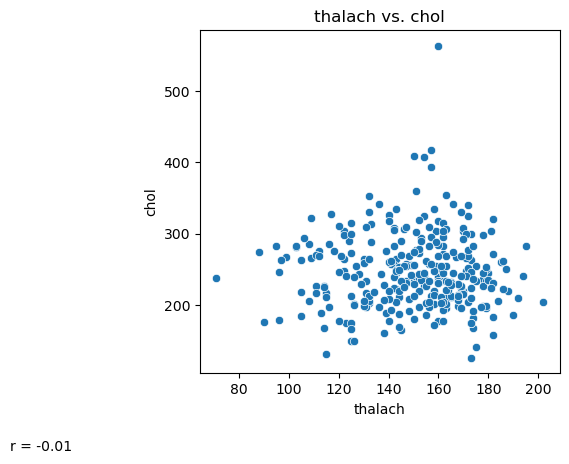

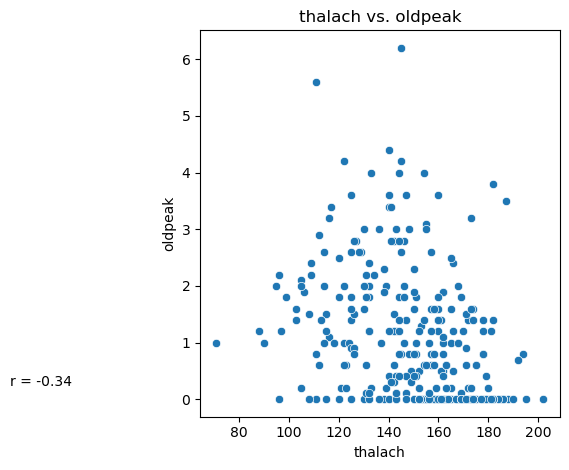

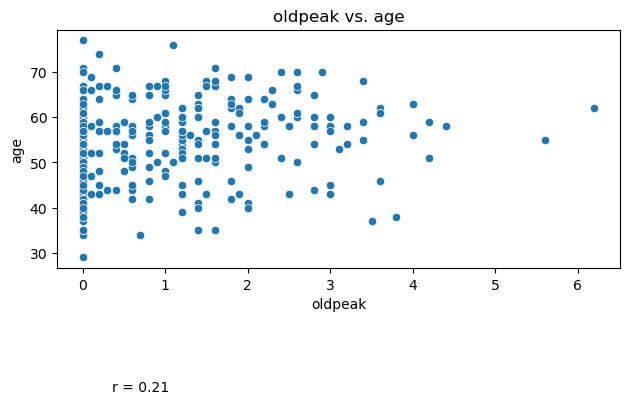

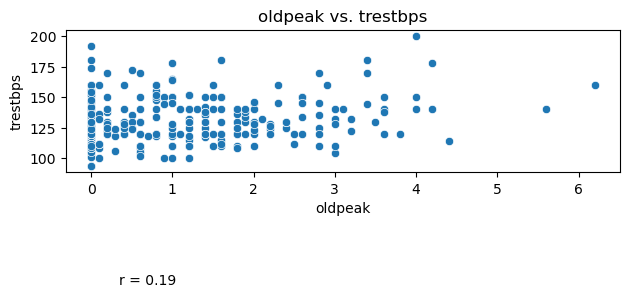

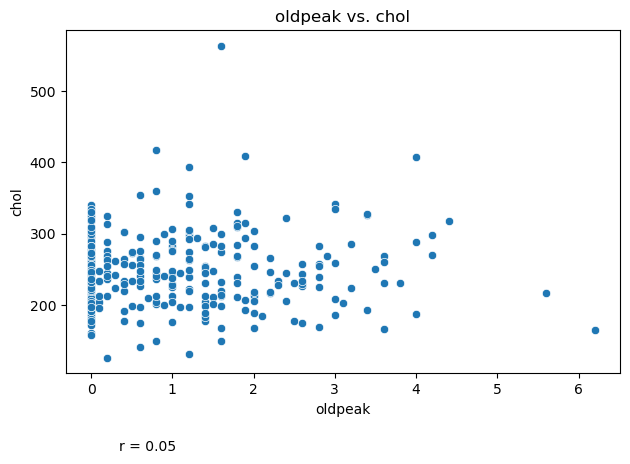

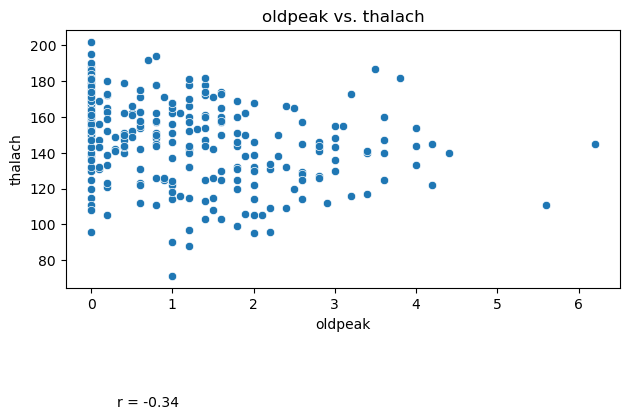

In [20]:
# Plot the scatter plots with correlation coefficients
for (var1, var2), correlation in correlations.items():
    sns.scatterplot(x=data[var1],y=data[var2])
    plt.title(f"{var1} vs. {var2}")
    plt.text(0.7, 0.3, f"r = {correlations[var1, var2]:.2f}", ha="center", va="center", fontsize=10)
    plt.tight_layout()
    plt.show()
   


### deifine a function to determin depend variables and show depend variables

In [21]:
def is_dependent(correlation):
    """
    Determines if a variable is dependent based on the correlation coefficient.

    Args:
        correlation (float): The correlation coefficient between two variables.

    Returns:
        str: "Dependent" if the correlation is strong, "Independent" otherwise.
    """
    absolute_correlation = abs(correlation)
    if absolute_correlation >= 0.8:
        return "Dependent"
    elif absolute_correlation >= 0.5:
        return "Weakly Dependent"
    else:
        return "Independent"

for (var1, var2), correlation in correlations.items():
    print(var1," and ",var2, " is ", is_dependent(correlation))

age  and  trestbps  is  Independent
age  and  chol  is  Independent
age  and  thalach  is  Independent
age  and  oldpeak  is  Independent
trestbps  and  age  is  Independent
trestbps  and  chol  is  Independent
trestbps  and  thalach  is  Independent
trestbps  and  oldpeak  is  Independent
chol  and  age  is  Independent
chol  and  trestbps  is  Independent
chol  and  thalach  is  Independent
chol  and  oldpeak  is  Independent
thalach  and  age  is  Independent
thalach  and  trestbps  is  Independent
thalach  and  chol  is  Independent
thalach  and  oldpeak  is  Independent
oldpeak  and  age  is  Independent
oldpeak  and  trestbps  is  Independent
oldpeak  and  chol  is  Independent
oldpeak  and  thalach  is  Independent


# Parametric inference methods

## parametric inference methods

### T-Test implementation

In [22]:
# List of continuous variables
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Function to perform t-test and return results
def perform_ttest(df, variable):
    group1 = df[df['target'] == 1][variable]
    group0 = df[df['target'] == 0][variable]
    t_stat, p_value = stats.ttest_ind(group1, group0)
    mean1 = group1.mean()
    mean0 = group0.mean()
    return variable, t_stat, p_value, mean1, mean0

In [23]:
# Perform t-tests for all continuous variables
results = []
for var in continuous_vars:
    results.append(perform_ttest(data, var))

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=['Variable', 'T-statistic', 'P-value', 'Mean (Disease)', 'Mean (No Disease)'])
results_df = results_df.sort_values('P-value')

# Display the results
pd.set_option('display.float_format', '{:.4f}'.format)
print(results_df)

   Variable  T-statistic  P-value  Mean (Disease)  Mean (No Disease)
4   oldpeak      -8.2796   0.0000          0.5830             1.5855
3   thalach       8.0697   0.0000        158.4667           139.1014
0       age      -4.0146   0.0001         52.4970            56.6014
1  trestbps      -2.5413   0.0115        129.3030           134.3986
2      chol      -1.4842   0.1388        242.2303           251.0870


### ANOVA Implementation

In [24]:
# List of continuous variables
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# List of categorical variables with more than two categories
categorical_vars = ['cp', 'restecg', 'slope', 'ca', 'thal']

# Function to perform ANOVA and return results
def perform_anova(df, cont_var, cat_var):
    groups = [group for _, group in df.groupby(cat_var)[cont_var]]
    f_value, p_value = stats.f_oneway(*groups)
    return cont_var, cat_var, f_value, p_value


In [25]:
# Perform ANOVA for all combinations of continuous and categorical variables
results = []
for cont_var in continuous_vars:
    for cat_var in categorical_vars:
        results.append(perform_anova(data, cont_var, cat_var))

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=['Continuous Variable', 'Categorical Variable', 'F-statistic', 'P-value'])
results_df = results_df.sort_values('P-value')

# Display the results
pd.set_option('display.float_format', '{:.4f}'.format)
print(results_df)

   Continuous Variable Categorical Variable  F-statistic  P-value
22             oldpeak                slope      75.7780   0.0000
17             thalach                slope      38.5303   0.0000
3                  age                   ca      14.3413   0.0000
15             thalach                   cp      17.8180   0.0000
20             oldpeak                   cp      14.2731   0.0000
24             oldpeak                 thal      13.5595   0.0000
23             oldpeak                   ca       8.6307   0.0000
19             thalach                 thal      10.3784   0.0000
18             thalach                   ca       7.9834   0.0000
21             oldpeak              restecg       6.6791   0.0015
2                  age                slope       5.8387   0.0033
11                chol              restecg       4.7385   0.0094
1                  age              restecg       4.6746   0.0100
0                  age                   cp       3.3840   0.0186
6         

### Chi-Square Test Implementation

In [26]:
# List of categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Function to perform Chi-Square test and return results
def perform_chi_square(df, var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return var1, var2, chi2, p_value, dof


In [27]:
# Perform Chi-Square tests for all combinations of categorical variables
results = []
for i, var1 in enumerate(categorical_vars):
    for var2 in categorical_vars[i+1:]:
        results.append(perform_chi_square(data, var1, var2))

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Chi-Square Statistic', 'P-value', 'Degrees of Freedom'])
results_df = results_df.sort_values('P-value')

# Display the results
pd.set_option('display.float_format', '{:.4f}'.format)
print(results_df)

   Variable 1 Variable 2  Chi-Square Statistic  P-value  Degrees of Freedom
35       thal     target               85.3037   0.0000                   3
14         cp     target               81.6864   0.0000                   3
34         ca     target               74.3666   0.0000                   4
10         cp      exang               67.3483   0.0000                   3
29      exang     target               55.9445   0.0000                   1
32      slope     target               47.5069   0.0000                   2
6         sex       thal               44.6256   0.0000                   3
28      exang       thal               32.9592   0.0000                   3
7         sex     target               22.7172   0.0000                   1
13         cp       thal               41.8922   0.0000                   9
26      exang      slope               25.1312   0.0000                   2
31      slope       thal               35.2832   0.0000                   6
11         c

### Correlation

In [28]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Display the correlation matrix
pd.set_option('display.float_format', '{:.2f}'.format)
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           age   sex    cp  trestbps  chol   fbs  restecg  thalach  exang  \
age       1.00 -0.10 -0.07      0.28  0.21  0.12    -0.12    -0.40   0.10   
sex      -0.10  1.00 -0.05     -0.06 -0.20  0.05    -0.06    -0.04   0.14   
cp       -0.07 -0.05  1.00      0.05 -0.08  0.09     0.04     0.30  -0.39   
trestbps  0.28 -0.06  0.05      1.00  0.12  0.18    -0.11    -0.05   0.07   
chol      0.21 -0.20 -0.08      0.12  1.00  0.01    -0.15    -0.01   0.07   
fbs       0.12  0.05  0.09      0.18  0.01  1.00    -0.08    -0.01   0.03   
restecg  -0.12 -0.06  0.04     -0.11 -0.15 -0.08     1.00     0.04  -0.07   
thalach  -0.40 -0.04  0.30     -0.05 -0.01 -0.01     0.04     1.00  -0.38   
exang     0.10  0.14 -0.39      0.07  0.07  0.03    -0.07    -0.38   1.00   
oldpeak   0.21  0.10 -0.15      0.19  0.05  0.01    -0.06    -0.34   0.29   
slope    -0.17 -0.03  0.12     -0.12 -0.00 -0.06     0.09     0.39  -0.26   
ca        0.28  0.12 -0.18      0.10  0.07  0.14    -0.0

In [29]:
def show_heatmap(df,cmap=plt.cm.Blues, title='Correlation Heatmap of Numerical Variables'):
    cm = df.values
    classes = df.columns
    plt.figure(figsize=(12, 10))

    plt.imshow(df, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks,classes)
    thresh=cm.max()/1.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], '.2f'),
                horizontalalignment='center',
                color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel("Label")
    plt.xlabel("Label")
    plt.show()

In [30]:
def findStrongestCorrolletion(df):
    strong_correlations = (df.abs() > 0.5) & (df != 1.0)
    strong_corr_pairs = [(df.index[i], df.columns[j], df.iloc[i, j])
                        for i in range(len(df.index))
                        for j in range(i+1, len(df.columns))
                        if strong_correlations.iloc[i, j]]

    print("\nStrongest Correlations (|r| > 0.5):")
    for var1, var2, corr in sorted(strong_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"{var1} - {var2}: {corr:.2f}")


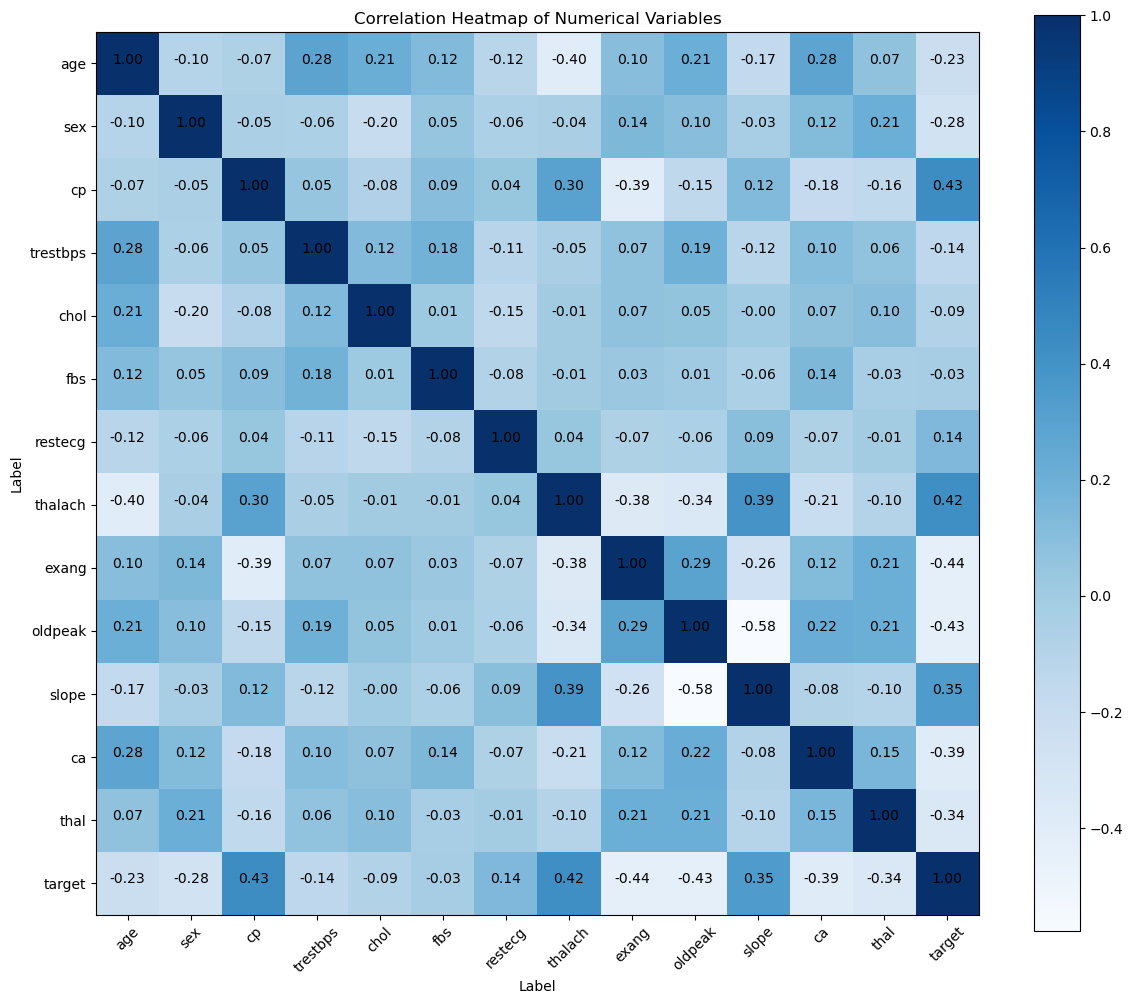


Strongest Correlations (|r| > 0.5):
oldpeak - slope: -0.58


In [31]:
# Create a heatmap of the correlation matrix


show_heatmap(correlation_matrix)

# Display the strongest correlations (absolute value > 0.5, excluding self-correlations)
findStrongestCorrolletion(correlation_matrix)

In [32]:
# Numerical variables
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'target']


In [33]:
# Function to calculate correlation and p-value
def calculate_correlation(x, y, var1,var2):
    if x.dtype in ['int64', 'float64'] and y.dtype in ['int64', 'float64']:
        # Both variables are numerical, use Pearson correlation
        corr, p_value = pearsonr(x, y)
        # print("Pearson correlation=>",var1,var2)
    else:
        # At least one variable is categorical, use Spearman correlation
        corr, p_value = spearmanr(x, y)
        print("Spearman correlation=>",var1,var2)
        
    return corr, p_value


In [34]:
# Encode categorical variables
le = LabelEncoder()
for var in categorical_vars:
    data[var] = le.fit_transform(data[var])

# Calculate correlations
variables = numerical_vars + categorical_vars
correlations = []

In [35]:
for i, var1 in enumerate(variables):
    for var2 in variables[i+1:]:
        corr, p_value = calculate_correlation(data[var1], data[var2], var1,var2)
        correlations.append((var1, var2, corr, p_value))

# Create a DataFrame with the results
results_df = pd.DataFrame(correlations, columns=['Variable 1', 'Variable 2', 'Correlation', 'P-value'])
results_df = results_df.sort_values('Correlation', key=abs, ascending=False)

In [36]:
# Display the results
pd.set_option('display.float_format', '{:.4f}'.format)
print(results_df)

   Variable 1 Variable 2  Correlation  P-value
51    oldpeak      slope      -0.5775   0.0000
84      exang     target      -0.4368   0.0000
69         cp     target       0.4338   0.0000
54    oldpeak     target      -0.4307   0.0000
45    thalach     target       0.4217   0.0000
..        ...        ...          ...      ...
78    restecg       thal      -0.0120   0.8355
25       chol    thalach      -0.0099   0.8632
39    thalach        fbs      -0.0086   0.8819
48    oldpeak        fbs       0.0057   0.9206
32       chol      slope      -0.0040   0.9442

[91 rows x 4 columns]


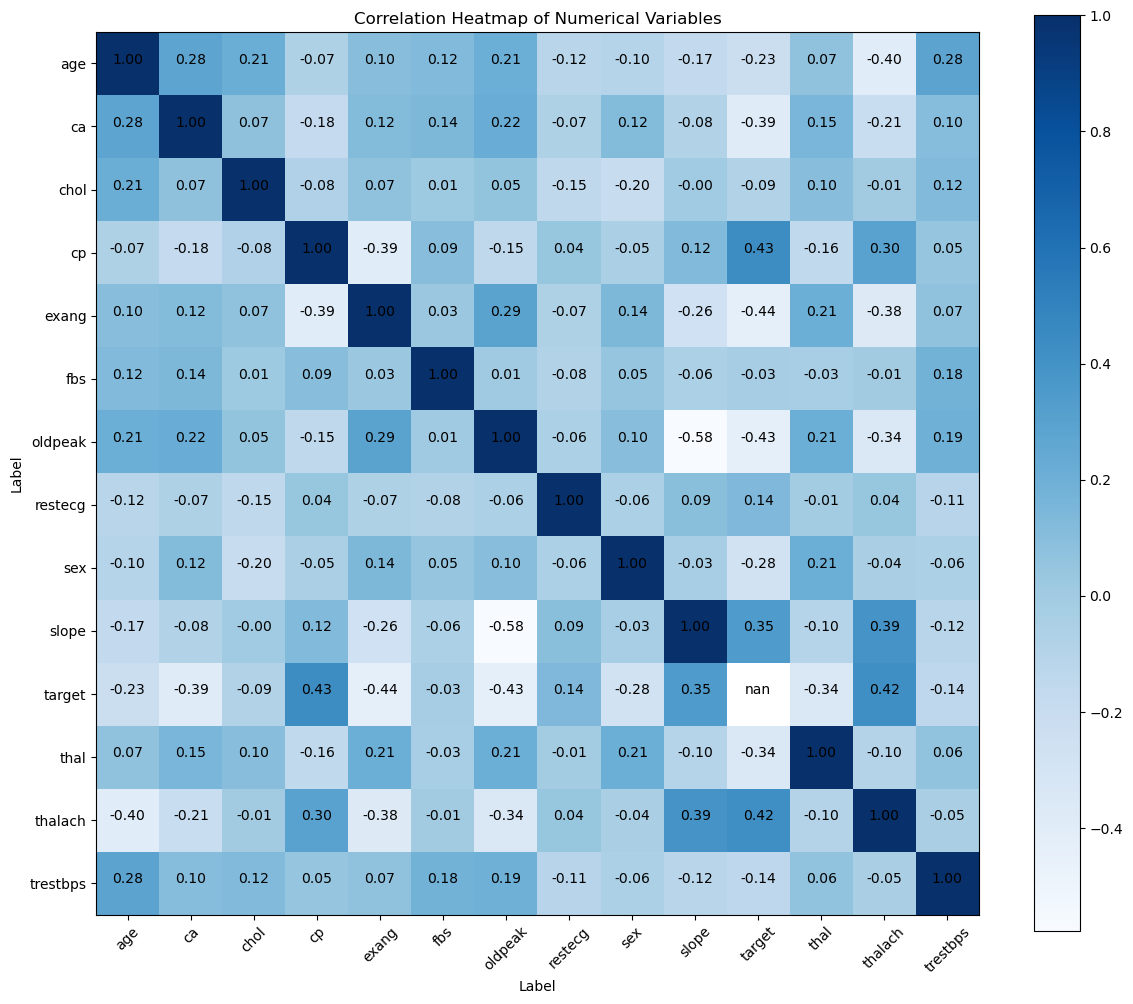


Strongest Correlations (|r| > 0.5):
oldpeak - slope: -0.58


In [37]:
# Create a pivot table from the results_df
pivot_df = results_df.pivot(index='Variable 1', columns='Variable 2', values='Correlation')

# Fill the diagonal and mirror the matrix
for var in pivot_df.index:
    pivot_df.loc[var, var] = 1.0
pivot_df = pivot_df.combine_first(pivot_df.T)

# Create the heatmap
show_heatmap(pivot_df)

findStrongestCorrolletion(pivot_df)

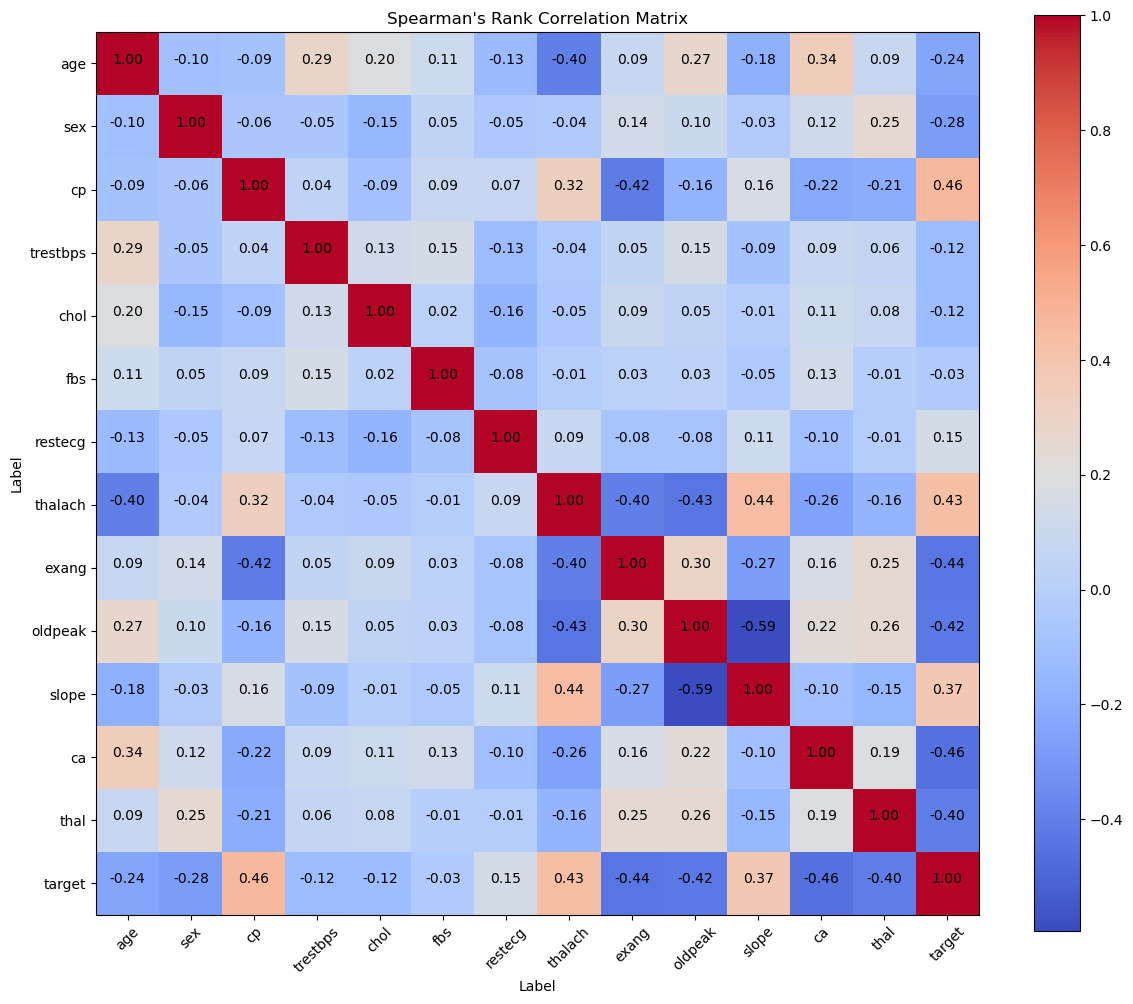


Strongest Correlations (|r| > 0.5):
oldpeak - slope: -0.59


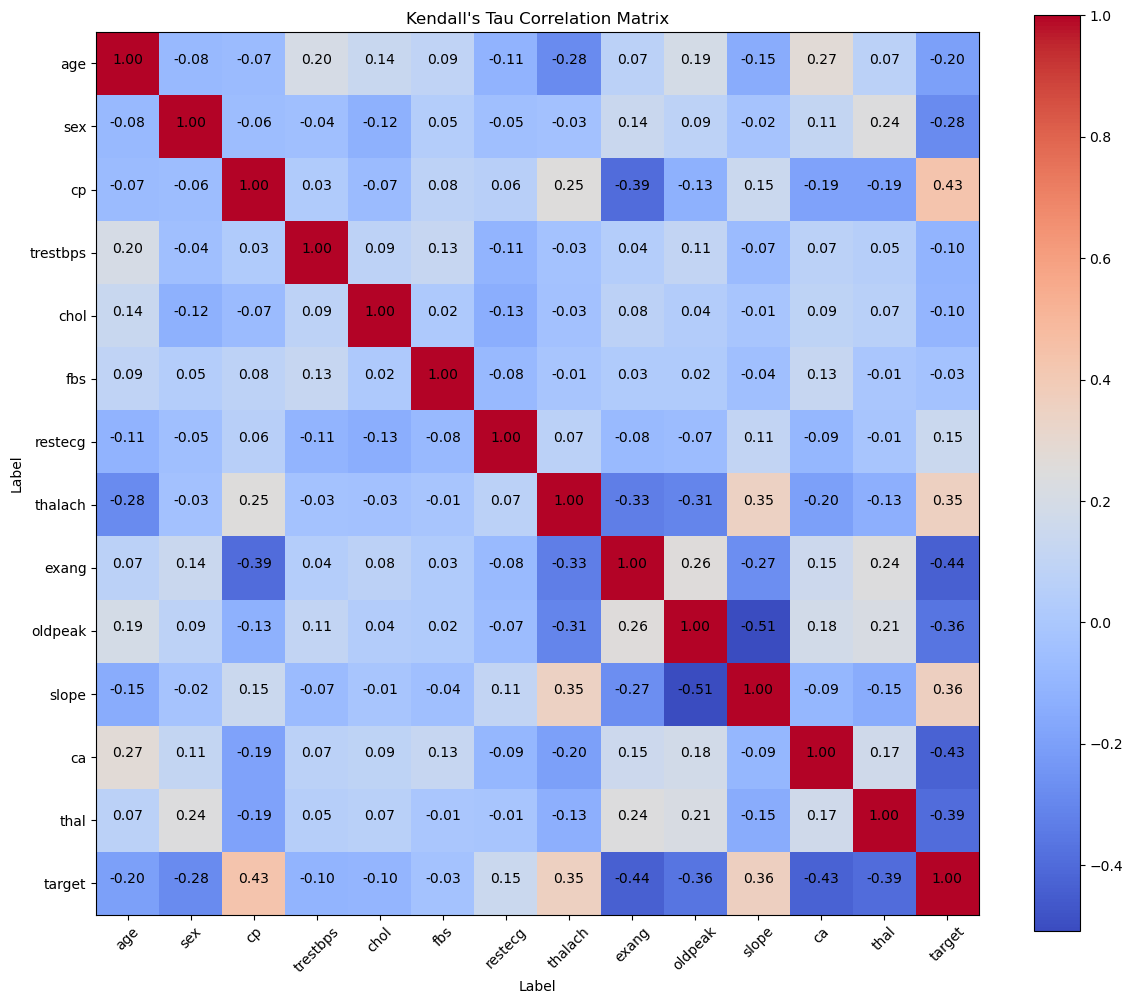


Strongest Correlations (|r| > 0.5):
oldpeak - slope: -0.51


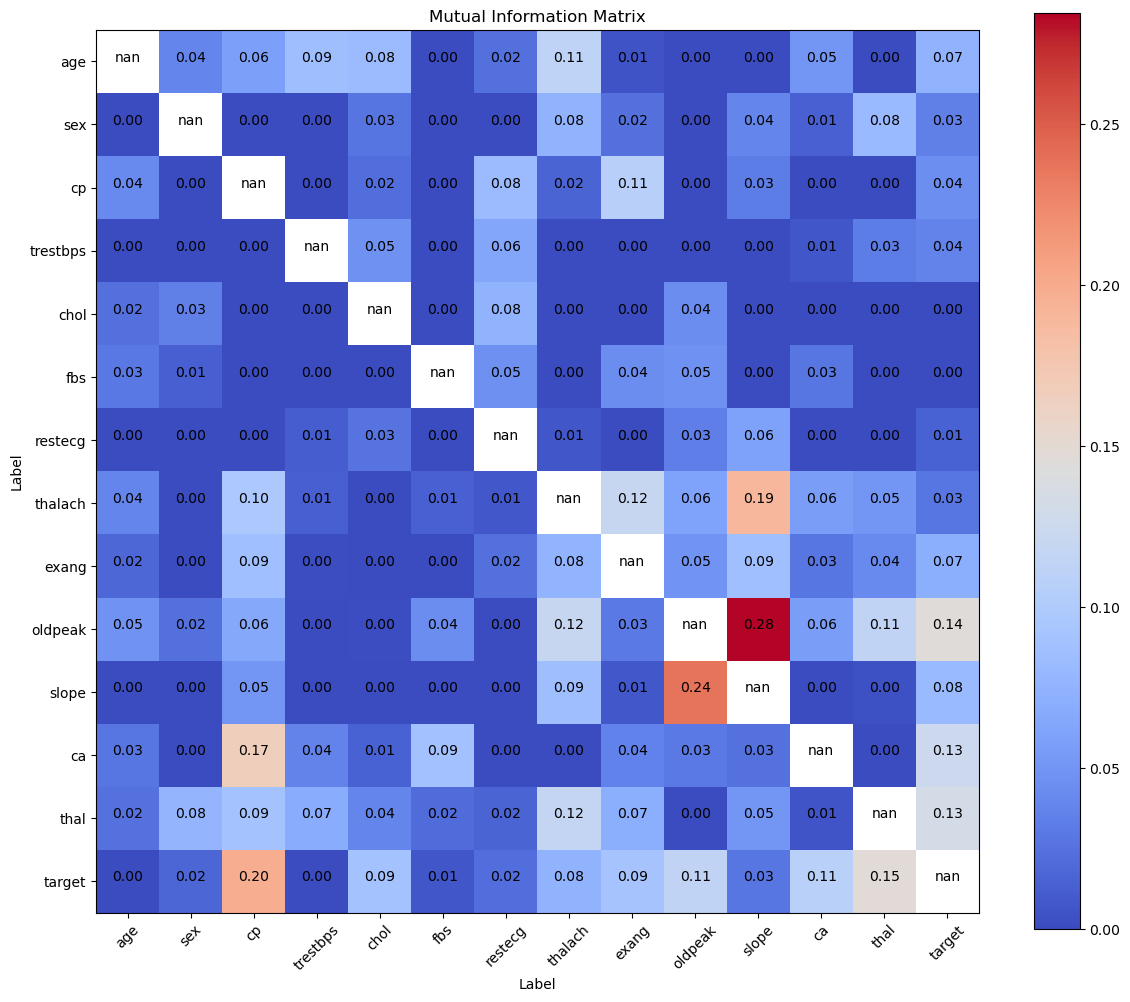


Strongest Correlations (|r| > 0.5):


In [38]:
# Spearman's Rank Correlation
spearman_corr = data.corr(method='spearman')
show_heatmap(spearman_corr,'coolwarm',"Spearman's Rank Correlation Matrix")
findStrongestCorrolletion(spearman_corr)

# # Kendall's Tau Correlation
kendall_corr = data.corr(method='kendall')
show_heatmap(kendall_corr,'coolwarm',"Kendall's Tau Correlation Matrix")
findStrongestCorrolletion(kendall_corr)

 # Mutual Information
mi = pd.DataFrame(index=data.columns, columns=data.columns)
for i in data.columns:
    for j in data.columns:
        if i != j:
            mi.loc[i, j] = mutual_info_regression(data[[i]], data[j])[0]
        else:
            mi.loc[i, j] = np.nan
mi = mi.apply(pd.to_numeric)
show_heatmap(mi,'coolwarm',"Mutual Information Matrix")
findStrongestCorrolletion(mi)


## Estimation Technique and calculate Confidenece interval

>**1.Numerical Variables:**

- For each numerical variable (age, trestbps, chol, thalach, oldpeak), we can calculate point estimates (mean, median, mode) and maximum likelihood estimates (MLE) for their parameters (mean, standard deviation for normal distribution, etc.).
- We can also calculate confidence intervals for the estimated parameters using formulas or bootstrap resampling methods.

>**2.Categorical Variables:**

- For each categorical variable (sex, cp, fbs, restecg, exang, slope, thal, ca), 
- we can calculate point estimates (proportions) and maximum likelihood estimates (MLE) for their parameters (probability of each category).
- We can use techniques such as the method of moments or maximum likelihood estimation to estimate parameters for categorical variables.


In [39]:

# Assuming data is loaded into a DataFrame called 'data'

# Numerical variables
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'target']

# Point estimation
point_estimates = {}

for var in numerical_vars:
    mean = np.mean(data[var])
    std_dev = np.std(data[var])
    point_estimates[var] = {'mean': mean, 'std_dev': std_dev}

for var in categorical_vars:
    proportions = data[var].value_counts(normalize=True)
    point_estimates[var] = proportions.to_dict()


# Maximum Likelihood Estimation for normal distribution
def negative_log_likelihood(params, data):
    mu, sigma = params
    return -np.sum(norm.logpdf(data, mu, sigma))

mle_estimates = {}
for var in numerical_vars:
    initial_guess = [np.mean(data[var]), np.std(data[var])]
    result = minimize(negative_log_likelihood, initial_guess, args=(data[var],))
    mle_estimates[var] = {'mean': result.x[0], 'std_dev': result.x[1]}

# Goodness-of-fit tests
gof_results = {}
for var in numerical_vars:
    _, p_value = stats.normaltest(data[var])
    gof_results[var] = {'test': "D'Agostino-Pearson", 'p_value': p_value}
                        

# Confidence Intervals
conf_intervals = {}

# Confidence intervals for numerical variables (assuming normal distribution)
alpha = 0.05  # Significance level
z_critical = stats.norm.ppf(1 - alpha/2)  # Z critical value for two-tailed test

for var in numerical_vars:
    n = len(data[var])
    mean = point_estimates[var]['mean']
    std_dev = point_estimates[var]['std_dev']
    margin_of_error = z_critical * (std_dev / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    conf_intervals[var] = (lower_bound, upper_bound)

# Confidence intervals for categorical variables (assuming binomial distribution)
# Using Wilson score interval method for proportions
for var in categorical_vars:
    n = len(data[var])
    prop_estimates = point_estimates[var]
    conf_intervals[var] = {}
    for category, proportion in prop_estimates.items():
        z_score = stats.norm.ppf(1 - alpha/2)
        margin_of_error = z_score * np.sqrt((proportion * (1 - proportion)) / n + (z_score**2) / (4 * n**2))
        lower_bound = (proportion + (z_score**2) / (2 * n) - z_score * margin_of_error) / (1 + (z_score**2) / n)
        upper_bound = (proportion + (z_score**2) / (2 * n) + z_score * margin_of_error) / (1 + (z_score**2) / n)
        conf_intervals[var][category] = (lower_bound, upper_bound)

# Print results
print("Point Estimates:")
for var, estimates in point_estimates.items():
    print(var)
    print(estimates)


Point Estimates:
age
{'mean': 54.366336633663366, 'std_dev': 9.067101638577872}
trestbps
{'mean': 131.62376237623764, 'std_dev': 17.509178065734385}
chol
{'mean': 246.26402640264027, 'std_dev': 51.74515101045714}
thalach
{'mean': 149.64686468646866, 'std_dev': 22.867332581889233}
oldpeak
{'mean': 1.0396039603960396, 'std_dev': 1.1591574732421361}
sex
{1: 0.6831683168316832, 0: 0.31683168316831684}
cp
{0: 0.47194719471947194, 2: 0.2871287128712871, 1: 0.16501650165016502, 3: 0.07590759075907591}
fbs
{0: 0.8514851485148515, 1: 0.1485148514851485}
restecg
{1: 0.5016501650165016, 0: 0.48514851485148514, 2: 0.013201320132013201}
exang
{0: 0.6732673267326733, 1: 0.32673267326732675}
slope
{2: 0.46864686468646866, 1: 0.46204620462046203, 0: 0.06930693069306931}
thal
{2: 0.5478547854785478, 3: 0.38613861386138615, 1: 0.0594059405940594, 0: 0.006600660066006601}
ca
{0: 0.5775577557755776, 1: 0.2145214521452145, 2: 0.1254125412541254, 3: 0.066006600660066, 4: 0.0165016501650165}
target
{1: 0.544

In [40]:
print("\nMaximum Likelihood Estimates:")
for var, estimates in mle_estimates.items():
    print(var)
    print(estimates)


Maximum Likelihood Estimates:
age
{'mean': 54.366336633663366, 'std_dev': 9.067101638577872}
trestbps
{'mean': 131.62376237623764, 'std_dev': 17.509178065734385}
chol
{'mean': 246.26402640264027, 'std_dev': 51.745151280124254}
thalach
{'mean': 149.64686468646866, 'std_dev': 22.867332581889233}
oldpeak
{'mean': 1.0396039603960396, 'std_dev': 1.1591574732421361}


In [41]:
print("\nGoodness-of-fit Test Results:")
for var, result in gof_results.items():
    print(f"{var}: {result['test']} test p-value = {result['p_value']:.4f}")


Goodness-of-fit Test Results:
age: D'Agostino-Pearson test p-value = 0.0126
trestbps: D'Agostino-Pearson test p-value = 0.0000
chol: D'Agostino-Pearson test p-value = 0.0000
thalach: D'Agostino-Pearson test p-value = 0.0012
oldpeak: D'Agostino-Pearson test p-value = 0.0000


In [42]:
print("\nConfidence Intervals:")
for var, interval in conf_intervals.items():
    print(var)
    print(interval)


Confidence Intervals:
age
(53.345408290821936, 55.387264976504795)
trestbps
(129.65228164736723, 133.59524310510804)
chol
(240.43767820704738, 252.09037459823315)
thalach
(147.0720718928485, 152.22165748008882)
oldpeak
(0.9090863192113136, 1.1701216015807658)
sex
{1: (0.578748701128735, 0.7830016321756833), 0: (0.21699836782431672, 0.4212512988712651)}
cp
{0: (0.3628188164066161, 0.5817779793936081), 2: (0.19044002504131594, 0.38914742544273856), 1: (0.08739308542056293, 0.25102747619387955), 3: (0.02221039359513411, 0.14022351938472655)}
fbs
{0: (0.7686240422410948, 0.9255455162619778), 1: (0.07445448373802219, 0.23137595775890515)}
restecg
{1: (0.3919799616454878, 0.6112790503662635), 0: (0.37573208705632205, 0.5949368048379143), 2: (-0.008438425988389434, 0.04702988252169252)}
exang
{0: (0.5681543978046035, 0.7740418634293056), 1: (0.22595813657069444, 0.4318456021953965)}
slope
{2: (0.3596023363558617, 0.5784764354208596), 1: (0.3531836179154342, 0.5718591058142809), 0: (0.0180083

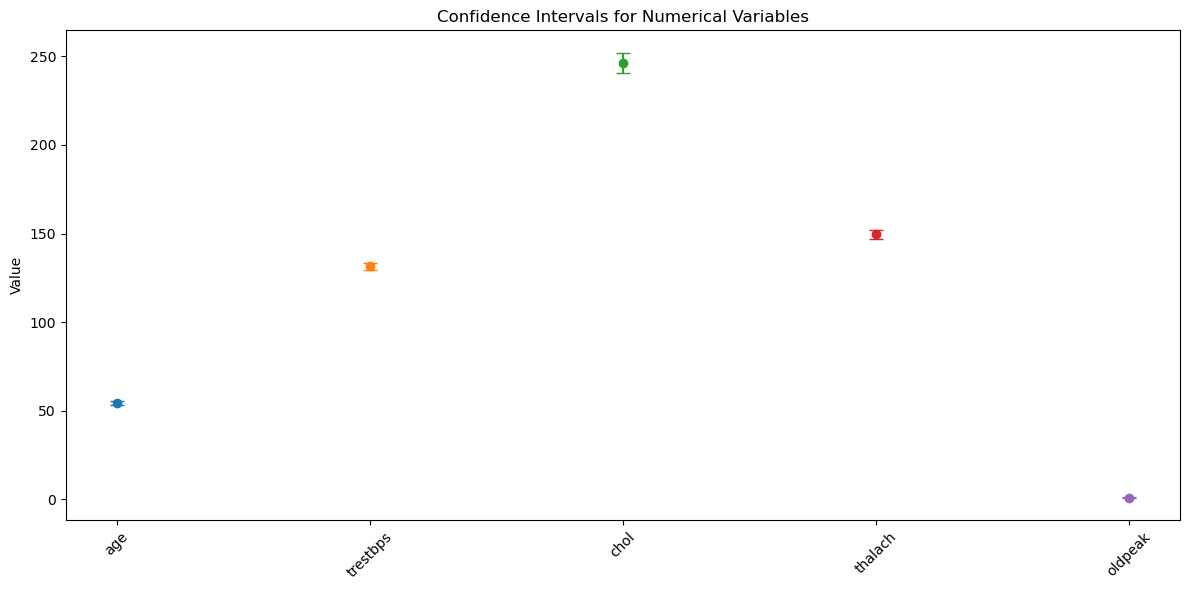

In [43]:
# Visualize confidence intervals for numerical variables
plt.figure(figsize=(12, 6))
for i, var in enumerate(numerical_vars):
    mean = point_estimates[var]['mean']
    ci = conf_intervals[var]
    plt.errorbar(i, mean, yerr=[[mean-ci[0]], [ci[1]-mean]], fmt='o', capsize=5)
plt.xticks(range(len(numerical_vars)), numerical_vars, rotation=45)
plt.title('Confidence Intervals for Numerical Variables')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

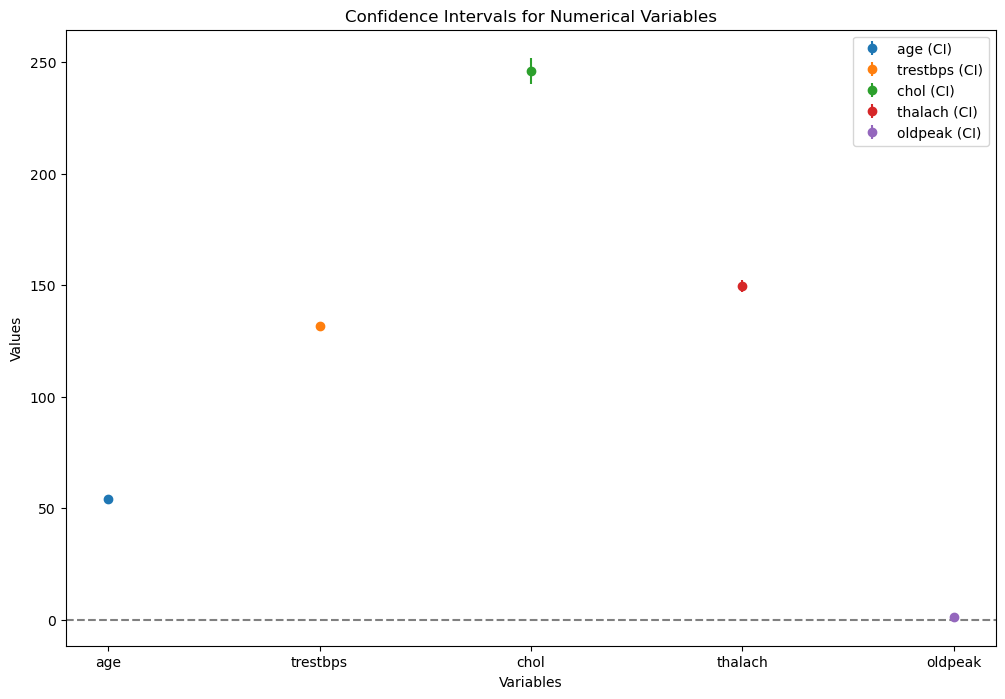

In [44]:
# Visualization of Confidence Intervals for Numerical Variables
plt.figure(figsize=(12, 8))
for var in numerical_vars:
    lower_bound, upper_bound = conf_intervals[var]
    mean = point_estimates[var]['mean']
    plt.errorbar(x=var, y=mean, yerr=[[mean - lower_bound], [upper_bound - mean]], fmt='o', label=f'{var} (CI)')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Confidence Intervals for Numerical Variables')
plt.legend()
plt.show()



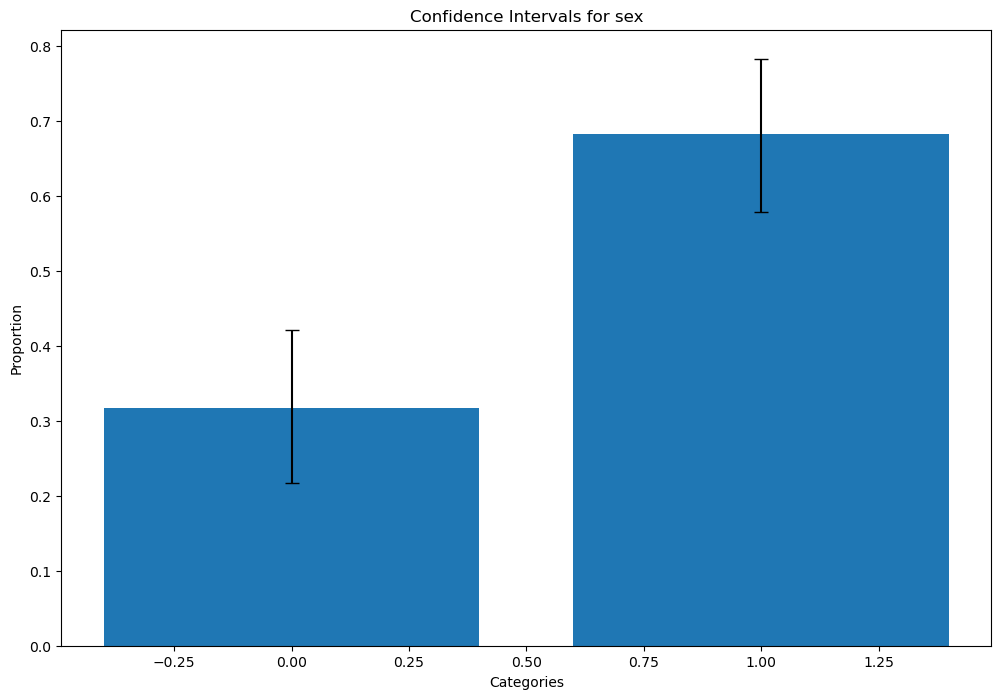

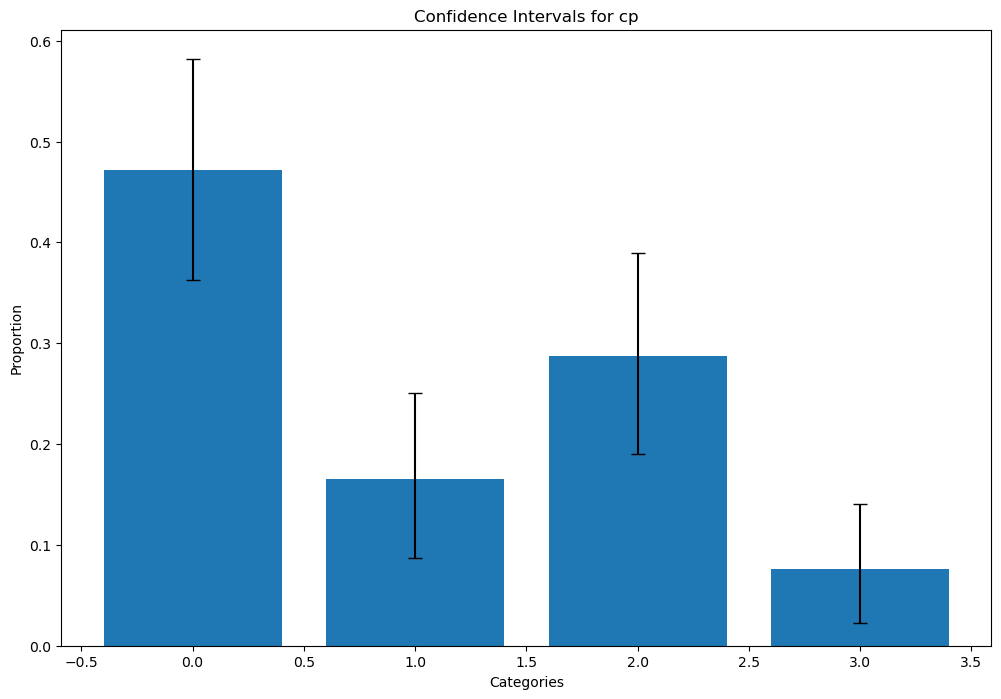

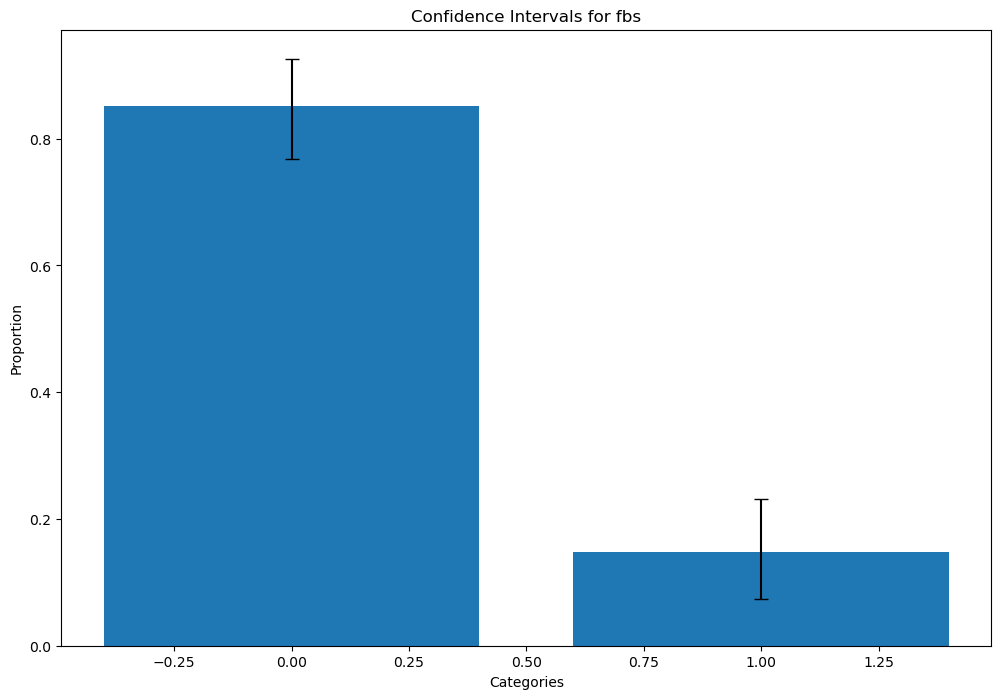

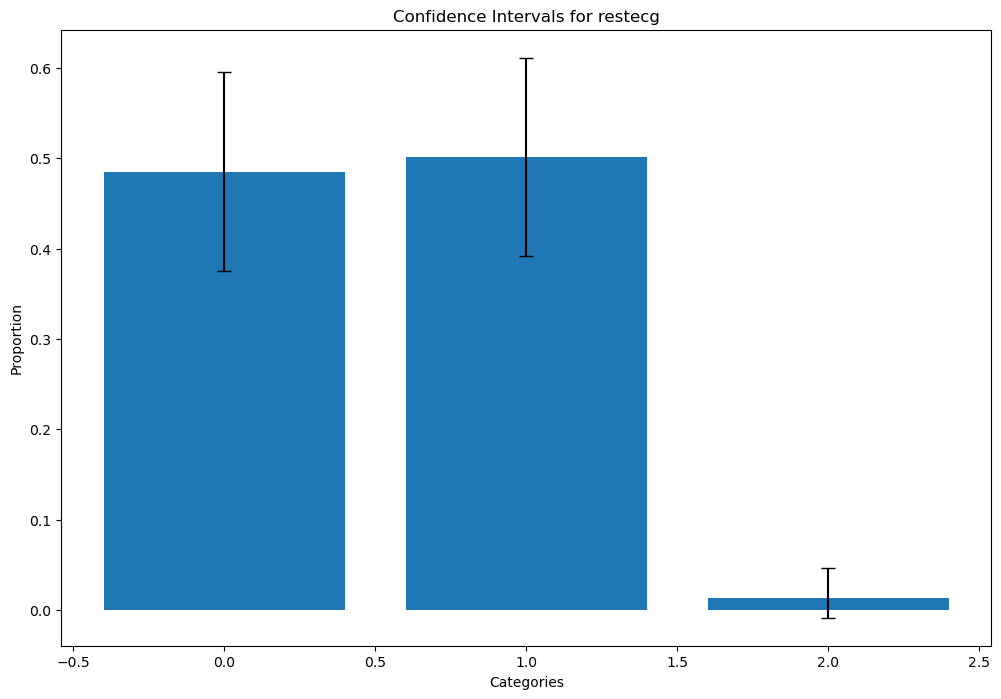

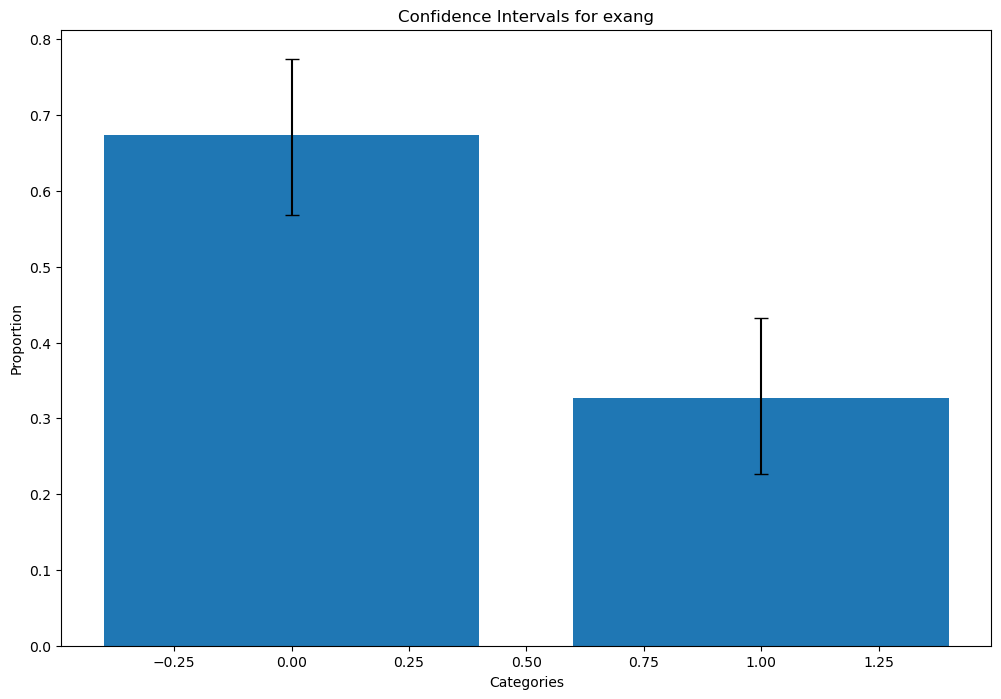

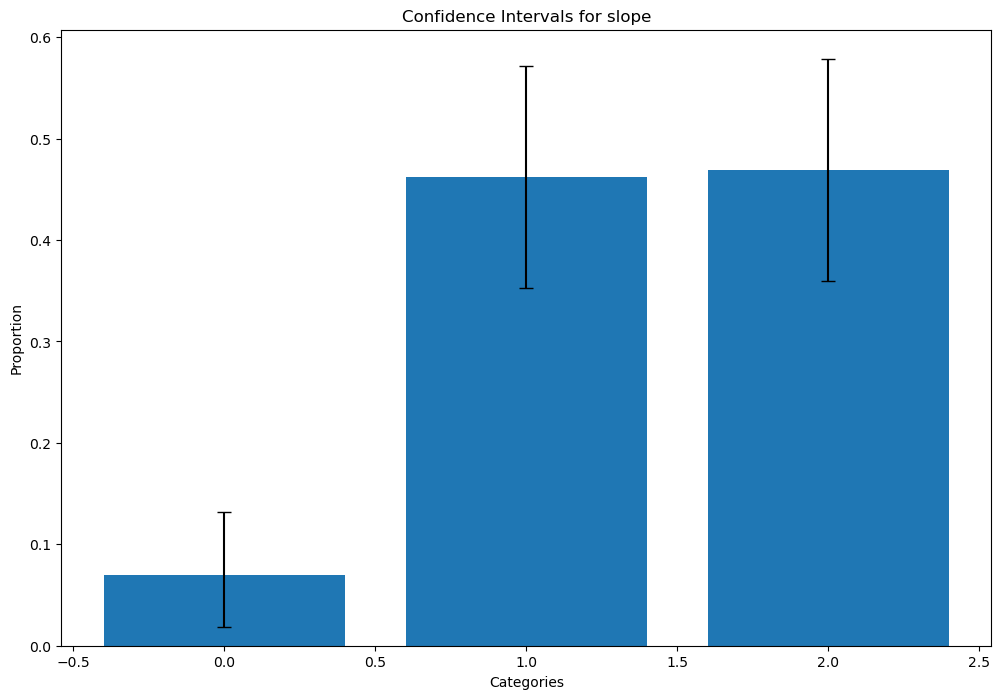

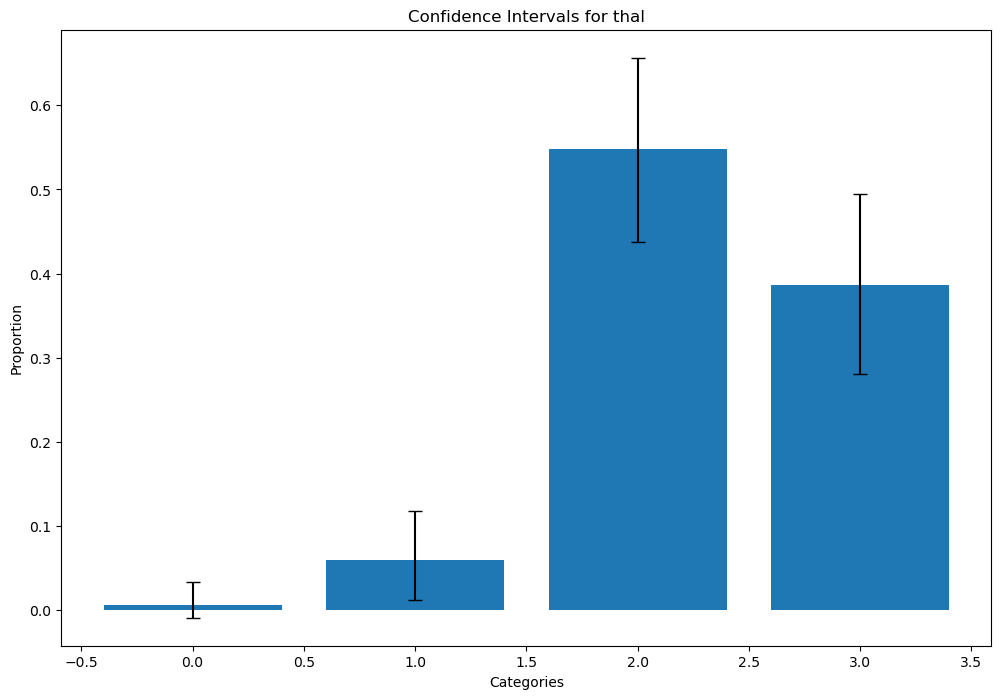

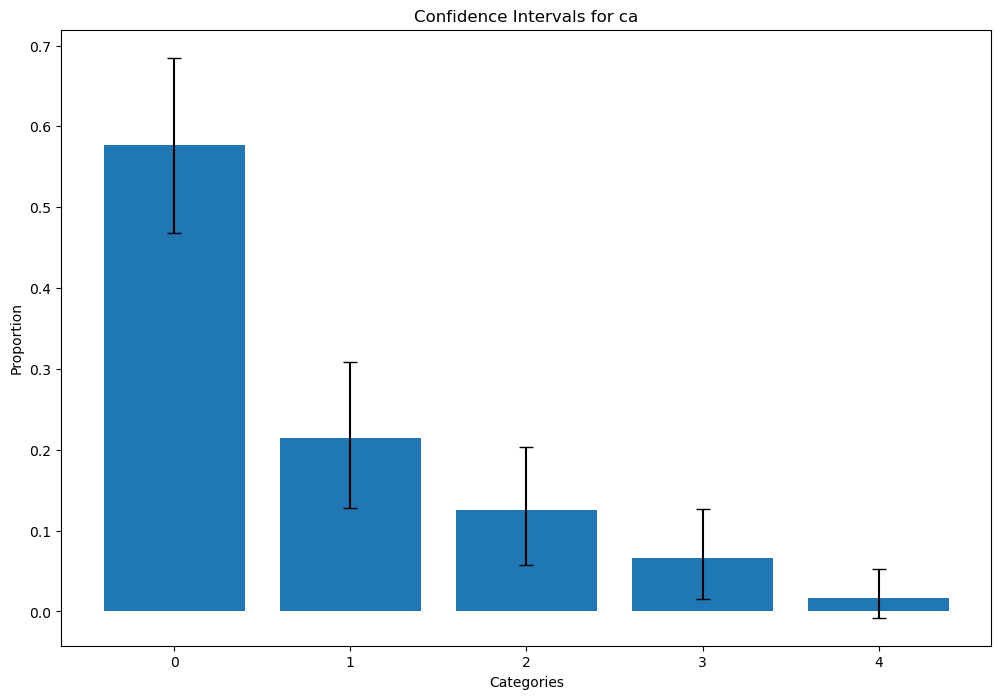

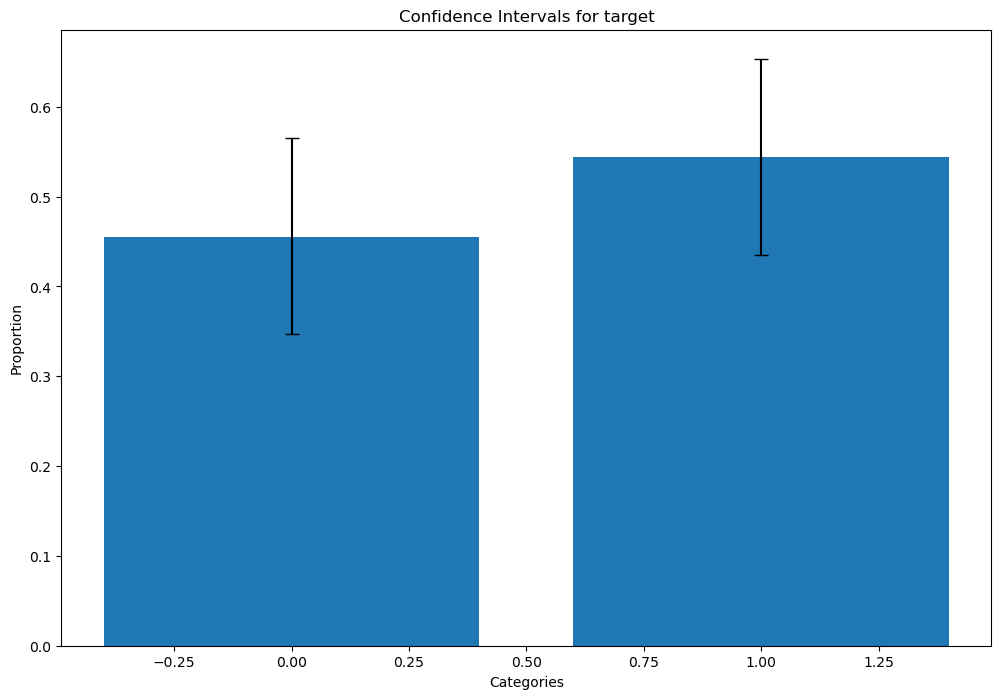

In [45]:
for var in categorical_vars:
    categories = list(conf_intervals[var].keys())
    lower_bounds = [conf_intervals[var][cat][0] for cat in categories]
    upper_bounds = [conf_intervals[var][cat][1] for cat in categories]
    proportions = [point_estimates[var][cat] for cat in categories]

    yerr = np.array([proportions - np.array(lower_bounds), np.array(upper_bounds) - proportions])

    plt.figure(figsize=(12, 8))
    plt.bar(categories, proportions, yerr=yerr, capsize=5)
    plt.xlabel('Categories')
    plt.ylabel('Proportion')
    plt.title(f'Confidence Intervals for {var}')
    plt.show()

# Hypothesis Testing and Statistical Analysis

##### Scenario 1
>**1. Scenario 1:** Testing the Dependency of Age on Heart Disease (Target)
**Hypothesis:**

- Null Hypothesis (H0): There is no significant difference in the mean age between patients with heart disease and those without.
- Alternative Hypothesis (H1): There is a significant difference in the mean age between patients with heart disease and those without.

- **Method:** Independent two-sample t-test

In [46]:
target_yes_age = data[data['target'] == 1]['age']
target_no_age = data[data['target'] == 0]['age']

t_stat, p_value = ttest_ind(target_yes_age, target_no_age)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in the mean age between patients with and without heart disease.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in the mean age between patients with and without heart disease.")

print("\n")

# Add a constant to the predictor variable
X = sm.add_constant(data['age'])
y = data['target']

# Fit logistic regression model
log_reg_model = sm.Logit(y, X)
result = log_reg_model.fit()

# Print model summary
print(result.summary())

T-Statistic: -4.014560975148874
P-Value: 7.524801303442373e-05
Reject Null Hypothesis: There is a significant difference in the mean age between patients with and without heart disease.


Optimization terminated successfully.
         Current function value: 0.663138
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Wed, 24 Jul 2024   Pseudo R-squ.:                 0.03778
Time:                        11:52:26   Log-Likelihood:                -200.93
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.128e-05
                 coef    std err          z      P>|z|      [0.025      0.975]

##### Scenario 2
>**2. Scenario 2:**Testing the Dependency of Resting Blood Pressure (trestbps) on Chest Pain Type (cp)
**Hypothesis:**

- Null Hypothesis (H0): There is no significant difference in the mean resting blood pressure among different chest pain types.
- Alternative Hypothesis (H1): There is a significant difference in the mean resting blood pressure among different chest pain types.

- **Method:** One-way ANOVA test

In [47]:
# Group trestbps by cp
cp_groups = [data[data['cp'] == i]['trestbps'] for i in range(1, 5)]

f_stat, p_value = f_oneway(*cp_groups)
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in the mean resting blood pressure among different chest pain types.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in the mean resting blood pressure among different chest pain types.")
    
print("\n")
X = sm.add_constant(data['trestbps'])

log_reg_model = sm.Logit(y, X)
result = log_reg_model.fit()

print(result.summary())

F-Statistic: nan
P-Value: nan
Fail to Reject Null Hypothesis: There is no significant difference in the mean resting blood pressure among different chest pain types.


Optimization terminated successfully.
         Current function value: 0.678589
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Wed, 24 Jul 2024   Pseudo R-squ.:                 0.01536
Time:                        11:52:26   Log-Likelihood:                -205.61
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                   0.01133
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

d:\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


##### Scenario 3
>**3. Scenario 3:**Testing the Dependency of Gender (sex) on Heart Disease (target)
**Hypothesis:**

- Null Hypothesis (H0): There is no association between gender and heart disease.
- Alternative Hypothesis (H1): There is an association between gender and heart disease.

- **Method:** Chi-square test for independence

In [48]:
contingency_table = pd.crosstab(data['sex'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between gender and heart disease.")
else:
    print("Fail to Reject Null Hypothesis: There is no association between gender and heart disease.")
print("\n")
X = sm.add_constant(data['sex'])

log_reg_model = sm.Logit(y, X)
result = log_reg_model.fit()

print(result.summary())


Chi-Square Statistic: 22.717227046576355
P-Value: 1.8767776216941503e-06
Reject Null Hypothesis: There is an association between gender and heart disease.


Optimization terminated successfully.
         Current function value: 0.648180
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Wed, 24 Jul 2024   Pseudo R-squ.:                 0.05948
Time:                        11:52:26   Log-Likelihood:                -196.40
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 6.226e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

##### Scenario 4
>**4. Scenario 4:**Testing the Dependency of Cholesterol (chol) on Exercise Induced Angina (exang)
**Hypothesis:**

- Null Hypothesis (H0): There is no significant difference in cholesterol levels between patients with and without exercise-induced angina.
- Alternative Hypothesis (H1): There is a significant difference in cholesterol levels between patients with and without exercise-induced angina.

- **Method:** Independent two-sample t-test

In [49]:
exang_yes_chol = data[data['exang'] == 1]['chol']
exang_no_chol = data[data['exang'] == 0]['chol']

t_stat, p_value = ttest_ind(exang_yes_chol, exang_no_chol)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in cholesterol levels between patients with and without exercise-induced angina.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in cholesterol levels between patients with and without exercise-induced angina.")
print("\n")
X = sm.add_constant(data['chol'])
y = data['exang']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

T-Statistic: 1.1654223341256824
P-Value: 0.2447707808791278
Fail to Reject Null Hypothesis: There is no significant difference in cholesterol levels between patients with and without exercise-induced angina.


                            OLS Regression Results                            
Dep. Variable:                  exang   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.358
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.245
Time:                        11:52:26   Log-Likelihood:                -199.85
No. Observations:                 303   AIC:                             403.7
Df Residuals:                     301   BIC:                             411.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         


##### Scenario 5
>**5. Scenario 5:**Testing the Dependency of Maximum Heart Rate Achieved (thalach) on Slope of the Peak Exercise ST Segment (slope)
**Hypothesis:**

- Null Hypothesis (H0): There is no significant difference in maximum heart rate achieved among different slopes of the peak exercise ST segment.
- Alternative Hypothesis (H1): There is a significant difference in maximum heart rate achieved among different slopes of the peak exercise ST segment.

- **Method:** One-way ANOVA test

In [50]:
slope_groups = [data[data['slope'] == i]['thalach'] for i in range(0, 3)]

f_stat, p_value = f_oneway(*slope_groups)
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in maximum heart rate achieved among different slopes of the peak exercise ST segment.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in maximum heart rate achieved among different slopes of the peak exercise ST segment.")

print("\n")

X = sm.add_constant(data['thalach'])
y = data['slope']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

F-Statistic: 38.53032747103051
P-Value: 1.2779256165395148e-15
Reject Null Hypothesis: There is a significant difference in maximum heart rate achieved among different slopes of the peak exercise ST segment.


                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     52.95
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           2.99e-12
Time:                        11:52:26   Log-Likelihood:                -258.19
No. Observations:                 303   AIC:                             520.4
Df Residuals:                     301   BIC:                             527.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         


##### Scenario 6
>**6. Scenario 6:**Testing the Dependency of Fasting Blood Sugar (fbs) on Resting Electrocardiographic Results (restecg)
**Hypothesis:**

- Null Hypothesis (H0): There is no association between fasting blood sugar and resting electrocardiographic results.
- Alternative Hypothesis (H1): There is an association between fasting blood sugar and resting electrocardiographic results.

- **Method:** Chi-square test for independence

In [51]:
contingency_table = pd.crosstab(data['fbs'], data['restecg'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between fasting blood sugar and resting electrocardiographic results.")
else:
    print("Fail to Reject Null Hypothesis: There is no association between fasting blood sugar and resting electrocardiographic results.")

X = sm.add_constant(data['restecg'])
y = data['fbs']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Chi-Square Statistic: 2.2969737119654066
P-Value: 0.3171162490817322
Fail to Reject Null Hypothesis: There is no association between fasting blood sugar and resting electrocardiographic results.
                            OLS Regression Results                            
Dep. Variable:                    fbs   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.149
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.144
Time:                        11:52:26   Log-Likelihood:                -115.58
No. Observations:                 303   AIC:                             235.2
Df Residuals:                     301   BIC:                             242.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
               

##### Scenario 7
>**7. Scenario 7:**Testing the Dependency of Age on Different Types of Chest Pain (cp)
**Hypothesis:**

- Null Hypothesis (H0): There is no significant difference in the mean age among different types of chest pain.
- Alternative Hypothesis (H1): There is a significant difference in the mean age among different types of chest pain.

- **Method:** One-way ANOVA test

In [52]:
cp_groups = [data[data['cp'] == i]['age'] for i in range(1, 5)]

f_stat, p_value = f_oneway(*cp_groups)
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in the mean age among different types of chest pain.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in the mean age among different types of chest pain.")

X = sm.add_constant(data['age'])
y = data['cp']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

F-Statistic: nan
P-Value: nan
Fail to Reject Null Hypothesis: There is no significant difference in the mean age among different types of chest pain.
                            OLS Regression Results                            
Dep. Variable:                     cp   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.425
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.233
Time:                        11:52:27   Log-Likelihood:                -438.28
No. Observations:                 303   AIC:                             880.6
Df Residuals:                     301   BIC:                             888.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

d:\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


##### Scenario 8
>**8. Scenario 8:** Testing the Dependency of Resting Blood Pressure (trestbps) on Thalassemia (thal)
**Hypothesis:**

- Null Hypothesis (H0): There is no significant difference in resting blood pressure among different types of thalassemia.
- Alternative Hypothesis (H1): There is a significant difference in resting blood pressure among different types of thalassemia.

- **Method:**  One-way ANOVA test

In [53]:
thal_groups = [data[data['thal'] == i]['trestbps'] for i in range(0, 4)]

f_stat, p_value = f_oneway(*thal_groups)
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in resting blood pressure among different types of thalassemia.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in resting blood pressure among different types of thalassemia.")


X = sm.add_constant(data['trestbps'])
y = data['thal']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

F-Statistic: 2.251468424258849
P-Value: 0.08244940533583928
Fail to Reject Null Hypothesis: There is no significant difference in resting blood pressure among different types of thalassemia.
                            OLS Regression Results                            
Dep. Variable:                   thal   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.169
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.280
Time:                        11:52:27   Log-Likelihood:                -280.21
No. Observations:                 303   AIC:                             564.4
Df Residuals:                     301   BIC:                             571.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 co

##### Scenario 9
>**9. Scenario 9:** Testing the Dependency of Serum Cholesterol (chol) on the Presence of Major Vessels Colored by Fluoroscopy (ca)
**Hypothesis:**

- Null Hypothesis (H0): There is no significant difference in serum cholesterol levels based on the number of major vessels colored by fluoroscopy.
- Alternative Hypothesis (H1): There is a significant difference in serum cholesterol levels based on the number of major vessels colored by fluoroscopy.

- **Method:** One-way ANOVA test

In [54]:
ca_groups = [data[data['ca'] == i]['chol'] for i in range(0, 5)]

f_stat, p_value = f_oneway(*ca_groups)
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in serum cholesterol levels based on the number of major vessels colored by fluoroscopy.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in serum cholesterol levels based on the number of major vessels colored by fluoroscopy.")


X = sm.add_constant(data['chol'])
y = data['ca']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

F-Statistic: 1.851960700098227
P-Value: 0.11889426283065159
Fail to Reject Null Hypothesis: There is no significant difference in serum cholesterol levels based on the number of major vessels colored by fluoroscopy.
                            OLS Regression Results                            
Dep. Variable:                     ca   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.504
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.221
Time:                        11:52:27   Log-Likelihood:                -435.46
No. Observations:                 303   AIC:                             874.9
Df Residuals:                     301   BIC:                             882.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                    

##### Scenario 10
>**10. Scenario 10:**  Testing the Dependency of Sex on the Presence of Chest Pain (cp)

**Hypothesis:**

- Null Hypothesis (H0): There is no association between gender and the presence of chest pain.
- Alternative Hypothesis (H1): There is an association between gender and the presence of chest pain.

- **Method:** Chi-square test for independence

In [55]:
contingency_table = pd.crosstab(data['sex'], data['cp'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between gender and the presence of chest pain.")
else:
    print("Fail to Reject Null Hypothesis: There is no association between gender and the presence of chest pain.")


X = sm.add_constant(data['cp'])
y = data['sex']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Chi-Square Statistic: 6.822075813213287
P-Value: 0.07779031388551413
Fail to Reject Null Hypothesis: There is no association between gender and the presence of chest pain.
                            OLS Regression Results                            
Dep. Variable:                    sex   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7349
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.392
Time:                        11:52:27   Log-Likelihood:                -197.71
No. Observations:                 303   AIC:                             399.4
Df Residuals:                     301   BIC:                             406.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err      

##### Scenario 11
>**11. Scenario 11:** Testing the Dependency of Fasting Blood Sugar (fbs) on Heart Disease (target)
**Hypothesis:**

- Null Hypothesis (H0): There is no association between fasting blood sugar and heart disease.
- Alternative Hypothesis (H1): There is an association between fasting blood sugar and heart disease.

- **Method:** Chi-square test for independence

In [56]:
contingency_table = pd.crosstab(data['fbs'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between fasting blood sugar and heart disease.")
else:
    print("Fail to Reject Null Hypothesis: There is no association between fasting blood sugar and heart disease.")

X = sm.add_constant(data['target'])
y = data['fbs']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Chi-Square Statistic: 0.10627276301947715
P-Value: 0.7444281114149577
Fail to Reject Null Hypothesis: There is no association between fasting blood sugar and heart disease.
                            OLS Regression Results                            
Dep. Variable:                    fbs   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2369
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.627
Time:                        11:52:27   Log-Likelihood:                -116.54
No. Observations:                 303   AIC:                             237.1
Df Residuals:                     301   BIC:                             244.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err     

##### Scenario 12
>**12. Scenario 12:** Testing the Dependency of Chest Pain (cp) on Exercise Induced Angina (exang)
**Hypothesis:**

- Null Hypothesis (H0): There is no association between chest pain and exercise-induced angina.
- Alternative Hypothesis (H1): There is an association between chest pain and exercise-induced angina.

- **Method:** Chi-square test for independence

In [57]:
contingency_table = pd.crosstab(data['cp'], data['exang'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between chest pain and exercise-induced angina.")
else:
    print("Fail to Reject Null Hypothesis: There is no association between chest pain and exercise-induced angina.")

X = sm.add_constant(data['exang'])
y = data['cp']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Chi-Square Statistic: 67.34826973060967
P-Value: 1.5773314854182704e-14
Reject Null Hypothesis: There is an association between chest pain and exercise-induced angina.
                            OLS Regression Results                            
Dep. Variable:                     cp   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     55.41
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           1.04e-12
Time:                        11:52:27   Log-Likelihood:                -413.40
No. Observations:                 303   AIC:                             830.8
Df Residuals:                     301   BIC:                             838.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

##### Scenario 13
>**13. Scenario 13:** Testing the Dependency of Resting Electrocardiographic Results (restecg) on Heart Disease (target)
**Hypothesis:**

- Null Hypothesis (H0): There is no association between resting electrocardiographic results and heart disease.
- Alternative Hypothesis (H1): There is an association between resting electrocardiographic results and heart disease.

- **Method:** Chi-square test for independence

In [58]:
contingency_table = pd.crosstab(data['restecg'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between resting electrocardiographic results and heart disease.")
else:
   print("Fail to Reject Null Hypothesis: There is an association between resting electrocardiographic results and heart disease.")


X = sm.add_constant(data['target'])
y = data['restecg']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Chi-Square Statistic: 10.023091785081
P-Value: 0.006660598773498031
Reject Null Hypothesis: There is an association between resting electrocardiographic results and heart disease.
                            OLS Regression Results                            
Dep. Variable:                restecg   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.777
Date:                Wed, 24 Jul 2024   Prob (F-statistic):             0.0168
Time:                        11:52:27   Log-Likelihood:                -231.81
No. Observations:                 303   AIC:                             467.6
Df Residuals:                     301   BIC:                             475.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std e

##### Scenario 14
>**14. Scenario 14:** Testing the Dependency of Age on Resting Blood Pressure (trestbps)
**Hypothesis:**

- Null Hypothesis (H0): There is no significant correlation between age and resting blood pressure.
- Alternative Hypothesis (H1): There is a significant correlation between age and resting blood pressure.

- **Method:** Pearson correlation coefficient

In [59]:
correlation_coef, p_value = pearsonr(data['age'], data['trestbps'])
print("Correlation Coefficient:", correlation_coef)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant correlation between age and resting blood pressure.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant correlation between age and resting blood pressure.")

X = sm.add_constant(data['trestbps'])
y = data['age']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Correlation Coefficient: 0.27935090656128836
P-Value: 7.762269074809911e-07
Reject Null Hypothesis: There is a significant correlation between age and resting blood pressure.
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     25.48
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           7.76e-07
Time:                        11:52:27   Log-Likelihood:                -1085.6
No. Observations:                 303   AIC:                             2175.
Df Residuals:                     301   BIC:                             2183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err   

##### Scenario 15
>**15. Scenario 15:** Testing the Dependency of Serum Cholesterol (chol) on Heart Disease (target)
**Hypothesis:**

- Null Hypothesis (H0): There is no significant difference in serum cholesterol levels between patients with and without heart disease.
- Alternative Hypothesis (H1): There is a significant difference in serum cholesterol levels between patients with and without heart disease.

- **Method:** Independent two-sample t-test

In [60]:
heart_disease_chol = data[data['target'] == 1]['chol']
no_heart_disease_chol = data[data['target'] == 0]['chol']

t_stat, p_value = ttest_ind(heart_disease_chol, no_heart_disease_chol)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in serum cholesterol levels between patients with and without heart disease.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in serum cholesterol levels between patients with and without heart disease.")

X = sm.add_constant(data['chol'])
y = data['target']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

T-Statistic: -1.4842450762526977
P-Value: 0.13879032695600638
Fail to Reject Null Hypothesis: There is no significant difference in serum cholesterol levels between patients with and without heart disease.
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.203
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.139
Time:                        11:52:27   Log-Likelihood:                -217.60
No. Observations:                 303   AIC:                             439.2
Df Residuals:                     301   BIC:                             446.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
    

##### Scenario 16
>**16. Scenario 16:** Testing the Dependency of Resting Electrocardiographic Results (restecg) on Exercise Induced Angina (exang)
**Hypothesis:**

- Null Hypothesis (H0): There is no association between resting electrocardiographic results and exercise-induced angina.
- Alternative Hypothesis (H1): There is an association between resting electrocardiographic results and exercise-induced angina.

- **Method:** Chi-square test for independence

In [61]:
contingency_table = pd.crosstab(data['restecg'], data['exang'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between resting electrocardiographic results and exercise-induced angina.")
else:
    print("Fail to Reject Null Hypothesis: There is no association between resting electrocardiographic results and exercise-induced angina.")


X = sm.add_constant(data['exang'])
y = data['restecg']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Chi-Square Statistic: 2.976081401460106
P-Value: 0.225814660887882
Fail to Reject Null Hypothesis: There is no association between resting electrocardiographic results and exercise-induced angina.
                            OLS Regression Results                            
Dep. Variable:                restecg   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.514
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.220
Time:                        11:52:27   Log-Likelihood:                -233.93
No. Observations:                 303   AIC:                             471.9
Df Residuals:                     301   BIC:                             479.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
             

##### Scenario 17
>**17. Scenario 17:** Testing the Dependency of Chest Pain (cp) on Heart Disease (target)
**Hypothesis:**

- Null Hypothesis (H0): There is no association between chest pain and heart disease.
- Alternative Hypothesis (H1): There is an association between chest pain and heart disease.

- **Method:** Chi-square test for independence

In [62]:
contingency_table = pd.crosstab(data['cp'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between chest pain and heart disease.")
else:
    print("Fail to Reject Null Hypothesis: There is no association between chest pain and heart disease.")


X = sm.add_constant(data['target'])
y = data['cp']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Chi-Square Statistic: 81.68642755194445
P-Value: 1.3343043373050064e-17
Reject Null Hypothesis: There is an association between chest pain and heart disease.
                            OLS Regression Results                            
Dep. Variable:                     cp   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     69.77
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           2.47e-15
Time:                        11:52:27   Log-Likelihood:                -407.41
No. Observations:                 303   AIC:                             818.8
Df Residuals:                     301   BIC:                             826.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|

##### Scenario 18
>**18. Scenario 18:** Testing the Dependency of Fasting Blood Sugar (fbs) on Sex
**Hypothesis:**

- Null Hypothesis (H0): There is no association between fasting blood sugar and sex.
- Alternative Hypothesis (H1): There is an association between fasting blood sugar and sex.

- **Method:** Chi-square test for independence

In [63]:
contingency_table = pd.crosstab(data['fbs'], data['sex'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between fasting blood sugar and sex.")
else:
    print("Fail to Reject Null Hypothesis: There is no association between fasting blood sugar and sex.")

X = sm.add_constant(data['sex'])
y = data['fbs']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Chi-Square Statistic: 0.3723986127495038
P-Value: 0.5416997129593022
Fail to Reject Null Hypothesis: There is no association between fasting blood sugar and sex.
                            OLS Regression Results                            
Dep. Variable:                    fbs   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6116
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.435
Time:                        11:52:27   Log-Likelihood:                -116.35
No. Observations:                 303   AIC:                             236.7
Df Residuals:                     301   BIC:                             244.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t     

##### Scenario 19
>**19. Scenario 19:** Testing the Dependency of Exercise Induced Angina (exang) on Heart Disease (target)
**Hypothesis:**

- Null Hypothesis (H0): There is no association between exercise-induced angina and heart disease.
- Alternative Hypothesis (H1): There is an association between exercise-induced angina and heart disease.

- **Method:** Chi-square test for independence

In [64]:
contingency_table = pd.crosstab(data['exang'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between exercise-induced angina and heart disease.")
else:
    print("Fail to Reject Null Hypothesis: There is no association between exercise-induced angina and heart disease.")


X = sm.add_constant(data['target'])
y = data['exang']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Chi-Square Statistic: 55.94454996665093
P-Value: 7.454409331235655e-14
Reject Null Hypothesis: There is an association between exercise-induced angina and heart disease.
                            OLS Regression Results                            
Dep. Variable:                  exang   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     70.95
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           1.52e-15
Time:                        11:52:27   Log-Likelihood:                -168.47
No. Observations:                 303   AIC:                             340.9
Df Residuals:                     301   BIC:                             348.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err        

##### Scenario 20
>**20. Scenario 20:** Testing the Dependency of the Number of Major Vessels Colored by Fluoroscopy (ca) on Heart Disease (target)
**Hypothesis:**

- Null Hypothesis (H0): There is no association between the number of major vessels colored by fluoroscopy and heart disease.
- Alternative Hypothesis (H1): There is an association between the number of major vessels colored by fluoroscopy and heart disease.

- **Method:** Chi-square test for independence

In [65]:
contingency_table = pd.crosstab(data['ca'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between the number of major vessels colored by fluoroscopy and heart disease.")
else:
    print("Fail to Reject Null Hypothesis: There is no association between the number of major vessels colored by fluoroscopy and heart disease.")

X = sm.add_constant(data['target'])
y = data['ca']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Chi-Square Statistic: 74.36663061195097
P-Value: 2.712470211959332e-15
Reject Null Hypothesis: There is an association between the number of major vessels colored by fluoroscopy and heart disease.
                            OLS Regression Results                            
Dep. Variable:                     ca   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     54.56
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           1.49e-12
Time:                        11:52:28   Log-Likelihood:                -410.97
No. Observations:                 303   AIC:                             825.9
Df Residuals:                     301   BIC:                             833.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
             

##### Scenario 21
>**21. Scenario 21:** Testing the Dependency of the Slope of the Peak Exercise ST Segment (slope) on Heart Disease (target)
**Hypothesis:**

- Null Hypothesis (H0): There is no association between the slope of the peak exercise ST segment and heart disease.
- Alternative Hypothesis (H1): There is an association between the slope of the peak exercise ST segment and heart disease.

- **Method:** Chi-square test for independence

In [66]:
contingency_table = pd.crosstab(data['slope'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between the slope of the peak exercise ST segment and heart disease.")
else:
    print("Fail to Reject Null Hypothesis: There is no association between the slope of the peak exercise ST segment and heart disease.")

X = sm.add_constant(data['target'])
y = data['slope']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Chi-Square Statistic: 47.506896756030244
P-Value: 4.830681934276837e-11
Reject Null Hypothesis: There is an association between the slope of the peak exercise ST segment and heart disease.
                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     40.90
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           6.10e-10
Time:                        11:52:28   Log-Likelihood:                -263.44
No. Observations:                 303   AIC:                             530.9
Df Residuals:                     301   BIC:                             538.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef

##### Scenario 22
>**22. Scenario 22:** Testing the Dependency of Thalassemia (thal) on Heart Disease (target)
**Hypothesis:**

- Null Hypothesis (H0): There is no association between thalassemia and heart disease.
- Alternative Hypothesis (H1): There is an association between thalassemia and heart disease.

- **Method:** Chi-square test for independence

In [67]:
contingency_table = pd.crosstab(data['thal'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between thalassemia and heart disease.")
else:
    print("Fail to Reject Null Hypothesis: There is no association between thalassemia and heart disease.")

X = sm.add_constant(data['target'])
y = data['thal']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Chi-Square Statistic: 85.30373951466147
P-Value: 2.2333507210129364e-18
Reject Null Hypothesis: There is an association between thalassemia and heart disease.
                            OLS Regression Results                            
Dep. Variable:                   thal   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     40.41
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           7.62e-10
Time:                        11:52:28   Log-Likelihood:                -261.71
No. Observations:                 303   AIC:                             527.4
Df Residuals:                     301   BIC:                             534.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>

##### Scenario 23
>**23. Scenario 23:** Testing the Dependency of Sex on Heart Disease (target)
**Hypothesis:**

- Null Hypothesis (H0): There is no association between sex and heart disease.
- Alternative Hypothesis (H1): There is an association between sex and heart disease.

- **Method:** Chi-square test for independence

In [68]:
contingency_table = pd.crosstab(data['sex'], data['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between sex and heart disease.")
else:
    print("Fail to Reject Null Hypothesis: There is no association between sex and heart disease.")

X = sm.add_constant(data['target'])
y = data['sex']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Chi-Square Statistic: 22.717227046576355
P-Value: 1.8767776216941503e-06
Reject Null Hypothesis: There is an association between sex and heart disease.


                            OLS Regression Results                            
Dep. Variable:                    sex   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     25.79
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           6.68e-07
Time:                        11:52:28   Log-Likelihood:                -185.63
No. Observations:                 303   AIC:                             375.3
Df Residuals:                     301   BIC:                             382.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8261      0.038     21.662      0.0

##### Scenario 24
>**24. Scenario 24:** Testing the Dependency of Age on Chest Pain (cp)

**Hypothesis:**

- Null Hypothesis (H0): There is no significant correlation between age and chest pain.
- Alternative Hypothesis (H1): There is a significant correlation between age and chest pain.

- **Method:** Spearman correlation coefficient (due to potential non-linear relationship)

In [69]:
correlation_coef, p_value = spearmanr(data['age'], data['cp'])
print("Correlation Coefficient:", correlation_coef)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant correlation between age and chest pain.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant correlation between age and chest pain.")
X = sm.add_constant(data['cp'])
y = data['age']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Correlation Coefficient: -0.08749412051180998
P-Value: 0.12860610551152693
Fail to Reject Null Hypothesis: There is no significant correlation between age and chest pain.
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.425
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.233
Time:                        11:52:28   Log-Likelihood:                -1097.2
No. Observations:                 303   AIC:                             2198.
Df Residuals:                     301   BIC:                             2206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err       

##### Scenario 25
>**25. Scenario 25:**  Testing the Dependency of Fasting Blood Sugar (fbs) on Resting Blood Pressure (trestbps)
**Hypothesis:**

- Null Hypothesis (H0): There is no association between fasting blood sugar and resting blood pressure.
- Alternative Hypothesis (H1): There is an association between fasting blood sugar and resting blood pressure.

- **Method:** Independent two-sample t-test

In [70]:
high_fbs = data[data['fbs'] == 1]['trestbps']
normal_fbs = data[data['fbs'] == 0]['trestbps']

t_stat, p_value = ttest_ind(high_fbs, normal_fbs)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in resting blood pressure between high and normal fasting blood sugar levels.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in resting blood pressure between high and normal fasting blood sugar levels.")

X = sm.add_constant(data['trestbps'])
y = data['fbs']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

T-Statistic: 3.1297550337871543
P-Value: 0.0019211354016969613
Reject Null Hypothesis: There is a significant difference in resting blood pressure between high and normal fasting blood sugar levels.
                            OLS Regression Results                            
Dep. Variable:                    fbs   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     9.795
Date:                Wed, 24 Jul 2024   Prob (F-statistic):            0.00192
Time:                        11:52:28   Log-Likelihood:                -111.81
No. Observations:                 303   AIC:                             227.6
Df Residuals:                     301   BIC:                             235.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
           

##### Scenario 26
>**26. Scenario 26:** Testing the Dependency of Thalassemia (thal) on Chest Pain (cp)
**Hypothesis:**

- Null Hypothesis (H0): There is no association between thalassemia and chest pain.
- Alternative Hypothesis (H1): There is an association between thalassemia and chest pain.

- **Method:** Chi-square test for independence

In [71]:
contingency_table = pd.crosstab(data['thal'], data['cp'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is an association between thalassemia and chest pain.")
else:
    print("Fail to Reject Null Hypothesis: There is no association between thalassemia and chest pain.")

X = sm.add_constant(data['cp'])
y = data['thal']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Chi-Square Statistic: 41.89215854327448
P-Value: 3.43912674369823e-06
Reject Null Hypothesis: There is an association between thalassemia and chest pain.
                            OLS Regression Results                            
Dep. Variable:                   thal   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     8.085
Date:                Wed, 24 Jul 2024   Prob (F-statistic):            0.00477
Time:                        11:52:28   Log-Likelihood:                -276.78
No. Observations:                 303   AIC:                             557.6
Df Residuals:                     301   BIC:                             565.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|  

##### Scenario 27
>**27. Scenario 27:** Testing the Dependency of Age on Maximum Heart Rate Achieved (thalach) for Patients with Heart Disease
**Hypothesis:**

- Null Hypothesis (H0): There is no correlation between age and maximum heart rate achieved for patients with heart disease.
- Alternative Hypothesis (H1): There is a correlation between age and maximum heart rate achieved for patients with heart disease.

- **Method:** Pearson correlation coefficient

In [72]:
heart_disease_patients = data[data['target'] == 1]
correlation_coef, p_value = pearsonr(heart_disease_patients['age'], heart_disease_patients['thalach'])
print("Correlation Coefficient:", correlation_coef)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant correlation between age and maximum heart rate achieved for patients with heart disease.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant correlation between age and maximum heart rate achieved for patients with heart disease.")

X = sm.add_constant(data['age'])
y = data['thalach']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

Correlation Coefficient: -0.5258007358642253
P-Value: 4.107759226144889e-13
Reject Null Hypothesis: There is a significant correlation between age and maximum heart rate achieved for patients with heart disease.
                            OLS Regression Results                            
Dep. Variable:                thalach   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     56.83
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           5.63e-13
Time:                        11:52:28   Log-Likelihood:                -1352.0
No. Observations:                 303   AIC:                             2708.
Df Residuals:                     301   BIC:                             2716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                        

>**28. First Scenario**
- Scenario:  want to compare the mean **chol** of patients with high risk (target = 1) of heart disease to those with low risk (target = 0).
- Explanation: This test is appropriate when comparing the means of two independent groups, assuming that the data in each group are normally distributed and have equal variances.

### we want to compare the means of a numerical variable (Chol) between two groups (e.g., high risk and low risk),
### we can use a parametric t-test assuming the data follows a normal distribution.
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [73]:
high_risk_group = data[data['target'] == 1]['chol']
low_risk_group = data[data['target'] == 0]['chol']

##### Perform t-test

In [74]:
t_statistic, p_value = ttest_ind(high_risk_group, low_risk_group)

##### Interpret the results


In [75]:
if p_value < 0.05:
    print("There is a significant difference in cholesterol levels between high-risk and low-risk groups.")
else:
    print("There is no significant difference in cholesterol levels between high-risk and low-risk groups.")


X = sm.add_constant(data['chol'])
y = data['target']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

There is no significant difference in cholesterol levels between high-risk and low-risk groups.
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.203
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.139
Time:                        11:52:28   Log-Likelihood:                -217.60
No. Observations:                 303   AIC:                             439.2
Df Residuals:                     301   BIC:                             446.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

##### Scenario 29
>**29. Scenario 29:** Testing the Dependency of (oldpeak) on  (slope)

**Hypothesis:**

- Null Hypothesis (H0): There is a no significant difference in the mean values of oldpeak among the different categories of slope.
- Alternative Hypothesis (H1): There is significant difference in the mean values of oldpeak among the different categories of slope.

- **Method:** One-way ANOVA test

In [76]:
slope_groups = [data[data['slope'] == i]['oldpeak'] for i in range(0, 3)]

f_stat, p_value = f_oneway(*slope_groups)
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in the mean values of oldpeak among the different categories of slope.")
else:
    print("Fail to Reject There is no significant difference in the mean values of oldpeak among the different categories of slope.")

print("\n")

X = sm.add_constant(data['oldpeak'])
y = data['slope']

lin_reg_model = sm.OLS(y, X)
result = lin_reg_model.fit()

print(result.summary())

F-Statistic: 75.77795818936443
P-Value: 2.298569702330009e-27
Reject Null Hypothesis: There is a significant difference in the mean values of oldpeak among the different categories of slope.


                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           2.37e-28
Time:                        11:52:28   Log-Likelihood:                -221.27
No. Observations:                 303   AIC:                             446.5
Df Residuals:                     301   BIC:                             454.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 

# Extra Part

### Visualization

#### histogram plot target

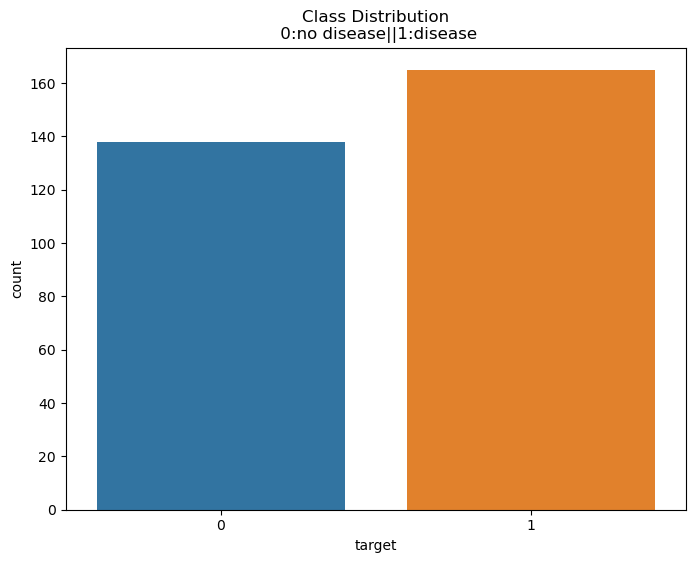

In [77]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='target')
plt.title(f'Class Distribution\n 0:no disease||1:disease')
plt.show()

#### histo plot 

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


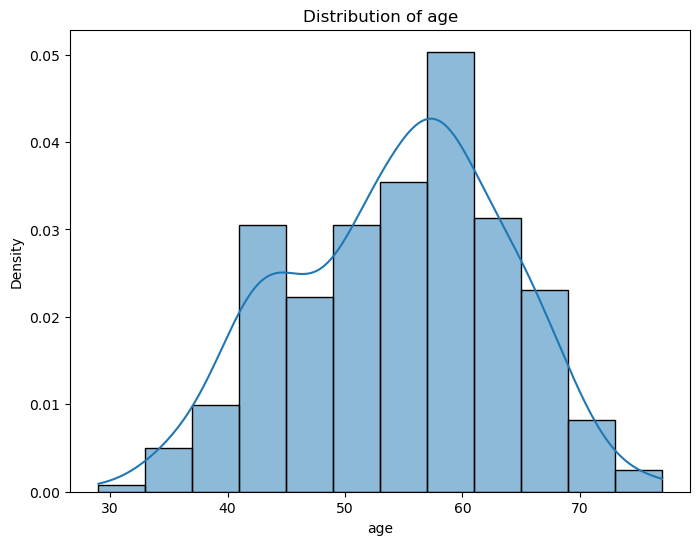

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


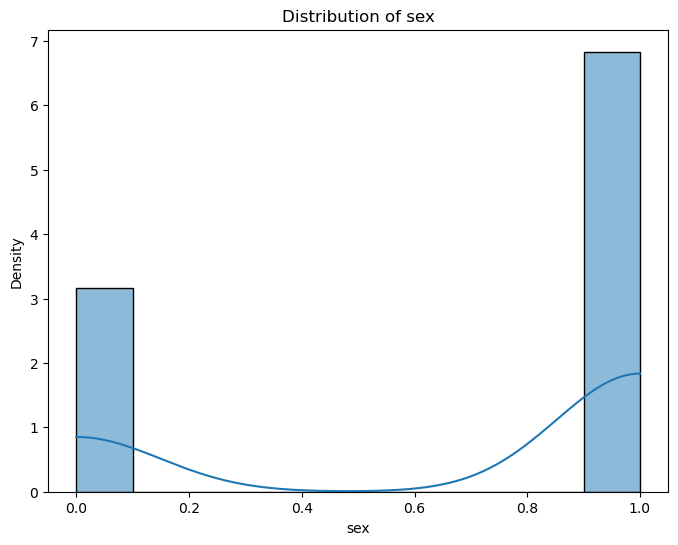

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


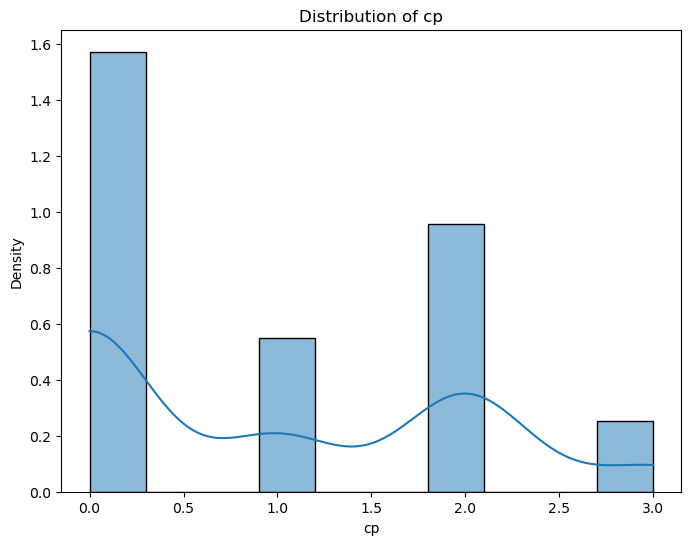

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


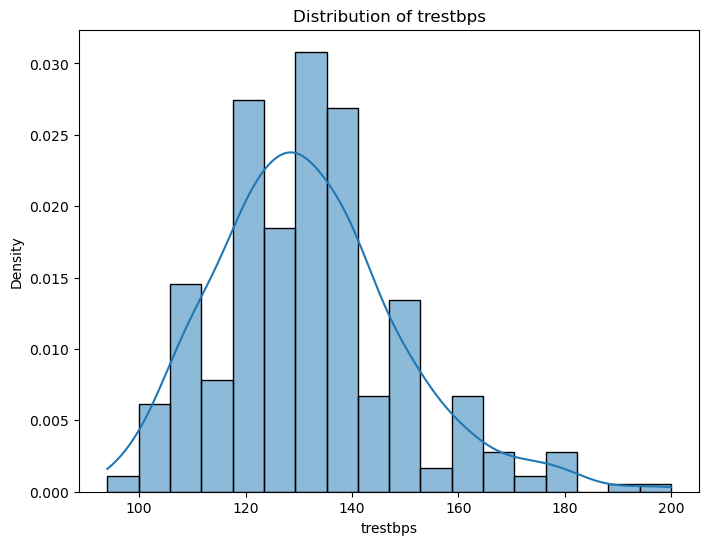

In [78]:
numerical_vars = ['age', 'sex', 'cp', 'trestbps']

for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=var, kde=True, stat='density')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.show()

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


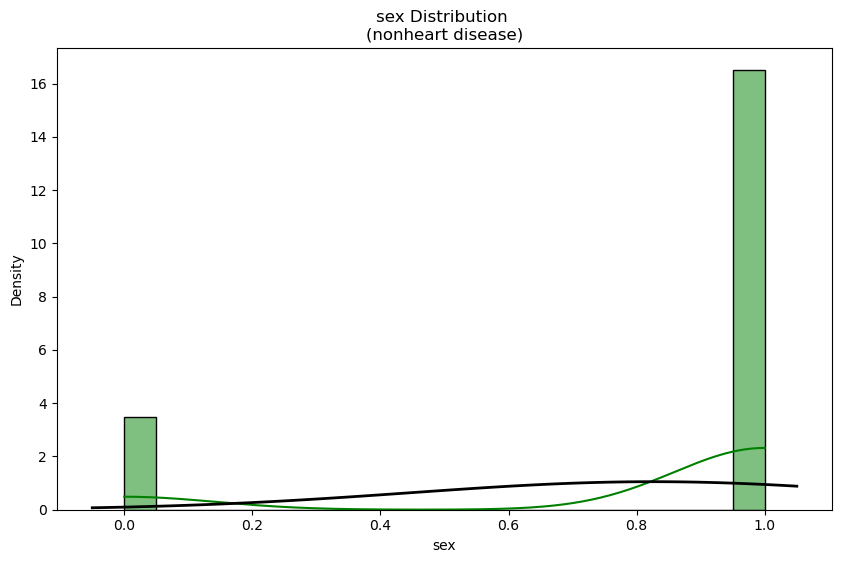

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


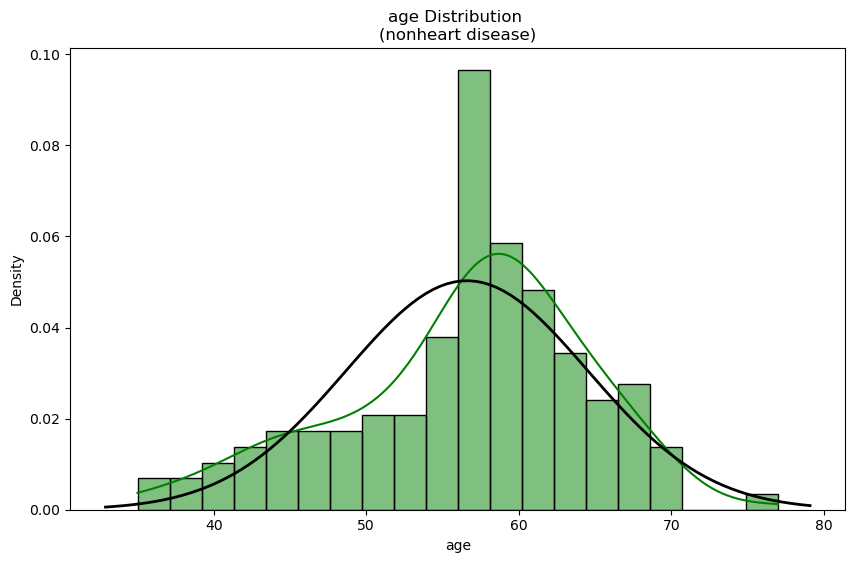

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


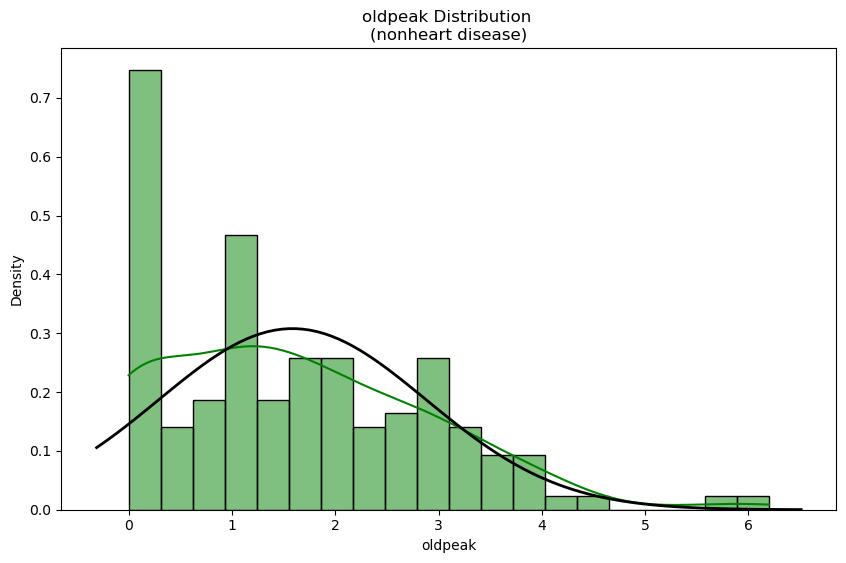

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


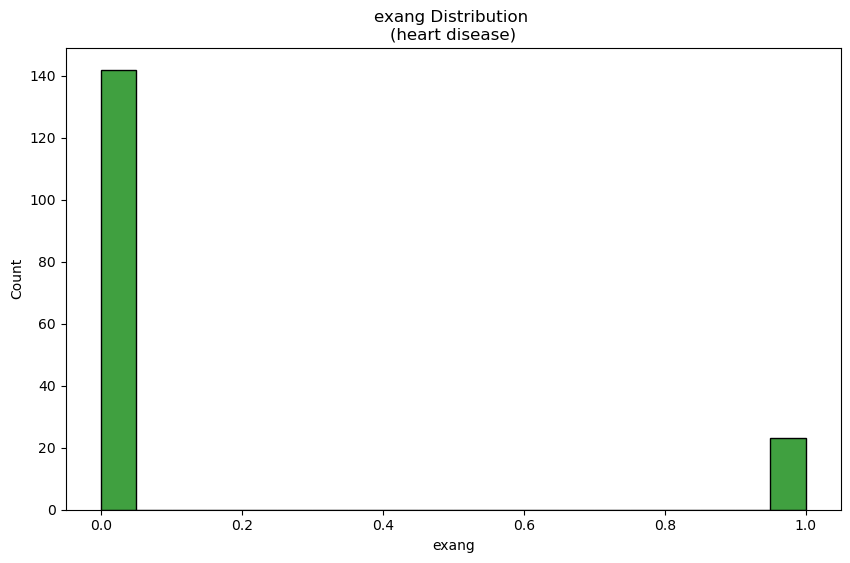

In [79]:
# Filter the data for individuals without heart disease
nonheart_disease_data = data[data['target'] == 0]
heart_disease_data = data[data['target'] == 1]
important_parameter_noheart=['sex', 'age','oldpeak']
important_parameter_heart=['exang']
# Plot the distribution
for var in important_parameter_noheart:
    plt.figure(figsize=(10, 6))
    sns.histplot(nonheart_disease_data[var], kde=True, stat="density", color="green", bins=20)
    # Fit a normal distribution to the data
    mu, std = norm.fit(nonheart_disease_data[var])

    # Plot the normal distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.title(f'{var} Distribution \n(nonheart disease)')
    plt.xlabel(f'{var}')
    plt.ylabel('Density')
    plt.show()

for var in important_parameter_heart:
    plt.figure(figsize=(10, 6))
    sns.histplot(heart_disease_data[var],  color="green", bins=20)
    plt.title(f'{var} Distribution \n(heart disease)')
    plt.xlabel(f'{var}')
    plt.ylabel('Count')
    plt.show()

In [80]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0   2.3000   
1     37    1   2       130   250    0        1      187      0   3.5000   
2     41    0   1       130   204    0        0      172      0   1.4000   
3     56    1   1       120   236    0        1      178      0   0.8000   
4     57    0   0       120   354    0        1      163      1   0.6000   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1   0.2000   
299   45    1   3       110   264    0        1      132      0   1.2000   
300   68    1   0       144   193    1        1      141      0   3.4000   
301   57    1   0       130   131    0        1      115      1   1.2000   
302   57    0   1       130   236    0        0      174      0   0.0000   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


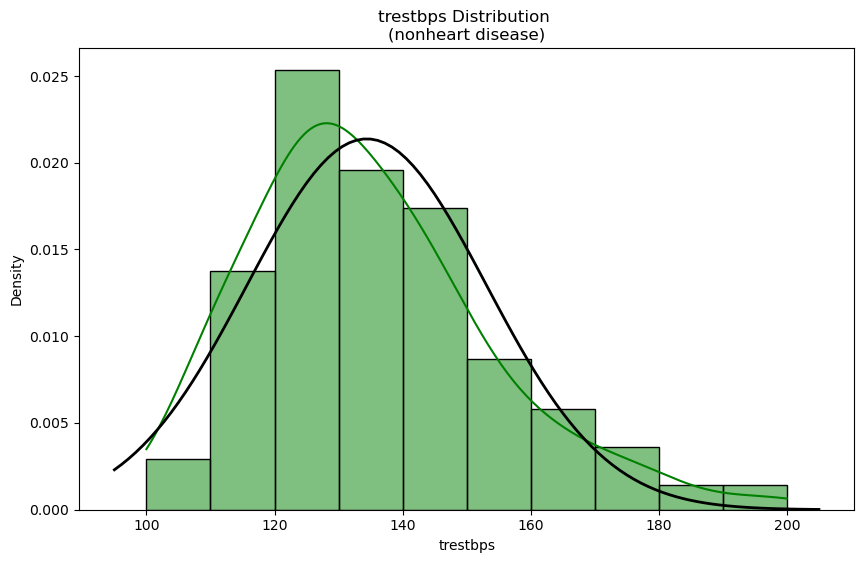

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


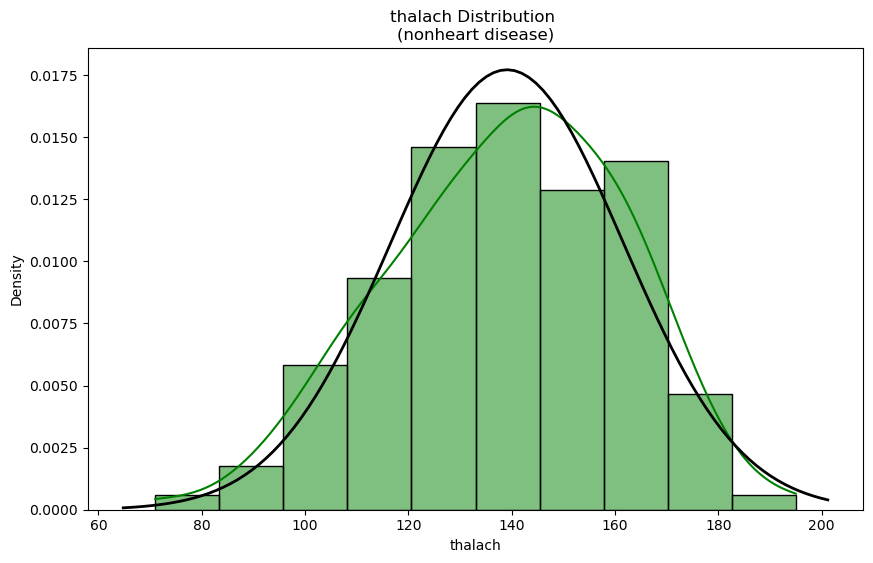

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


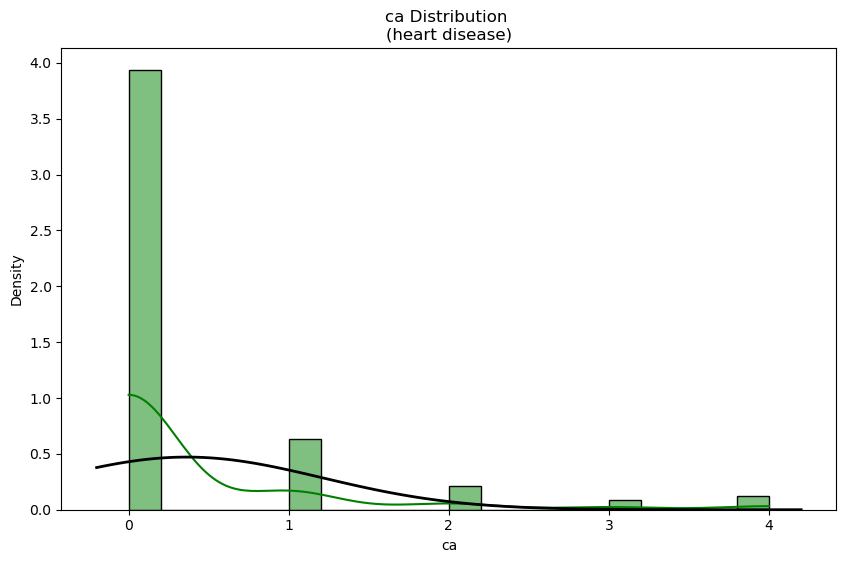

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


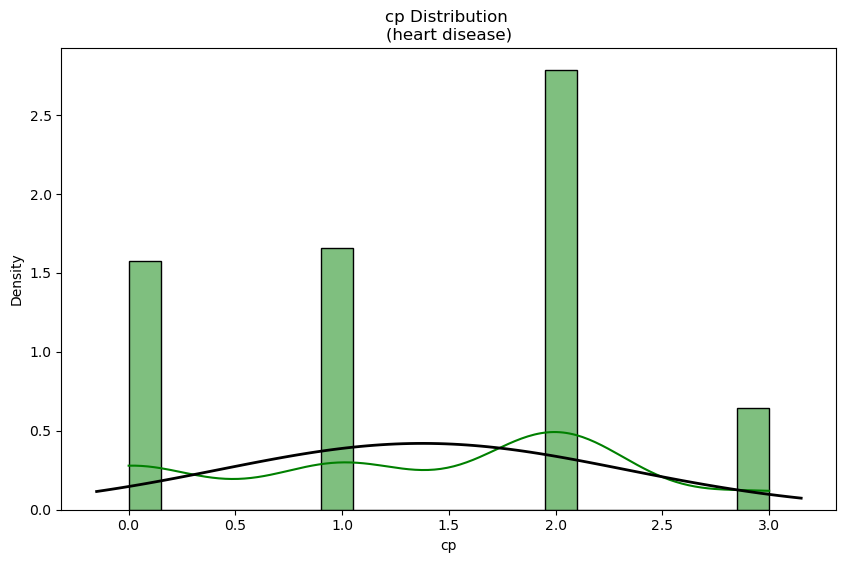

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


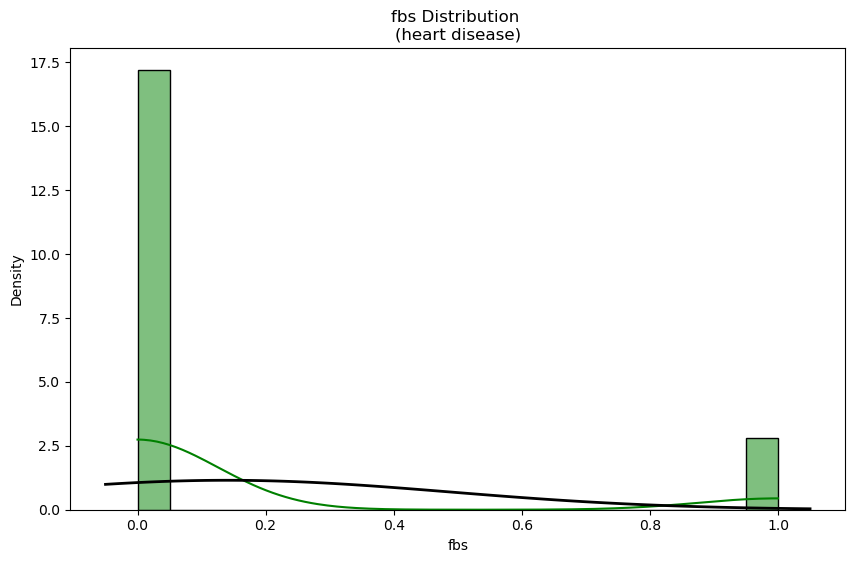

In [81]:
# Filter the data for individuals without heart disease
nonheart_disease_data = data[data['target'] == 0]
heart_disease_data = data[data['target'] == 1]
important_parameter_noheart=['trestbps','thalach']
important_parameter_heart=['ca','cp','fbs']
# Plot the distribution
for var in important_parameter_noheart:
    plt.figure(figsize=(10, 6))
    sns.histplot(nonheart_disease_data[var], kde=True, stat="density", color="green", bins=10)
    # Fit a normal distribution to the data
    mu, std = norm.fit(nonheart_disease_data[var])

    # Plot the normal distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.title(f'{var} Distribution \n(nonheart disease)')
    plt.xlabel(f'{var}')
    plt.ylabel('Density')
    plt.show()


# Plot the distribution
for var in important_parameter_heart:
    plt.figure(figsize=(10, 6))
    sns.histplot(heart_disease_data[var], kde=True, stat="density", color="green", bins=20)
    # Fit a normal distribution to the data
    mu, std = norm.fit(heart_disease_data[var])

    # Plot the normal distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.title(f'{var} Distribution \n(heart disease)')
    plt.xlabel(f'{var}')
    plt.ylabel('Density')
    plt.show()

#### Duplicate Value

In [82]:
# Find duplicate rows
duplicates = data[data.duplicated()]

In [83]:
duplicates

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0   0.0000   

     slope  ca  thal  target  
164      2   4     2       1

#### Corrolation Heatmap

In [84]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

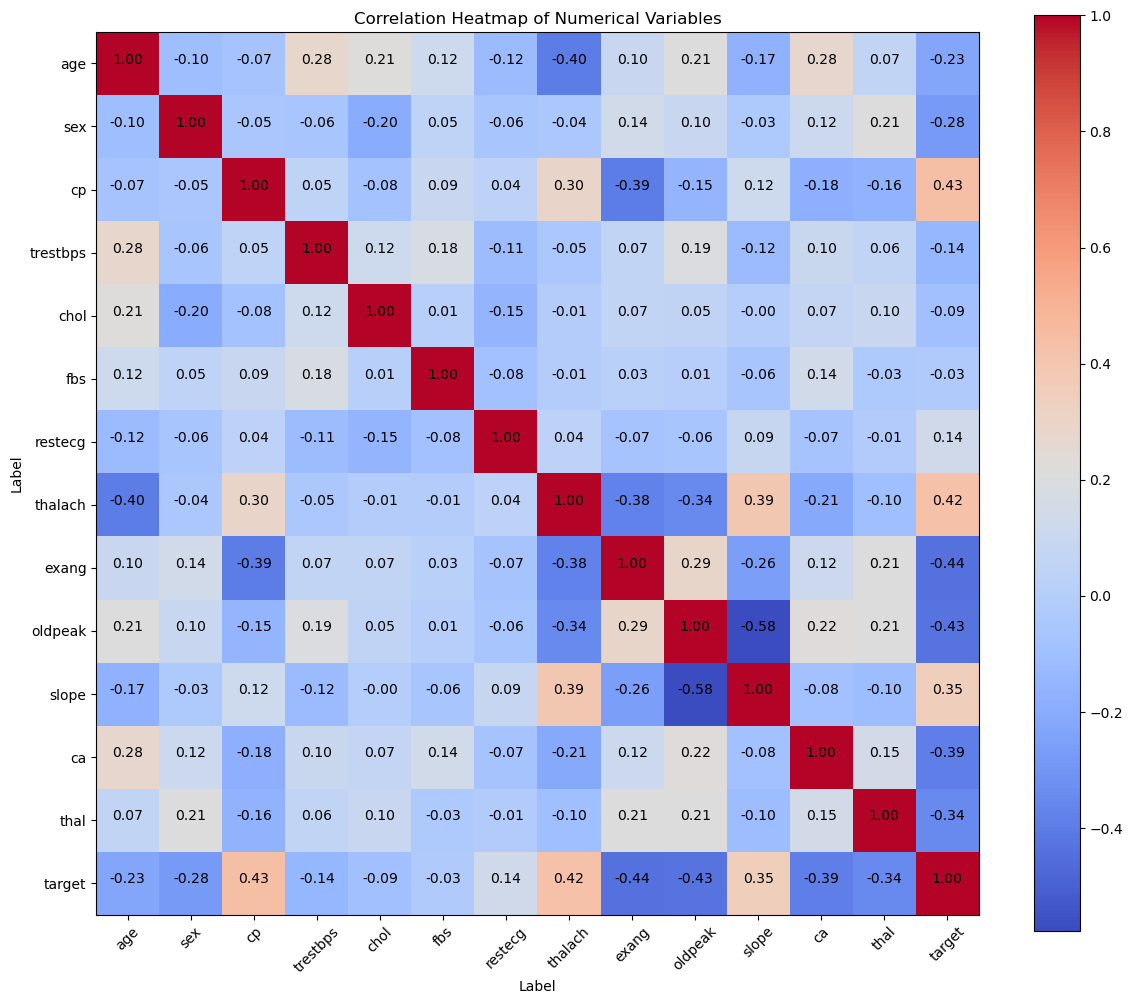

In [85]:
show_heatmap(correlation_matrix,cmap='coolwarm')

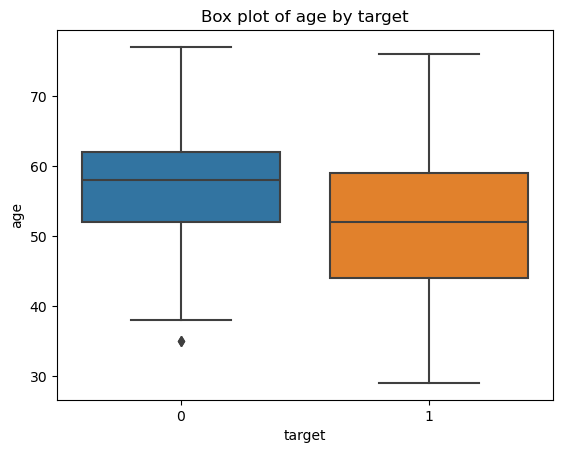

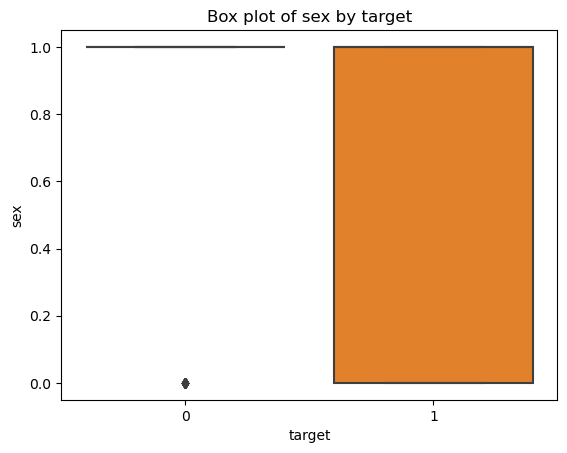

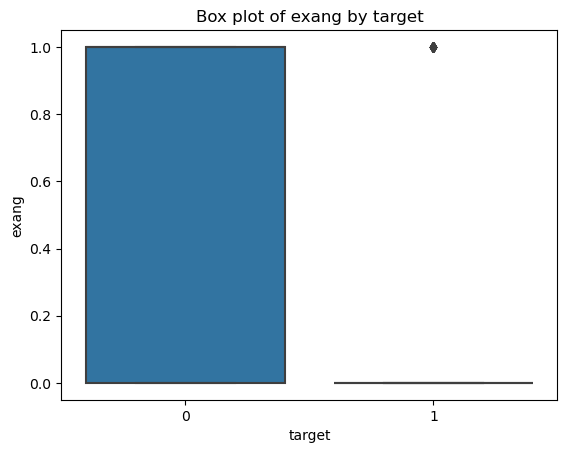

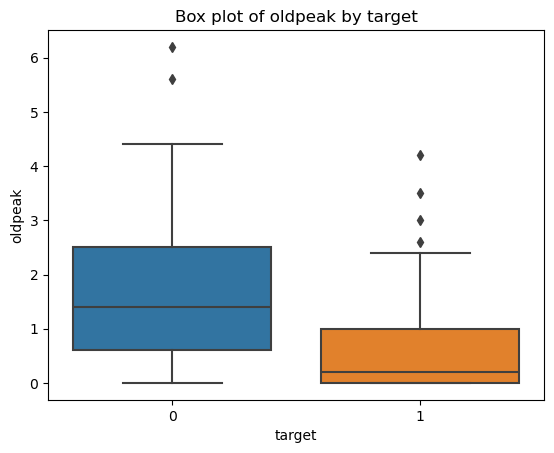

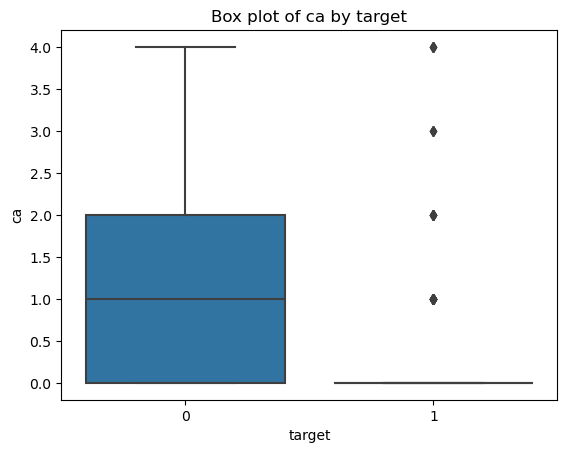

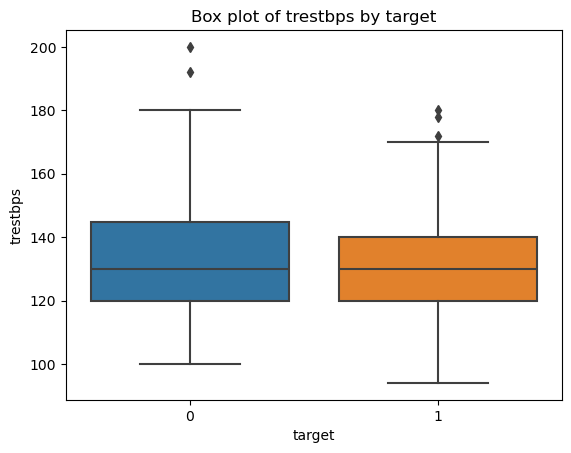

In [86]:
box_plot_var=['age', 'sex', 'exang', 'oldpeak','ca', 'trestbps']
for column in box_plot_var:
    if column != 'target':
        sns.boxplot(x='target', y=column, data=data)
        plt.title(f'Box plot of {column} by target')
        plt.show()

### Test Result

In [87]:
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for var in numerical_vars:
	high_risk_group = data[data['target'] == 1][var]
	low_risk_group = data[data['target'] == 0][var]

	t_statistic, p_value = ttest_ind(high_risk_group, low_risk_group)

	if p_value < 0.05:
		print(f"There is a significant difference in {var} levels between high-risk and low-risk groups.")
	else:
		print(f"There is no significant difference in {var} levels between high-risk and low-risk groups.")

There is a significant difference in age levels between high-risk and low-risk groups.
There is a significant difference in trestbps levels between high-risk and low-risk groups.
There is no significant difference in chol levels between high-risk and low-risk groups.
There is a significant difference in thalach levels between high-risk and low-risk groups.
There is a significant difference in oldpeak levels between high-risk and low-risk groups.


In [88]:
heart_disease_patients = data[data['target'] == 1]
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for var in numerical_vars:
    for var2 in numerical_vars:
        if var2!=var1:
            correlation_coef, p_value = pearsonr(heart_disease_patients[var], heart_disease_patients[var2])
            # print("Correlation Coefficient:", correlation_coef)
            # print("P-Value:", p_value)

            if p_value < 0.05:
                print(f"Reject Null Hypothesis: There is a significant correlation between {var} and {var2} achieved for patients with heart disease.")
            else:
                print(f"Fail to Reject Null Hypothesis: There is no significant correlation between {var} and {var2} achieved for patients with heart disease.")
            print("-------------------------")

Reject Null Hypothesis: There is a significant correlation between age and age achieved for patients with heart disease.
-------------------------
Reject Null Hypothesis: There is a significant correlation between age and trestbps achieved for patients with heart disease.
-------------------------
Reject Null Hypothesis: There is a significant correlation between age and chol achieved for patients with heart disease.
-------------------------
Reject Null Hypothesis: There is a significant correlation between age and thalach achieved for patients with heart disease.
-------------------------
Reject Null Hypothesis: There is a significant correlation between age and oldpeak achieved for patients with heart disease.
-------------------------
Reject Null Hypothesis: There is a significant correlation between trestbps and age achieved for patients with heart disease.
-------------------------
Reject Null Hypothesis: There is a significant correlation between trestbps and trestbps achieved f

In [89]:
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal','ca']
for var in categorical_vars:
    contingency_table = pd.crosstab(data[var], data['target'])

    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    # print("Chi-Square Statistic:", chi2_stat)
    # print("P-Value:", p_value)

    if p_value < 0.05:
        print(f"Reject Null Hypothesis: There is an association between {var} and heart disease.")
    else:
        print(f"Fail to Reject Null Hypothesis: There is no association between {var} and heart disease.")
    print("-----------------------")

Reject Null Hypothesis: There is an association between sex and heart disease.
-----------------------
Reject Null Hypothesis: There is an association between cp and heart disease.
-----------------------
Fail to Reject Null Hypothesis: There is no association between fbs and heart disease.
-----------------------
Reject Null Hypothesis: There is an association between restecg and heart disease.
-----------------------
Reject Null Hypothesis: There is an association between exang and heart disease.
-----------------------
Reject Null Hypothesis: There is an association between slope and heart disease.
-----------------------
Reject Null Hypothesis: There is an association between thal and heart disease.
-----------------------
Reject Null Hypothesis: There is an association between ca and heart disease.
-----------------------


In [90]:
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

for var in categorical_vars:
    # Create high-risk and low-risk groups
    high_risk_group = data[data['target'] == 1][var]
    low_risk_group = data[data['target'] == 0][var]
    
    # Combine high-risk and low-risk groups into a single DataFrame
    combined_data = pd.DataFrame({
        'high_risk': high_risk_group.value_counts(),
        'low_risk': low_risk_group.value_counts()
    }).fillna(0)
    
    # Create contingency table
    contingency_table = combined_data.T
    
    # Perform Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    if p_value < 0.05:
        print(f"There is a significant association between target and {var}.")
    else:
        print(f"There is no significant association between target and {var}.")

There is a significant association between target and sex.
There is a significant association between target and cp.
There is no significant association between target and fbs.
There is a significant association between target and restecg.
There is a significant association between target and exang.
There is a significant association between target and slope.
There is a significant association between target and thal.
There is a significant association between target and ca.


In [91]:
high_risk_group = data[data['target'] == 1]

In [92]:
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal','ca', 'target']
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
high_risk_group = data[data['target'] == 1]
for var in numerical_vars:
    for var_categorical in categorical_vars:
        unique_values = data[var_categorical].unique()
        unique_values.sort()

        categorical_groups = [high_risk_group[high_risk_group[var_categorical] == val][var] for val in unique_values]
        f_stat, p_value = f_oneway(*categorical_groups)
        # print("F-Statistic:", f_stat)
        # print("P-Value:", p_value)

        if p_value < 0.05:
            print(f"Reject Null Hypothesis: There is a significant difference in {var} among different {var_categorical} groups in high_risk_group.")
        else:
            print(f"Fail to Reject Null Hypothesis: There is no significant difference in {var} among different {var_categorical} groups in high_risk_group.")
        print("-----------------")

Reject Null Hypothesis: There is a significant difference in age among different sex groups in high_risk_group.
-----------------
Fail to Reject Null Hypothesis: There is no significant difference in age among different cp groups in high_risk_group.
-----------------
Reject Null Hypothesis: There is a significant difference in age among different fbs groups in high_risk_group.
-----------------
Reject Null Hypothesis: There is a significant difference in age among different restecg groups in high_risk_group.
-----------------
Fail to Reject Null Hypothesis: There is no significant difference in age among different exang groups in high_risk_group.
-----------------
Fail to Reject Null Hypothesis: There is no significant difference in age among different slope groups in high_risk_group.
-----------------
Fail to Reject Null Hypothesis: There is no significant difference in age among different thal groups in high_risk_group.
-----------------
Reject Null Hypothesis: There is a significant

d:\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


Fail to Reject Null Hypothesis: There is no significant difference in chol among different cp groups in high_risk_group.
-----------------
Fail to Reject Null Hypothesis: There is no significant difference in chol among different fbs groups in high_risk_group.
-----------------
Reject Null Hypothesis: There is a significant difference in chol among different restecg groups in high_risk_group.
-----------------
Fail to Reject Null Hypothesis: There is no significant difference in chol among different exang groups in high_risk_group.
-----------------
Fail to Reject Null Hypothesis: There is no significant difference in chol among different slope groups in high_risk_group.
-----------------
Fail to Reject Null Hypothesis: There is no significant difference in chol among different thal groups in high_risk_group.
-----------------
Fail to Reject Null Hypothesis: There is no significant difference in chol among different ca groups in high_risk_group.
-----------------
Fail to Reject Null Hy

### Extra Code

#### Exploring Variable Relationships

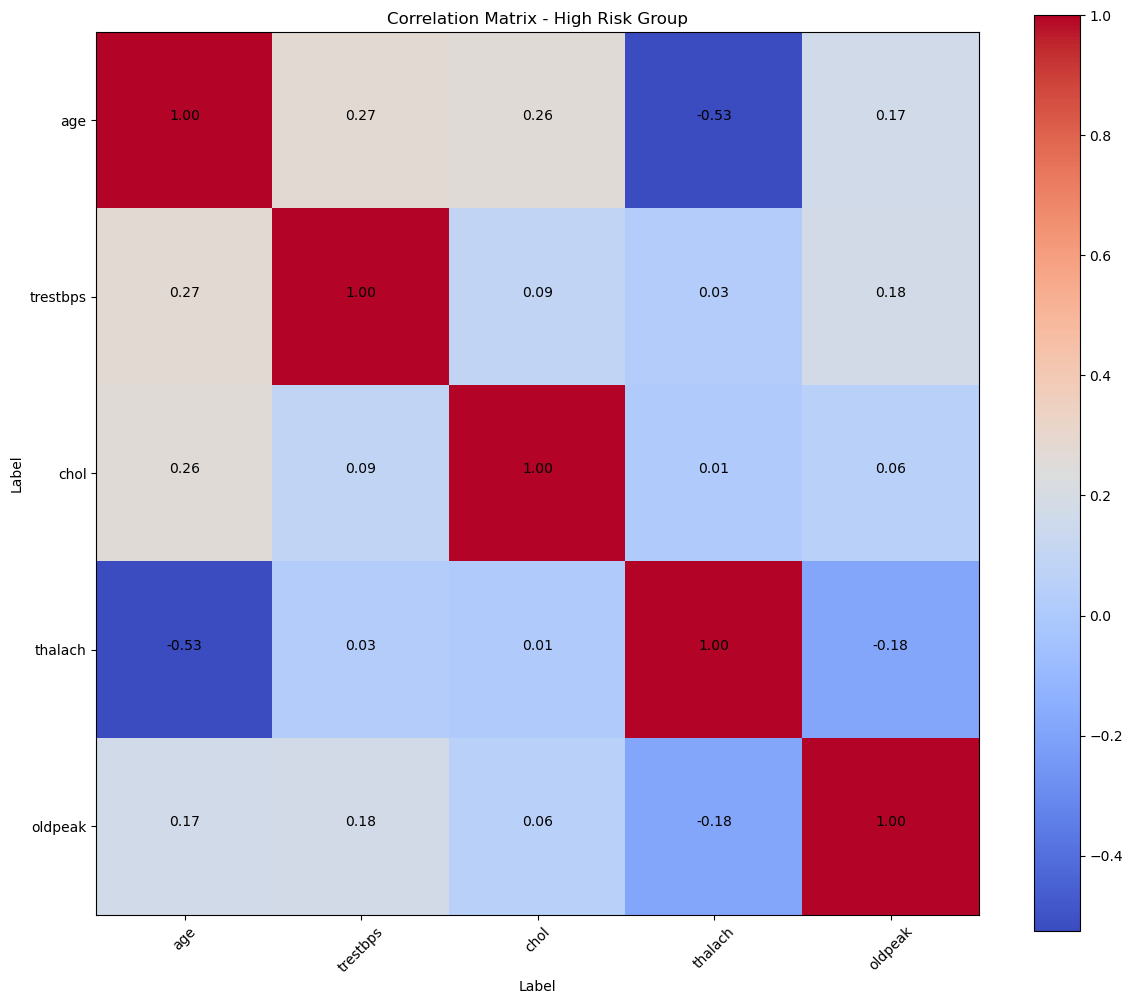

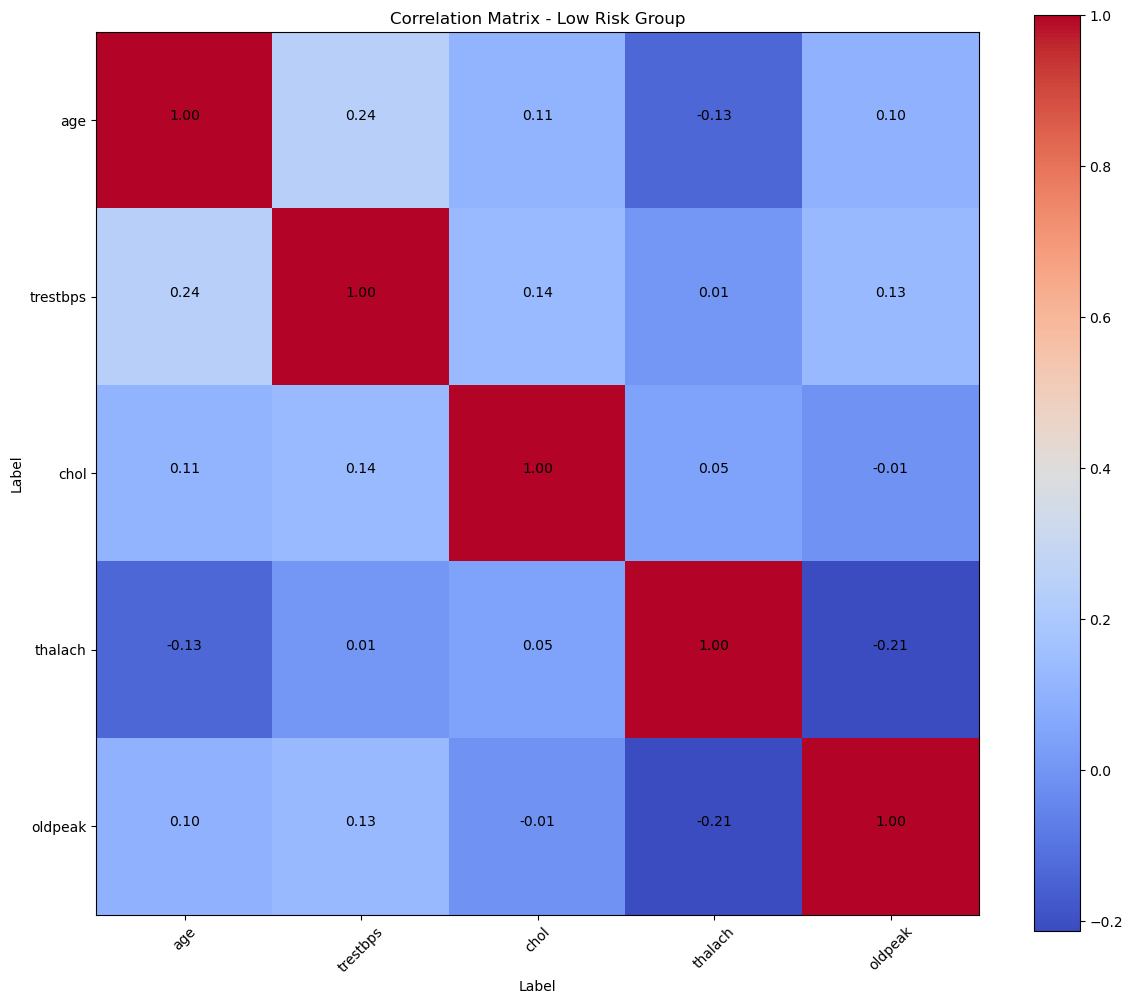

In [93]:

numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create correlation matrices for both high-risk and low-risk groups
high_risk_corr = data[data['target'] == 1][numerical_vars].corr()
low_risk_corr = data[data['target'] == 0][numerical_vars].corr()

# Plot heatmaps
show_heatmap(high_risk_corr, title='Correlation Matrix - High Risk Group',cmap='coolwarm')
show_heatmap(low_risk_corr, title='Correlation Matrix - Low Risk Group',cmap='coolwarm')



#### Multivariate Analysis:

In [94]:
# Prepare the data
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal','ca', 'target']
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

X = data[numerical_vars + categorical_vars]
y = data['target']

In [95]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Print coefficients
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef}")

age: -0.0008007813761044629
trestbps: -0.11882021047143487
chol: -0.10988526057039165
thalach: 0.13746191760896423
oldpeak: -0.20673495691542917
target: 3.5348875259045607
sex_0: 0.20372274408048696
sex_1: -0.2037227440804869
cp_0: -0.23121884703430107
cp_1: 0.024489904148124637
cp_2: 0.1473376458017919
cp_3: 0.148924255233536
fbs_0: -0.04401355706220175
fbs_1: 0.04401355706220177
restecg_0: -0.0435905324377345
restecg_1: 0.054029382053230386
restecg_2: -0.041229883488664736
exang_0: 0.12621158959626685
exang_1: -0.12621158959626685
slope_0: -0.05345330314699652
slope_1: -0.1372289907341506
slope_2: 0.16252749527468752
thal_0: 0.03884548369111696
thal_1: 0.04512299414542021
thal_2: 0.14219926957131596
thal_3: -0.1730012264445137
ca_0: 0.30466688457134644
ca_1: -0.1839748541967125
ca_2: -0.2363912667158305
ca_3: -0.06860631744627639
ca_4: 0.15166864925462697


#### Comprehensive Subgroup Analysis:

In [99]:
def subgroup_analysis(data, target_var, subgroup_var):
    subgroups = data[subgroup_var].unique()
    for subgroup in subgroups:
        subgroup_data = data[data[subgroup_var] == subgroup]
        high_risk = subgroup_data[subgroup_data['target'] == 1][target_var]
        low_risk = subgroup_data[subgroup_data['target'] == 0][target_var]
        t_stat, p_value = stats.ttest_ind(high_risk, low_risk)
        print(f"{subgroup_var} = {subgroup}:")
        print(f"  Mean (High Risk): {np.mean(high_risk):.2f}")
        print(f"  Mean (Low Risk): {np.mean(low_risk):.2f}")
        print(f"  P-value: {p_value:.4f}")

subgroup_analysis(data, 'age', 'sex')
subgroup_analysis(data, 'chol', 'sex')

sex = 1:
  Mean (High Risk): 50.90
  Mean (Low Risk): 56.09
  P-value: 0.0000
sex = 0:
  Mean (High Risk): 54.56
  Mean (Low Risk): 59.04
  P-value: 0.0425
sex = 1:
  Mean (High Risk): 230.99
  Mean (Low Risk): 246.06
  P-value: 0.0113
sex = 0:
  Mean (High Risk): 256.75
  Mean (Low Risk): 274.96
  P-value: 0.2373


In [100]:
def subgroup_analysis(data, target_var, subgroup_var):
    subgroups = data[subgroup_var].unique()
    for subgroup in subgroups:
        subgroup_data = data[data[subgroup_var] == subgroup]
        high_risk = subgroup_data[subgroup_data['target'] == 1][target_var]
        low_risk = subgroup_data[subgroup_data['target'] == 0][target_var]
        t_stat, p_value = stats.ttest_ind(high_risk, low_risk)
        print(f"{subgroup_var} = {subgroup}:")
        print(f"  Mean (High Risk): {np.mean(high_risk):.2f}")
        print(f"  Mean (Low Risk): {np.mean(low_risk):.2f}")
        print(f"  P-value: {p_value:.4f}")

subgroup_analysis(data, 'age', 'sex')
subgroup_analysis(data, 'chol', 'sex')

sex = 1:
  Mean (High Risk): 50.90
  Mean (Low Risk): 56.09
  P-value: 0.0000
sex = 0:
  Mean (High Risk): 54.56
  Mean (Low Risk): 59.04
  P-value: 0.0425
sex = 1:
  Mean (High Risk): 230.99
  Mean (Low Risk): 246.06
  P-value: 0.0113
sex = 0:
  Mean (High Risk): 256.75
  Mean (Low Risk): 274.96
  P-value: 0.2373


#### Effect Size Calculation

In [101]:
def calculate_cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_se = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (np.mean(group1) - np.mean(group2)) / pooled_se

for var in numerical_vars:
    high_risk = data[data['target'] == 1][var]
    low_risk = data[data['target'] == 0][var]
    t_stat, p_value = stats.ttest_ind(high_risk, low_risk)
    effect_size = calculate_cohens_d(high_risk, low_risk)
    print(f"{var}:")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Effect size (Cohen's d): {effect_size:.4f}")

age:
  P-value: 0.0001
  Effect size (Cohen's d): -0.4631
trestbps:
  P-value: 0.0115
  Effect size (Cohen's d): -0.2932
chol:
  P-value: 0.1388
  Effect size (Cohen's d): -0.1712
thalach:
  P-value: 0.0000
  Effect size (Cohen's d): 0.9309
oldpeak:
  P-value: 0.0000
  Effect size (Cohen's d): -0.9551


#### Translating Findings to Clinical Implications:

In [120]:
def calculate_risk_probability(intercept,var_coef,sex_coef, variable, sex):  
    logit = intercept + var_coef * variable + sex_coef * sex
    probability = 1 / (1 + np.exp(-logit))
    return probability

In [136]:
def calculte_params_by_sex(varTarget , varTargetAbove , measureTitle):    
    X = data[[varTarget, 'sex']]
    y = data['target']
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit()
        # print(model.summary())
    intercept = model.params['const']
    variable_coef = model.params[varTarget]
    sex_coef = model.params['sex']
    print(f"Risk for a above {varTargetAbove}-{measureTitle} {varTarget} params for woman: {calculate_risk_probability(intercept,variable_coef,sex_coef, varTargetAbove, 0):.2%}")
    print(f"Risk for a above {varTargetAbove}-{measureTitle} {varTarget} params for man: {calculate_risk_probability(intercept,variable_coef,sex_coef, varTargetAbove, 1):.2%}")


In [137]:

calculte_params_by_sex('age', 50, 'years-old')

Optimization terminated successfully.
         Current function value: 0.611509
         Iterations 5
Risk for a above 50-years-old age params for woman: 82.78%
Risk for a above 50-years-old age params for man: 50.81%


In [139]:
calculte_params_by_sex('age', 50, 'years-old')

Optimization terminated successfully.
         Current function value: 0.611509
         Iterations 5
Risk for a above 50-years-old age params for woman: 82.78%
Risk for a above 50-years-old age params for man: 50.81%


In [140]:
calculte_params_by_sex('trestbps', 120, 'mm Hg')

Optimization terminated successfully.
         Current function value: 0.633724
         Iterations 5
Risk for a above 120-mm Hg trestbps params for woman: 80.36%
Risk for a above 120-mm Hg trestbps params for man: 50.43%


In [141]:
calculte_params_by_sex('chol', 170, 'mg/dL')

Optimization terminated successfully.
         Current function value: 0.636573
         Iterations 5
Risk for a above 170-mg/dL chol params for woman: 84.84%
Risk for a above 170-mg/dL chol params for man: 55.90%


In [142]:
calculte_params_by_sex('thalach', 90, 'count')

Optimization terminated successfully.
         Current function value: 0.550643
         Iterations 6
Risk for a above 90-count thalach params for woman: 17.66%
Risk for a above 90-count thalach params for man: 4.74%


In [143]:
calculte_params_by_sex('oldpeak', 2, ' ')

Optimization terminated successfully.
         Current function value: 0.550967
         Iterations 6
Risk for a above 2-  oldpeak params for woman: 54.64%
Risk for a above 2-  oldpeak params for man: 24.00%
